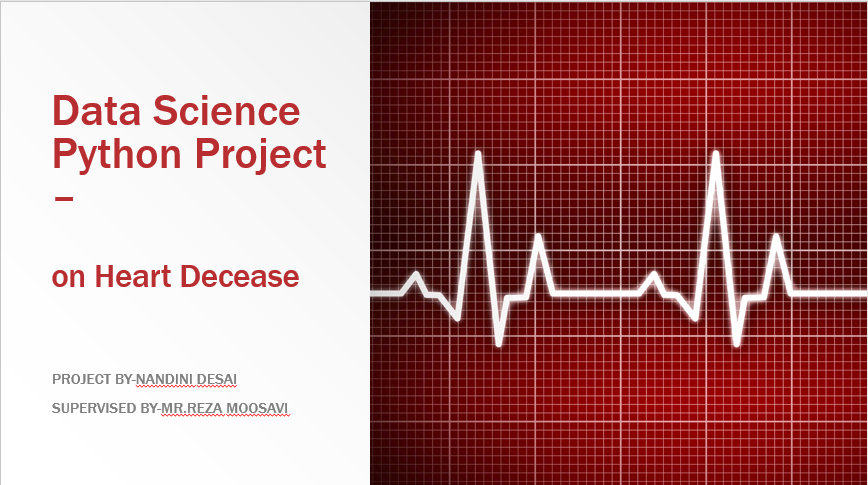

## Introduction
"Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack."

## Objective
The primary objective of this machine learning project would be to design and implement a predictive model that can assess the likelihood of an individual having heart disease or not.


In [1050]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay,recall_score,roc_auc_score,f1_score

In [1052]:
heart=pd.read_csv("heart.csv")
heart.sample(15)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
404   47   M           NAP        110         0.00          1     Normal   
712   58   M           ASY        100       234.00          0     Normal   
0     40   M           ATA        140       289.00          0     Normal   
279   54   F           ATA        130       253.00          0         ST   
674   62   M           ATA        120       281.00          0        LVH   
119   34   M            TA        140       156.00          0     Normal   
419   55   M           ASY        142       228.00          0         ST   
263   59   M           ASY        130       126.00          0     Normal   
156   38   M           ASY        110       190.00          0     Normal   
586   53   M           ASY        124       243.00          0     Normal   
676   51   F           ASY        130       305.00          0     Normal   
126   34   F           ATA        130       161.00          0     Normal   
603   74   M           ASY        155       310.00          0     Normal   
687   70   M           ATA        156       245.00          0        LVH   
593   64   M           ASY        130       258.00          1        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
404    120              Y     0.00     Flat             1  
712    156              N     0.10       Up             1  
0      172              N     0.00       Up             0  
279    155              N     0.00       Up             0  
674    103              N     1.40     Flat             1  
119    180              N     0.00     Flat             1  
419    149              Y     2.50       Up             1  
263    125              N     0.00     Flat             1  
156    150              Y     1.00     Flat             1  
586    122              Y     2.00     Flat             1  
676    142              Y     1.20     Flat             1  
126    190              N     0.00       Up             0  
603    112              Y     1.50     Down             1  
687    143              N     0.00       Up             0  
593    130              N     0.00     Flat             1

In [1054]:
heart.shape

(922, 12)

## Heart Dataset Contains 922 Obeservations and 12 features as follows
* Age-Age in Years
* Sex-Male or Female
* ChestPainType-
  ASY-Asymptomatic-
  NAP-Non-anginal pain
  ATA-Atypical angina
  TA-Typical angina
* RestingBP-Resting Blood Pressure
* Cholesterol-Serum cholestoral in mg/dl
* FastingBS-Fasting Blood Suger (1- Yes,0-No)
* RestingECG- Resting electrocardiographic results
  Normal-Normal
  ST-Having ST-T wave abnormality
  LVH-Showing probable or definite left ventricular hypertrophy by Estes' criteria
* MaxHR-Maximum heart rate achieved
* ExerciseAngina-Exercise induced angina (1- Yes,0-No)
* Oldpeak-ST depression induced by exercise relative to rest
* ST_Slope-The slope of the peak exercise ST segment
  flat-Flat
  up-Up sloping
  down-Down Sloping
* HeartDisease - Target Variable (1=Yes,0-No)         


In [1057]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             922 non-null    int64  
 1   Sex             922 non-null    object 
 2   ChestPainType   922 non-null    object 
 3   RestingBP       922 non-null    int64  
 4   Cholesterol     920 non-null    float64
 5   FastingBS       922 non-null    int64  
 6   RestingECG      922 non-null    object 
 7   MaxHR           922 non-null    int64  
 8   ExerciseAngina  920 non-null    object 
 9   Oldpeak         922 non-null    float64
 10  ST_Slope        920 non-null    object 
 11  HeartDisease    922 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.6+ KB


## 1) Removing Duplicates

In [1060]:
heart.duplicated().sum()

4

In [1062]:
heart.drop_duplicates(inplace=True)
heart.duplicated().sum()

0

## Univariate Analysis

In [1065]:
heart.describe(include='object')


Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            916      916
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            545      459

In [1067]:
heart_cat=heart.loc[:,heart.nunique()<20]
heart_cat.head()

Sex ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope  \
0   M           ATA          0     Normal              N       Up   
1   F           NAP          0     Normal              N     Flat   
2   M           ATA          0         ST              N       Up   
3   F           ASY          0     Normal              Y     Flat   
4   M           NAP          0     Normal              N       Up   

   HeartDisease  
0             0  
1             1  
2             0  
3             1  
4             0

In [1069]:
for i in heart_cat:
    print( heart_cat[i].value_counts())
    print("*"*100)

Sex
M    725
F    193
Name: count, dtype: int64
****************************************************************************************************
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
****************************************************************************************************
FastingBS
0    704
1    214
Name: count, dtype: int64
****************************************************************************************************
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
****************************************************************************************************
ExerciseAngina
N    545
Y    371
Name: count, dtype: int64
****************************************************************************************************
ST_Slope
Flat    459
Up      394
Down     63
Name: count, dtype: int64
****************************************************************************************************

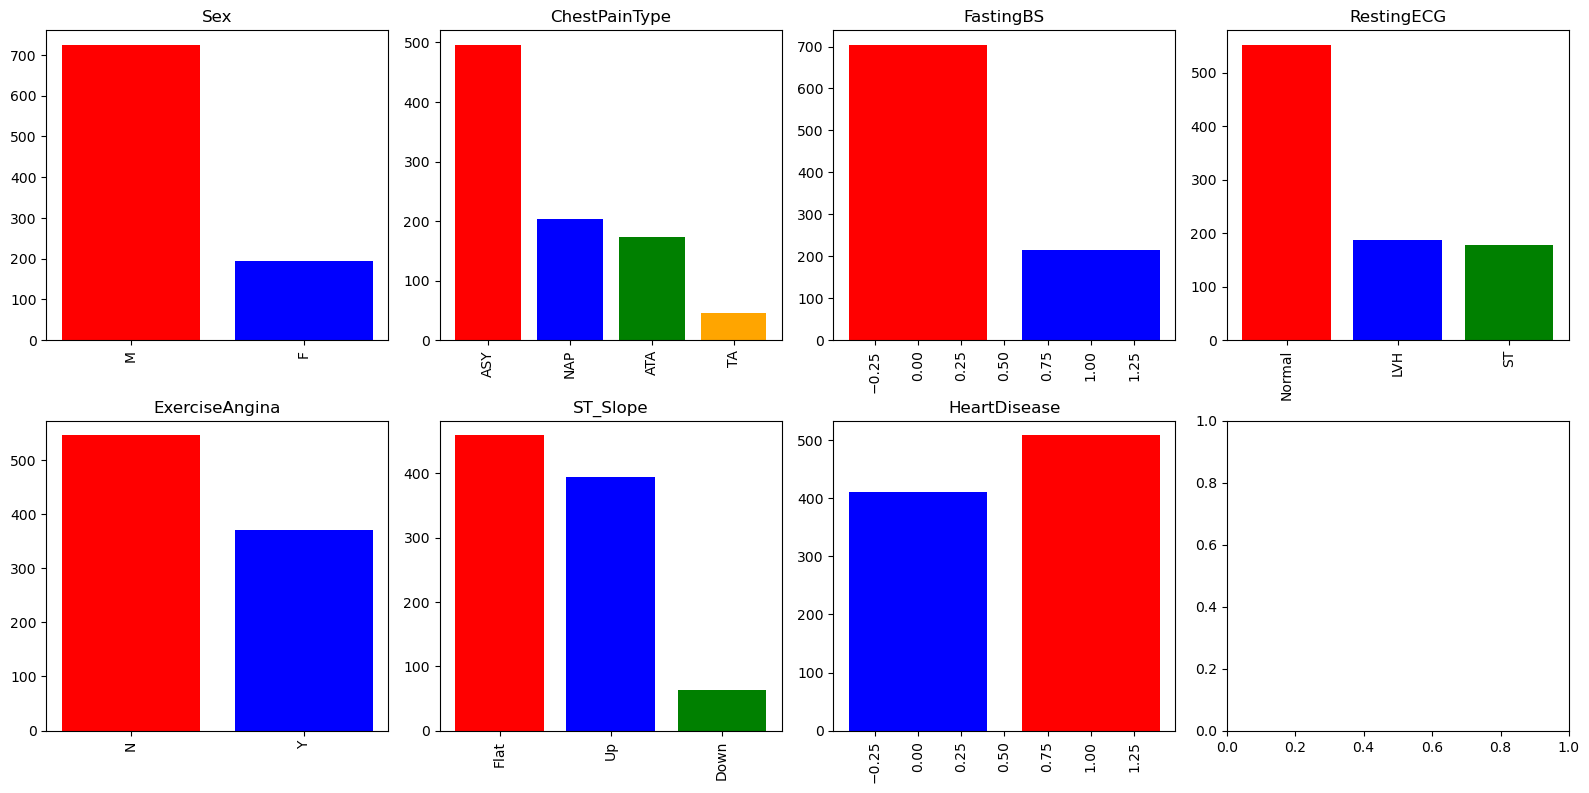

In [1071]:
colors = ['red', 'blue', 'green', 'orange']
fig,ax=plt.subplots(2,4,figsize=(16,8))
axes=ax.flatten()
for i,var in enumerate (heart_cat.columns):
    axes[i].bar(heart_cat[var].value_counts().index,heart_cat[var].value_counts().values,color=colors)
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
plt.tight_layout()
plt.show()

In [1073]:
heart_num=heart.loc[:,heart.nunique()>20]
heart_num.head()

Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0   40        140       289.00    172     0.00
1   49        160       180.00    156     1.00
2   37        130       283.00     98     0.00
3   48        138       214.00    108     1.50
4   54        150          NaN    122     0.00

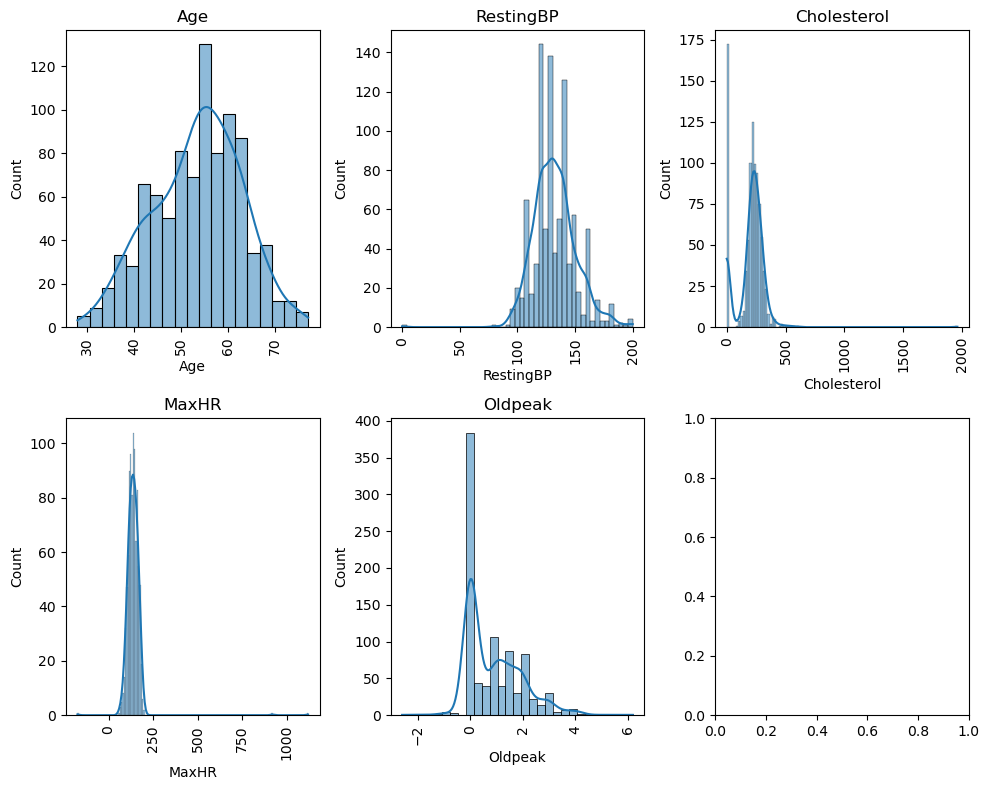

In [1075]:
fig,ax=plt.subplots(2,3,figsize=(10,8))
axes=ax.flatten()
for i,var in enumerate (heart_num.columns):
    sns.histplot(data=heart_num,x=var,ax=axes[i], kde=True)
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
plt.tight_layout()
plt.show()

In [1076]:
import scipy.stats as stat
for i in heart_num:
    normality=stat.normaltest(heart_num[i])
    print("Normality for :",i,"-",normality)
    if normality.pvalue>0.05:
        print(i,"is normally distributed")
    else:
        print(i,"is not normally distributed")
        print("*"*100)
              
    

Normality for : Age - NormaltestResult(statistic=14.387278957845862, pvalue=0.0007513496172395723)
Age is not normally distributed
****************************************************************************************************
Normality for : RestingBP - NormaltestResult(statistic=80.15332964094773, pvalue=3.934826751861588e-18)
RestingBP is not normally distributed
****************************************************************************************************
Normality for : Cholesterol - NormaltestResult(statistic=nan, pvalue=nan)
Cholesterol is not normally distributed
****************************************************************************************************
Normality for : MaxHR - NormaltestResult(statistic=1673.191703263703, pvalue=0.0)
MaxHR is not normally distributed
****************************************************************************************************
Normality for : Oldpeak - NormaltestResult(statistic=139.06085036801636, pvalue=6.35799260131

In [1079]:
heart_num1=heart_num.copy()
for i in heart_num1:
    heart_num1[i]=np.log(heart_num1[i])

heart_num1.head()

Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0 3.69       4.94         5.67   5.15     -inf
1 3.89       5.08         5.19   5.05     0.00
2 3.61       4.87         5.65   4.58     -inf
3 3.87       4.93         5.37   4.68     0.41
4 3.99       5.01          NaN   4.80     -inf

In [1081]:
for i in heart_num1:
    normality1=stat.normaltest(heart_num1[i])
    print("Normality for :",i,"-",normality1)
    if normality1.pvalue>0.05:
        print(i,"is normally distributed")
    else:
        print(i,"is not normally distributed")
        print("*"*100)

Normality for : Age - NormaltestResult(statistic=54.319197779625966, pvalue=1.6022713656869443e-12)
Age is not normally distributed
****************************************************************************************************
Normality for : RestingBP - NormaltestResult(statistic=nan, pvalue=nan)
RestingBP is not normally distributed
****************************************************************************************************
Normality for : Cholesterol - NormaltestResult(statistic=nan, pvalue=nan)
Cholesterol is not normally distributed
****************************************************************************************************
Normality for : MaxHR - NormaltestResult(statistic=nan, pvalue=nan)
MaxHR is not normally distributed
****************************************************************************************************
Normality for : Oldpeak - NormaltestResult(statistic=nan, pvalue=nan)
Oldpeak is not normally distributed
********************************

In [1083]:
from scipy import stats
for i in heart_num.columns:
    # Apply the Box-Cox transformation to each column
    data = heart_num[i]
    
    # Check if data contains any non-positive values, as Box-Cox requires positive values
    if (data <= 0).any():
        print(f"Cannot apply Box-Cox transformation to {i} due to non-positive values.")
    else:
        # Apply the Box-Cox transformation
        transformed_data, lambda_value = stats.boxcox(data)
        print(f"Transformed Data for {i}:", transformed_data)
        print(f"Optimal Lambda for {i}:", lambda_value)
    

Transformed Data for Age: [110.7571613  146.24048568  99.52901279 142.17168526 167.02895773
 106.97938826 130.15015247 167.02895773  99.52901279 142.17168526
  99.52901279 184.17184058 106.97938826 146.24048568 118.41508095
 167.02895773 103.23647773 122.2941753  192.90687025  95.85760226
 122.2941753  126.20602492 146.24048568 126.20602492 110.7571613
  95.85760226 162.8132277  158.62615908 162.8132277  154.4681026
 162.8132277  175.54505198 167.02895773 114.56923774 122.2941753
  81.54569058 215.20308564 114.56923774 142.17168526 142.17168526
 167.02895773 167.02895773  92.22288252 158.62615908 122.2941753
 188.5259732   99.52901279 150.3394202   95.85760226 114.56923774
 150.3394202  138.13341831 130.15015247 114.56923774 158.62615908
 154.4681026   78.0647267  184.17184058 167.02895773 158.62615908
 146.24048568 122.2941753  130.15015247 134.12609808 150.3394202
  99.52901279 130.15015247  81.54569058 158.62615908 126.20602492
 179.84476612 126.20602492 158.62615908 126.20602492 17

In [1085]:
stat.normaltest(transformed_data)

NormaltestResult(statistic=10.293821107210668, pvalue=0.005817349382118974)

Boxcox is also not able to transform numerical columns into normal distribution\
Normality Observations-\
No numerical feature is normally distributed\
However we can rely on CLT as observations are more than 30 and skip the normality assumption

## Checking Outliers

In [1089]:
pd.options.display.float_format="{:.2f}".format
heart.describe()       

Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       916.00     918.00  918.00   918.00        918.00
mean   53.51     132.40       200.73       0.23  138.43     0.89          0.55
std     9.43      18.51       124.00       0.42   49.70     1.07          0.50
min    28.00       0.00         0.00       0.00 -175.00    -2.60          0.00
25%    47.00     120.00       173.00       0.00  120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00  138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00  156.00     1.50          1.00
max    77.00     200.00      1960.00       1.00 1120.00     6.20          1.00

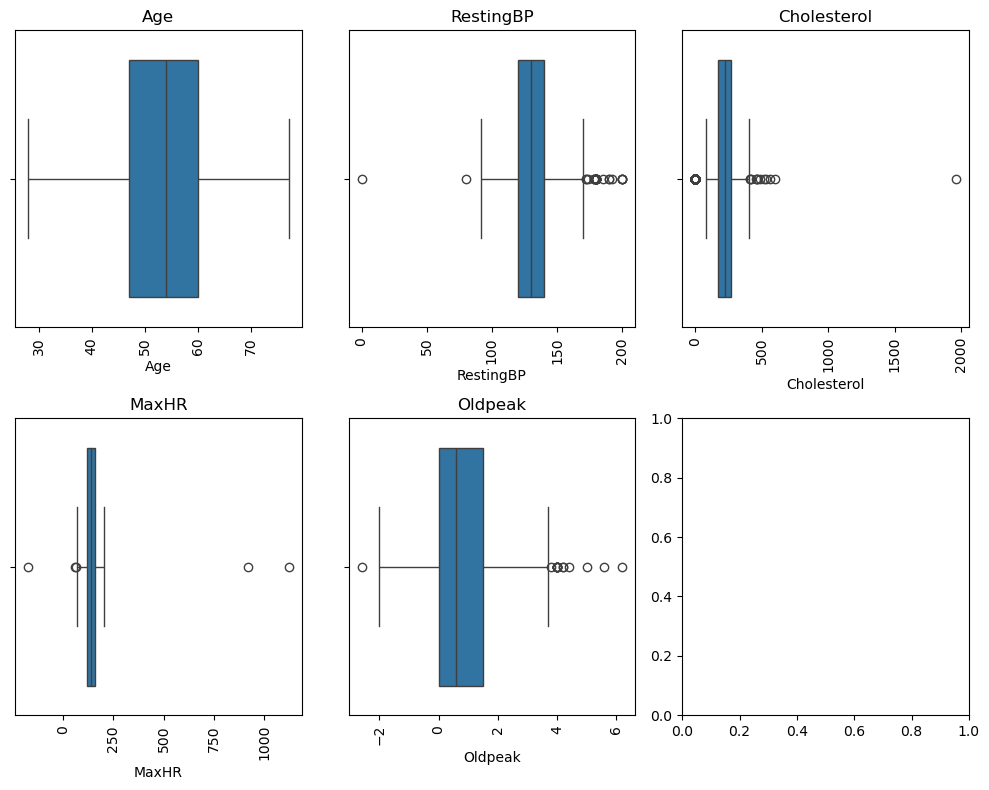

In [1091]:
fig,ax=plt.subplots(2,3,figsize=(10,8))
axes=ax.flatten()
for i,var in enumerate (heart_num.columns):
    sns.boxplot(data=heart_num,x=var,ax=axes[i])
    axes[i].set_title(var)
    axes[i].tick_params(axis='x', rotation=90, labelsize=10)
plt.tight_layout()
plt.show()

In [1093]:
def outlier_analysis(col):
    Q1=heart_num[col].quantile(0.25)
    Q3=heart_num[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF is upper inner fence
    LIF=Q1-1.5*(IQR)#LIF is lower inner fence
    heart_num_out =heart_num[(heart_num[col]<LIF) | (heart_num[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.histplot(heart_num_out[col], kde=True, bins=20)  # KDE plot or histogram
    
    # Add plot labels for clarity
    plt.title(f'Outlier Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
   
    return heart_num_out[col] .describe()

In [1095]:
heart[heart['RestingBP']==0]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0         0.00          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N     1.50     Flat             1

count    28.00
mean    173.18
std      40.02
min       0.00
25%     178.00
50%     180.00
75%     186.25
max     200.00
Name: RestingBP, dtype: float64

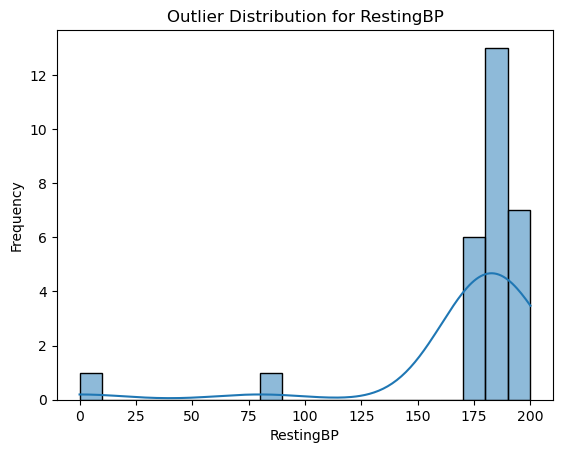

In [1097]:
outlier_analysis('RestingBP')

count    184.00
mean      39.65
std      183.77
min        0.00
25%        0.00
50%        0.00
75%        0.00
max     1960.00
Name: Cholesterol, dtype: float64

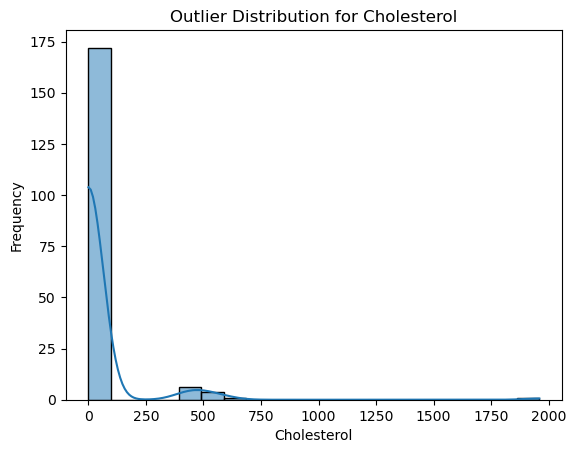

In [1099]:
outlier_analysis('Cholesterol')

count      5.00
mean     397.60
std      580.64
min     -175.00
25%       60.00
50%       63.00
75%      920.00
max     1120.00
Name: MaxHR, dtype: float64

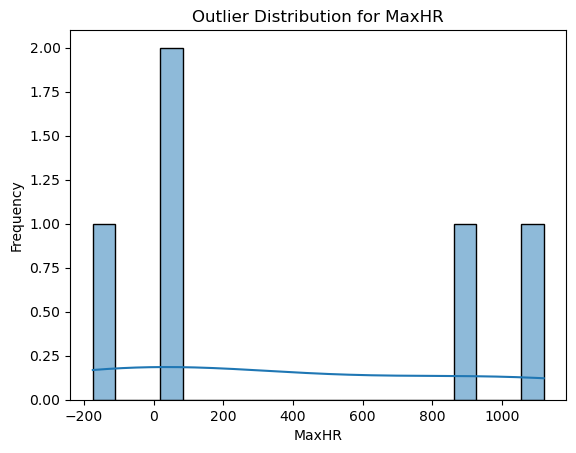

In [1101]:
outlier_analysis('MaxHR')

In [1103]:
heart['MaxHR'][heart['MaxHR']>220]

86     1120
111     920
Name: MaxHR, dtype: int64

### Heart1 includes all missing values and outliers ,to check with Random Forest and XGboost which are not sensitive to Outliers and Missing Values

In [1106]:
heart1=heart.copy()
heart1.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140       289.00          0     Normal    172   
1   49   F           NAP        160       180.00          0     Normal    156   
2   37   M           ATA        130       283.00          0         ST     98   
3   48   F           ASY        138       214.00          0     Normal    108   
4   54   M           NAP        150          NaN          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

In [1108]:
heart1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       2
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    2
Oldpeak           0
ST_Slope          2
HeartDisease      0
dtype: int64

In [1110]:
heart1.describe()

Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       916.00     918.00  918.00   918.00        918.00
mean   53.51     132.40       200.73       0.23  138.43     0.89          0.55
std     9.43      18.51       124.00       0.42   49.70     1.07          0.50
min    28.00       0.00         0.00       0.00 -175.00    -2.60          0.00
25%    47.00     120.00       173.00       0.00  120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00  138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00  156.00     1.50          1.00
max    77.00     200.00      1960.00       1.00 1120.00     6.20          1.00

### Handilling Outliers

In [1113]:
heart['Cholesterol']=heart['Cholesterol'].replace(1960, 196)
heart['MaxHR']=heart['MaxHR'].replace(-175, 175)
heart['MaxHR']=heart['MaxHR'].replace(1120, 112)
heart['MaxHR']=heart['MaxHR'].replace(920, 92)
heart['RestingBP']= heart['RestingBP'].replace(0, heart['RestingBP'].mean())

In [1115]:
heart[heart['RestingBP']==0]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [1117]:
heart.describe()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       916.00     918.00 918.00   918.00        918.00
mean   53.51     132.54       198.81       0.23 136.81     0.89          0.55
std     9.43      17.99       109.50       0.42  25.46     1.07          0.50
min    28.00      80.00         0.00       0.00  60.00    -2.60          0.00
25%    47.00     120.00       173.00       0.00 120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00 138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00 156.00     1.50          1.00
max    77.00     200.00       603.00       1.00 202.00     6.20          1.00

count   16.00
mean     3.92
std      1.86
min     -2.60
25%      4.00
50%      4.00
75%      4.25
max      6.20
Name: Oldpeak, dtype: float64

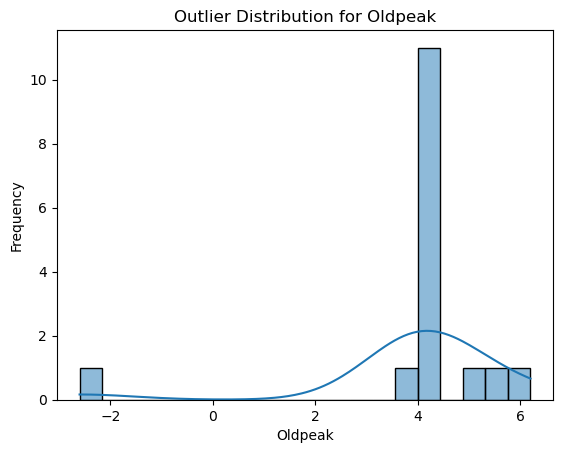

In [1119]:
outlier_analysis('Oldpeak')

In [1121]:
pd.options.display.float_format="{:.2f}".format
heart.describe()   

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       916.00     918.00 918.00   918.00        918.00
mean   53.51     132.54       198.81       0.23 136.81     0.89          0.55
std     9.43      17.99       109.50       0.42  25.46     1.07          0.50
min    28.00      80.00         0.00       0.00  60.00    -2.60          0.00
25%    47.00     120.00       173.00       0.00 120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00 138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00 156.00     1.50          1.00
max    77.00     200.00       603.00       1.00 202.00     6.20          1.00

In [1123]:
#heart.Cholesterol.fillna(heart.Cholesterol.mean(),inplace=True)
heart.Cholesterol.isna().sum()

2

In [1125]:
heart.ExerciseAngina.mode()

0    N
Name: ExerciseAngina, dtype: object

In [1127]:
heart.ExerciseAngina.value_counts()

ExerciseAngina
N    545
Y    371
Name: count, dtype: int64

In [1129]:
#heart.ExerciseAngina.fillna(heart.ExerciseAngina.mode()[0],inplace=True)
heart.ExerciseAngina.isna().sum()

2

In [1131]:
heart.ExerciseAngina.value_counts()

ExerciseAngina
N    545
Y    371
Name: count, dtype: int64

In [1133]:
heart.ST_Slope.value_counts()

ST_Slope
Flat    459
Up      394
Down     63
Name: count, dtype: int64

In [1135]:
#heart.ST_Slope.fillna(heart.ST_Slope.mode()[0],inplace=True)
heart.ST_Slope.isna().sum()

2

In [1137]:
heart.ST_Slope.value_counts()

ST_Slope
Flat    459
Up      394
Down     63
Name: count, dtype: int64

In [1139]:
heart.describe(include='object')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            916      916
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            545      459

In [1141]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       2
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    2
Oldpeak           0
ST_Slope          2
HeartDisease      0
dtype: int64

## Bivariate Analysis

In [1144]:
from scipy.stats import chi2_contingency
for i in heart_cat.columns:
    chi2,p_val,dof,expected=chi2_contingency(pd.crosstab(heart_cat[i],heart_cat['HeartDisease'],margins = False))
    if p_val < 0.05:
        print(f'Significant association between {i} and "HeartDisease" (pvalue={p_val:.4f})')
    else:
        print(f'No Significant association between {i} and "HeartDisease" (pvalue={p_val:.4f})')

Significant association between Sex and "HeartDisease" (pvalue=0.0000)
Significant association between ChestPainType and "HeartDisease" (pvalue=0.0000)
Significant association between FastingBS and "HeartDisease" (pvalue=0.0000)
Significant association between RestingECG and "HeartDisease" (pvalue=0.0042)
Significant association between ExerciseAngina and "HeartDisease" (pvalue=0.0000)
Significant association between ST_Slope and "HeartDisease" (pvalue=0.0000)
Significant association between HeartDisease and "HeartDisease" (pvalue=0.0000)


In [1146]:
heart_cat.Sex.unique()

array(['M', 'F'], dtype=object)

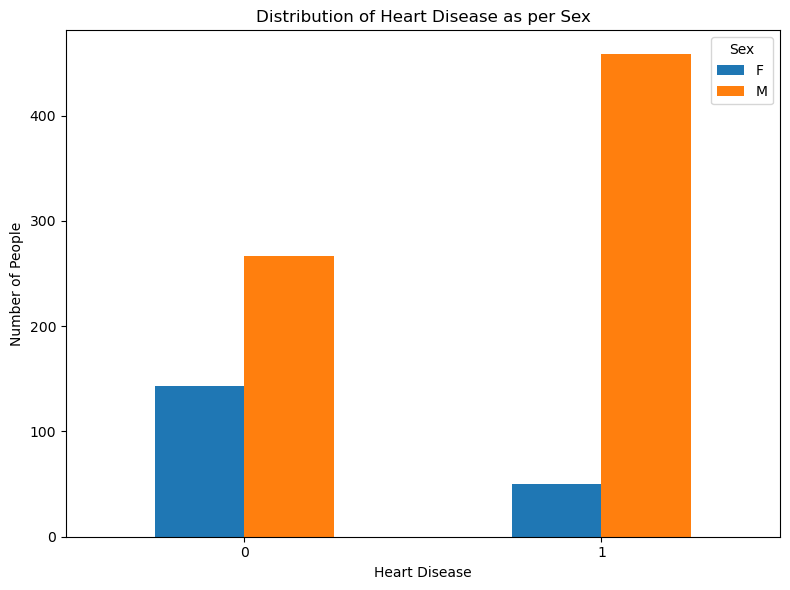

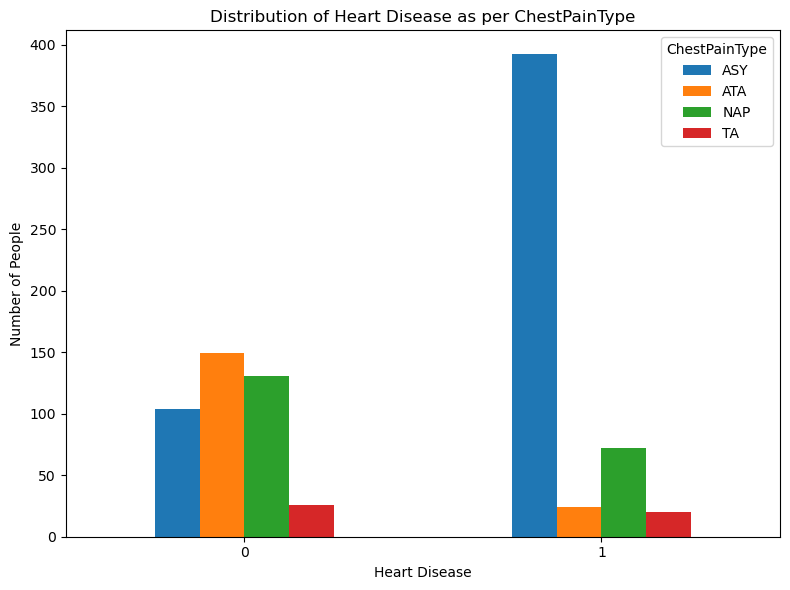

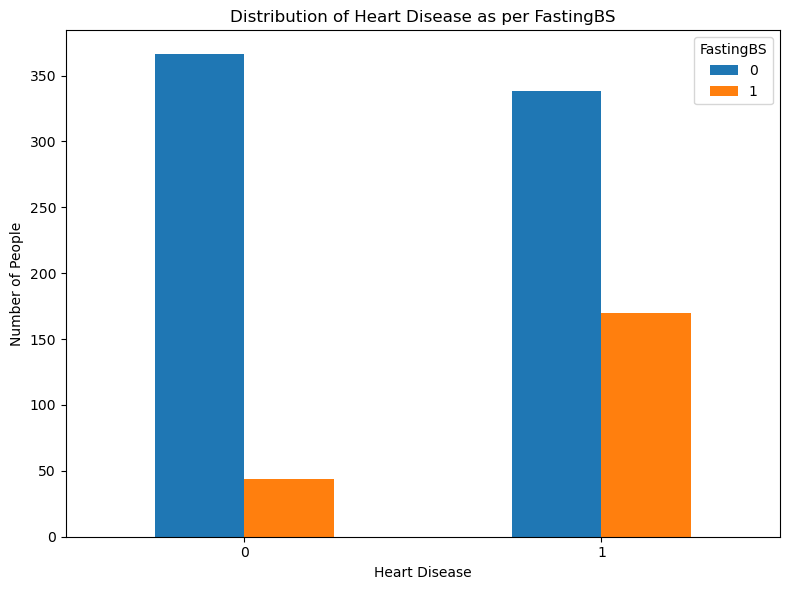

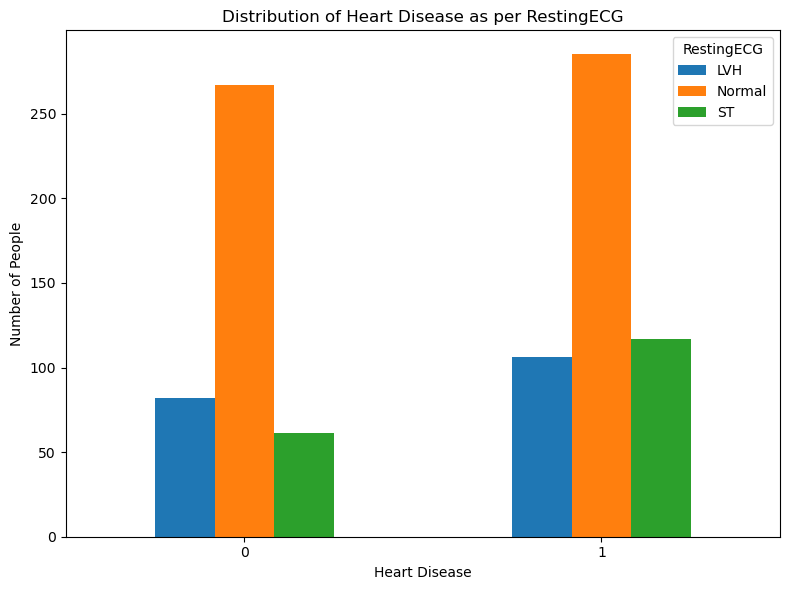

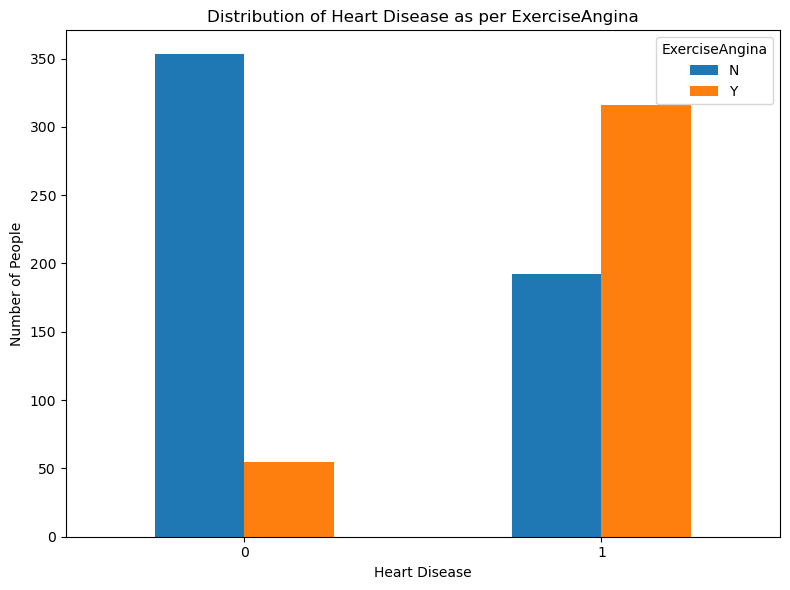

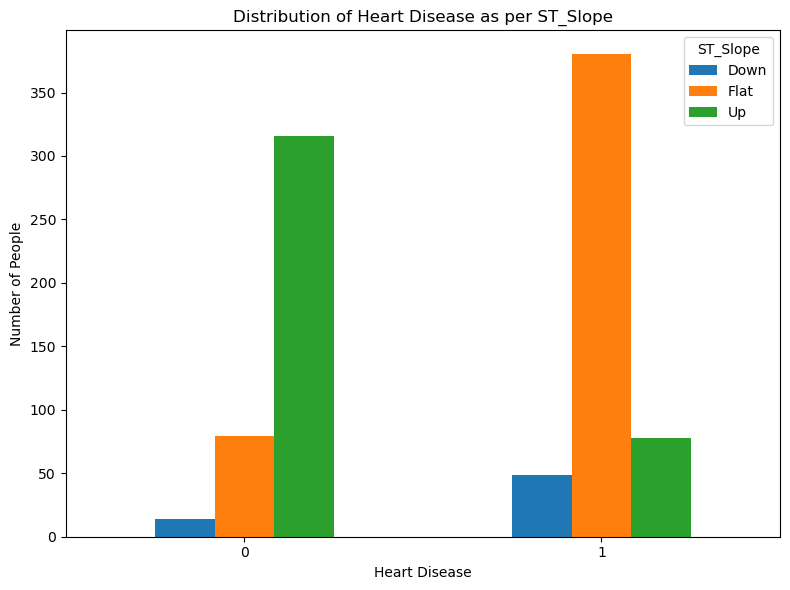

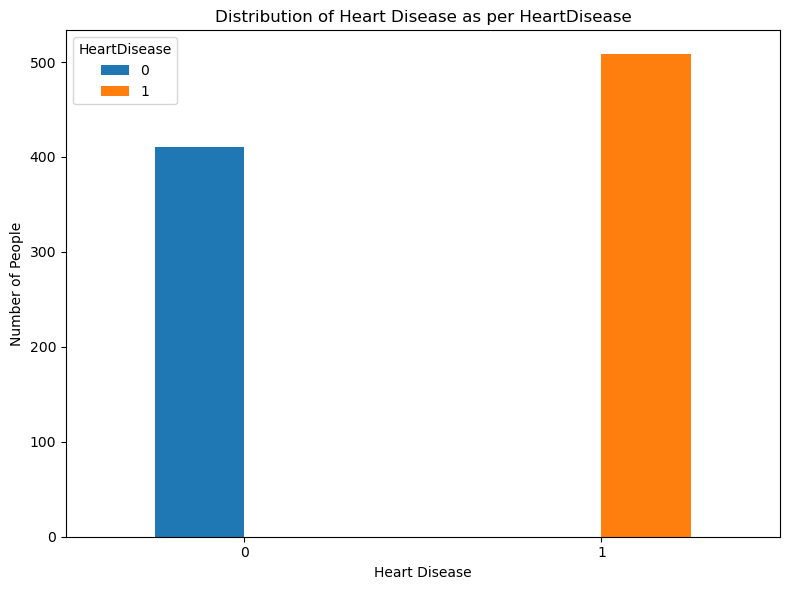

In [1148]:
for i in heart_cat.columns:
    counts = heart_cat.groupby(['HeartDisease', i]).size().unstack(fill_value=0)
    counts.plot(kind='bar', figsize=(8, 6))
    plt.title(f'Distribution of Heart Disease as per {i}')
    plt.xlabel('Heart Disease')
    plt.ylabel('Number of People')
    plt.xticks(rotation=0) 
    plt.legend(title=i, labels=counts.columns)
    plt.tight_layout()  # Adjust layout for better fitting
    plt.show()

In [1150]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return np.sqrt((stat/(obs*mini)))

rows= []
for var1 in heart_cat.columns:
    col = []
    for var2 in heart_cat.columns:
        cramers =cramers_V(heart_cat[var1], heart_cat[var2]) # Cramer's V correlation
        col.append(round(cramers,2))
    rows.append(col)
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = heart_cat.columns, index=heart_cat.columns)
df

Sex  ChestPainType  FastingBS  RestingECG  ExerciseAngina  \
Sex            1.00           0.20       0.12        0.07            0.19   
ChestPainType  0.20           1.00       0.16        0.10            0.44   
FastingBS      0.12           0.16       1.00        0.13            0.06   
RestingECG     0.07           0.10       0.13        1.00            0.11   
ExerciseAngina 0.19           0.44       0.06        0.11            1.00   
ST_Slope       0.15           0.29       0.18        0.06            0.45   
HeartDisease   0.30           0.54       0.26        0.11            0.49   

                ST_Slope  HeartDisease  
Sex                 0.15          0.30  
ChestPainType       0.29          0.54  
FastingBS           0.18          0.26  
RestingECG          0.06          0.11  
ExerciseAngina      0.45          0.49  
ST_Slope            1.00          0.62  
HeartDisease        0.62          1.00

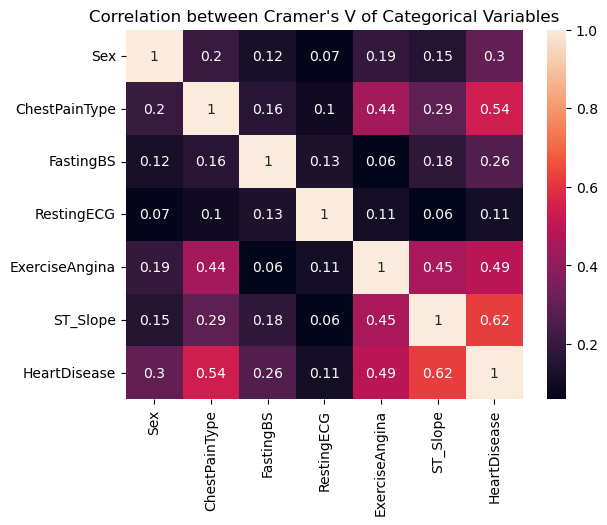

In [1152]:
sns.heatmap(df,annot=True)
plt.title("Correlation between Cramer's V of Categorical Variables")
plt.show()

## Handelling Missing Values

In [1155]:
heart.Cholesterol.fillna(heart.Cholesterol.mean(),inplace=True)
heart.ExerciseAngina.fillna(heart.ExerciseAngina.mode()[0],inplace=True)
heart.ST_Slope.fillna(heart.ST_Slope.mode()[0],inplace=True)

In [1157]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Encoding

In [1160]:
heart_encoded=pd.get_dummies(heart,drop_first=True)
heart_encoded.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40     140.00       289.00          0    172     0.00             0   
1   49     160.00       180.00          0    156     1.00             1   
2   37     130.00       283.00          0     98     0.00             0   
3   48     138.00       214.00          0    108     1.50             1   
4   54     150.00       198.81          0    122     0.00             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False   
1               True          False             False           True   
2              False           True             False          False   
3               True          False              True           True   
4               True          False             False          False   

   ST_Slope_Up  
0         True  
1        False  
2         True  
3        False  
4         True

In [1162]:
heart_encoded.shape

(918, 16)

In [1164]:
heart1_encoded=pd.get_dummies(heart1,drop_first=True)
heart1_encoded.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140       289.00          0    172     0.00             0   
1   49        160       180.00          0    156     1.00             1   
2   37        130       283.00          0     98     0.00             0   
3   48        138       214.00          0    108     1.50             1   
4   54        150          NaN          0    122     0.00             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False   
1               True          False             False           True   
2              False           True             False          False   
3               True          False              True           True   
4               True          False             False          False   

   ST_Slope_Up  
0         True  
1        False  
2         True  
3        False  
4         True

In [1166]:
heart1_encoded.shape

(918, 16)

## Checking Collinearity

In [1169]:
heart_encoded.corr()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
Age                1.00       0.26        -0.10       0.20  -0.38     0.26   
RestingBP          0.26       1.00         0.09       0.07  -0.11     0.17   
Cholesterol       -0.10       0.09         1.00      -0.26   0.24     0.05   
FastingBS          0.20       0.07        -0.26       1.00  -0.13     0.05   
MaxHR             -0.38      -0.11         0.24      -0.13   1.00    -0.16   
Oldpeak            0.26       0.17         0.05       0.05  -0.16     1.00   
HeartDisease       0.28       0.12        -0.23       0.27  -0.40     0.40   
Sex_M              0.06       0.01        -0.20       0.12  -0.19     0.11   
ChestPainType_ATA -0.22      -0.05         0.15      -0.14   0.25    -0.26   
ChestPainType_NAP -0.01      -0.03        -0.01      -0.04   0.13    -0.11   
ChestPainType_TA   0.03       0.05         0.02       0.03   0.10     0.03   
RestingECG_Normal -0.23      -0.11        -0.04      -0.09   0.02    -0.12   
RestingECG_ST      0.14       0.09        -0.13       0.13  -0.16     0.06   
ExerciseAngina_Y   0.22       0.15        -0.03       0.06  -0.37     0.41   
ST_Slope_Flat      0.18       0.11        -0.05       0.11  -0.34     0.28   
ST_Slope_Up       -0.26      -0.11         0.09      -0.16   0.38    -0.45   

                   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
Age                        0.28   0.06              -0.22              -0.01   
RestingBP                  0.12   0.01              -0.05              -0.03   
Cholesterol               -0.23  -0.20               0.15              -0.01   
FastingBS                  0.27   0.12              -0.14              -0.04   
MaxHR                     -0.40  -0.19               0.25               0.13   
Oldpeak                    0.40   0.11              -0.26              -0.11   
HeartDisease               1.00   0.31              -0.40              -0.21   
Sex_M                      0.31   1.00              -0.16              -0.07   
ChestPainType_ATA         -0.40  -0.16               1.00              -0.26   
ChestPainType_NAP         -0.21  -0.07              -0.26               1.00   
ChestPainType_TA          -0.05  -0.00              -0.11              -0.12   
RestingECG_Normal         -0.09  -0.01               0.11               0.01   
RestingECG_ST              0.10   0.06              -0.05              -0.04   
ExerciseAngina_Y           0.49   0.19              -0.30              -0.17   
ST_Slope_Flat              0.55   0.11              -0.31              -0.07   
ST_Slope_Up               -0.62  -0.15               0.36               0.09   

                   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  \
Age                            0.03              -0.23           0.14   
RestingBP                      0.05              -0.11           0.09   
Cholesterol                    0.02              -0.04          -0.13   
FastingBS                      0.03              -0.09           0.13   
MaxHR                          0.10               0.02          -0.16   
Oldpeak                        0.03              -0.12           0.06   
HeartDisease                  -0.05              -0.09           0.10   
Sex_M                         -0.00              -0.01           0.06   
ChestPainType_ATA             -0.11               0.11          -0.05   
ChestPainType_NAP             -0.12               0.01          -0.04   
ChestPainType_TA               1.00              -0.06          -0.01   
RestingECG_Normal             -0.06               1.00          -0.60   
RestingECG_ST                 -0.01              -0.60           1.00   
ExerciseAngina_Y              -0.13              -0.07           0.11   
ST_Slope_Flat                 -0.01              -0.05           0.04   
ST_Slope_Up                    0.00               0.08          -0.06   

                   ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  
Age                     

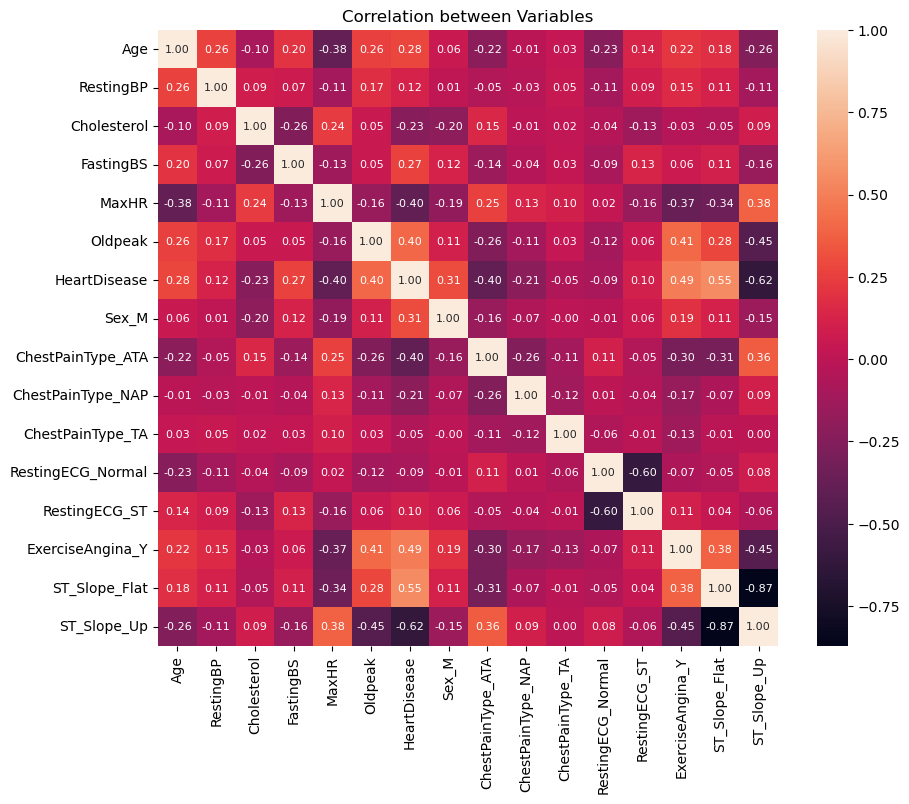

In [1171]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_encoded.corr(),annot=True,fmt=".2f",annot_kws={'size':8})
plt.title("Correlation between Variables")
plt.show()

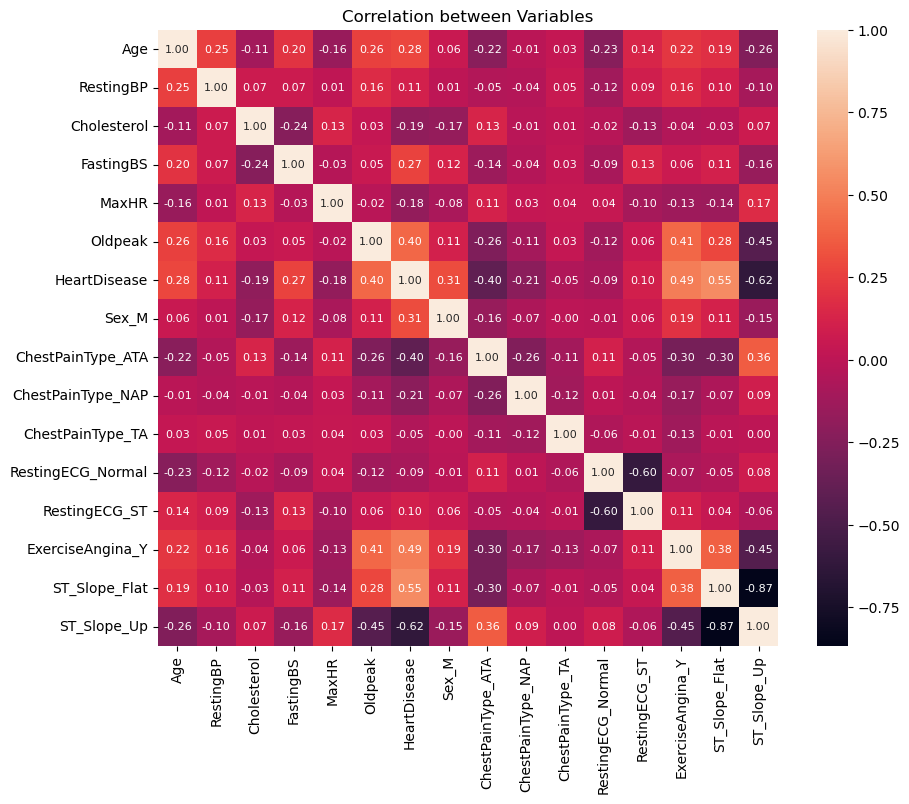

In [1173]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart1_encoded.corr(),annot=True,fmt=".2f",annot_kws={'size':8})
plt.title("Correlation between Variables")
plt.show()

### None of the variables are Highly Correlated

## CHecking MultiCollinearity

In [1177]:
heart_encoded.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [1179]:
heart_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(3), int64(4

In [1181]:
heart_num.head()

Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0   40        140       289.00    172     0.00
1   49        160       180.00    156     1.00
2   37        130       283.00     98     0.00
3   48        138       214.00    108     1.50
4   54        150          NaN    122     0.00

In [1183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = heart[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] # Drop the target variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)




       feature   VIF
0          Age 29.19
1    RestingBP 44.14
2  Cholesterol  4.66
3        MaxHR 20.11
4      Oldpeak  1.85


In [1185]:
heart_log=heart.drop(columns=['Age','RestingBP','MaxHR'],axis=1)
heart_log.head()

Sex ChestPainType  Cholesterol  FastingBS RestingECG ExerciseAngina  \
0   M           ATA       289.00          0     Normal              N   
1   F           NAP       180.00          0     Normal              N   
2   M           ATA       283.00          0         ST              N   
3   F           ASY       214.00          0     Normal              Y   
4   M           NAP       198.81          0     Normal              N   

   Oldpeak ST_Slope  HeartDisease  
0     0.00       Up             0  
1     1.00     Flat             1  
2     0.00       Up             0  
3     1.50     Flat             1  
4     0.00       Up             0

In [1187]:
heart_log_encoded=pd.get_dummies(heart_log,drop_first=True)
heart_log_encoded.head()

Cholesterol  FastingBS  Oldpeak  HeartDisease  Sex_M  ChestPainType_ATA  \
0       289.00          0     0.00             0   True               True   
1       180.00          0     1.00             1  False              False   
2       283.00          0     0.00             0   True               True   
3       214.00          0     1.50             1  False              False   
4       198.81          0     0.00             0   True              False   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  RestingECG_ST  \
0              False             False               True          False   
1               True             False               True          False   
2              False             False              False           True   
3              False             False               True          False   
4               True             False               True          False   

   ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  
0             False          False         True  
1             False           True        False  
2             False          False         True  
3              True           True        False  
4             False          False         True

In [1189]:
heart_log_encoded.isna().sum()

Cholesterol          0
FastingBS            0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

## Splitting

In [1192]:
heart_encoded.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40     140.00       289.00          0    172     0.00             0   
1   49     160.00       180.00          0    156     1.00             1   
2   37     130.00       283.00          0     98     0.00             0   
3   48     138.00       214.00          0    108     1.50             1   
4   54     150.00       198.81          0    122     0.00             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False   
1               True          False             False           True   
2              False           True             False          False   
3               True          False              True           True   
4               True          False             False          False   

   ST_Slope_Up  
0         True  
1        False  
2         True  
3        False  
4         True

In [1194]:
x=heart_encoded.drop('HeartDisease',axis=1)


In [1196]:
y=heart_encoded['HeartDisease']

In [1198]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [1200]:
y.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Data Splitting  only for cleaned Data to be used for All Models

In [1203]:
x_train0,x_val,y_train0,y_val=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x_train0,y_train0,test_size=0.1,stratify=y_train0,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape,x_val.shape,y_val.shape

((743, 15), (83, 15), (743,), (83,), (92, 15), (92,))

## Data Splitting  only for Unlceaned Data to be used for Random Forest and XGBoost

In [1206]:
x1=heart1_encoded.drop('HeartDisease',axis=1)
y1=heart1_encoded['HeartDisease']
x1_train0,x1_val,y1_train0,y1_val=train_test_split(x1,y1,test_size=0.1,stratify=y1,random_state=1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_train0,y1_train0,test_size=0.1,stratify=y1_train0,random_state=1)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape,x1_val.shape,y1_val.shape

((743, 15), (83, 15), (743,), (83,), (92, 15), (92,))

## Data Splitting after dropping Multicollineaer Columns only for Logistics Regression

In [1209]:
x2=heart_log_encoded.drop('HeartDisease',axis=1)
y2=heart_log_encoded['HeartDisease']
x2_train0,x2_val,y2_train0,y2_val=train_test_split(x2,y2,test_size=0.1,stratify=y2,random_state=1)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_train0,y2_train0,test_size=0.1,stratify=y2_train0,random_state=1)
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape,x2_val.shape,y2_val.shape

((743, 12), (83, 12), (743,), (83,), (92, 12), (92,))

## Scaling

In [1212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.head()
x_test_scaled = sc.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [1214]:
x_train_scaled.shape,x_test_scaled.shape

((743, 15), (83, 15))

In [1216]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2_train_scaled = sc.fit_transform(x2_train)
x2_train_scaled = pd.DataFrame(x2_train_scaled, columns = x2_train.columns)
x2_train_scaled.head()
x2_test_scaled = sc.transform(x2_test)
x2_test_scaled = pd.DataFrame(x2_test_scaled, columns = x2_test.columns)

## Modelling

## 1) Random Forest Classifier without cleaned Data- as it is not sensitive to Outliers, Missing Values and scaling

Scores with Random Forest Uncleaned Data and Default Parameters

Train Score: 0.8640032650099764
Test Score: 0.8674698795180723
****************************************************************************************************
Train accuracy: 1.0
Test accuracy: 0.8674698795180723
****************************************************************************************************
Train f1_score: 1.0
Test f1_score: 0.8842105263157894
****************************************************************************************************
Train recall_score: 1.0
Test recall_score: 0.9130434782608695
****************************************************************************************************
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9568155111633373
****************************************************************************************************
Train Confusion Matrix with Random Forest Default Parameters
 [[332   0]
 [  0 411]]
Test Confusion Matrix with Random Forest Default

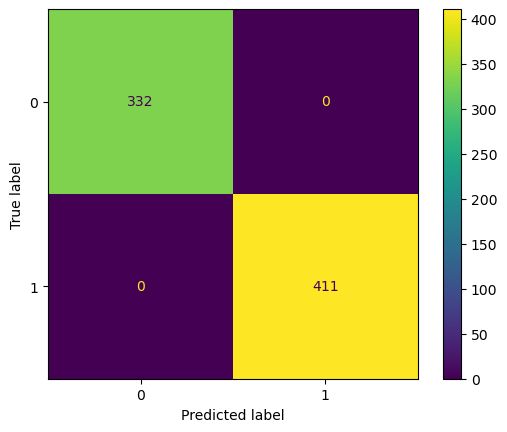

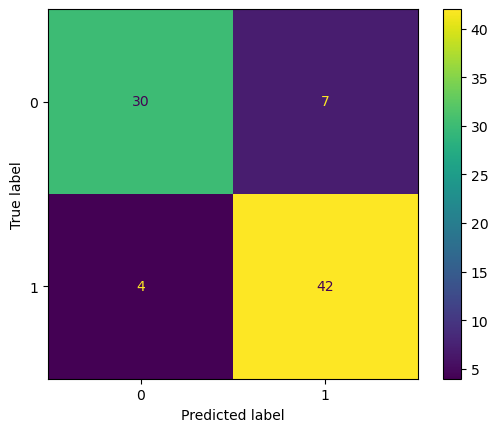

Train Classification Report with Random Forest Default Parameters
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       411

    accuracy                           1.00       743
   macro avg       1.00      1.00      1.00       743
weighted avg       1.00      1.00      1.00       743

Test Classification Report with Random Forest Default Parameters
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.86      0.91      0.88        46

    accuracy                           0.87        83
   macro avg       0.87      0.86      0.86        83
weighted avg       0.87      0.87      0.87        83



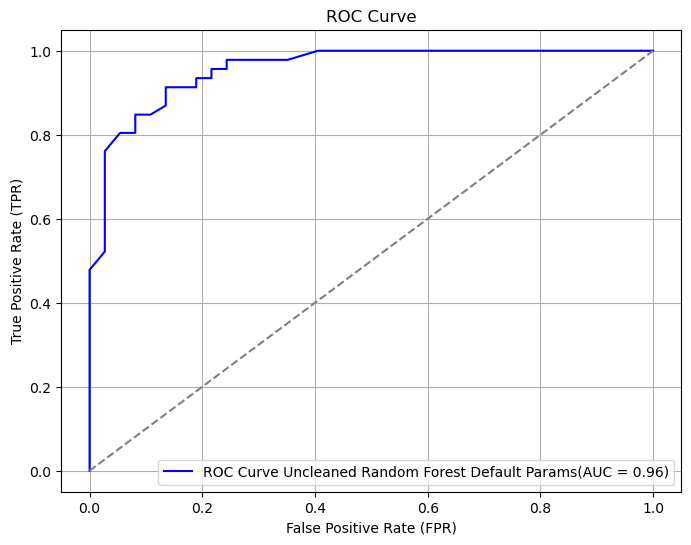

In [1220]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
rf0 = RandomForestClassifier(random_state=1, n_jobs=-1)
rf0.fit(x1_train,y1_train)
train_score=cross_val_score(rf0,x1_train,y1_train,cv=5).mean()
te_y_pred_rf0=rf0.predict(x1_test)
tr_y_pred_rf0=rf0.predict(x1_train)
test_score=rf0.score(x1_test,y1_test)
print("Scores with Random Forest Uncleaned Data and Default Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y1_train,tr_y_pred_rf0))
print("Test accuracy:",accuracy_score(y1_test,te_y_pred_rf0))
print("*"*100)  
print("Train f1_score:",f1_score(y1_train,tr_y_pred_rf0))
print("Test f1_score:",f1_score(y1_test,te_y_pred_rf0))
print("*"*100) 
print("Train recall_score:",recall_score(y1_train,tr_y_pred_rf0))
print("Test recall_score:",recall_score(y1_test,te_y_pred_rf0))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y1_train,rf0.predict_proba(x1_train)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y1_test,rf0.predict_proba(x1_test)[:,1]))
print("*"*100)
y_prob_rf0 = (rf0.predict_proba(x1_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y1_test, y_prob_rf0)
auc_score_rf0 = roc_auc_score(y1_test, y_prob_rf0)
print("Train Confusion Matrix with Random Forest Default Parameters\n",confusion_matrix(y1_train,tr_y_pred_rf0))
print("Test Confusion Matrix with Random Forest Default Parameters\n",confusion_matrix(y1_test,te_y_pred_rf0))
print("*"*100) 
cm_tr_rf0=ConfusionMatrixDisplay(confusion_matrix(y1_train,tr_y_pred_rf0))
cm_tr_rf0.plot()
plt.show()
cm_te_rf0=ConfusionMatrixDisplay(confusion_matrix(y1_test,te_y_pred_rf0))
cm_te_rf0.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_rf0)).flatten()
t2_rf0=FN / (FN + TP)
print("Train Classification Report with Random Forest Default Parameters\n",classification_report(y1_train,tr_y_pred_rf0))
print("Test Classification Report with Random Forest Default Parameters\n",classification_report(y1_test,te_y_pred_rf0))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve Uncleaned Random Forest Default Params(AUC = {auc_score_rf0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1222]:
result1=pd.DataFrame({'Train_CV':[cross_val_score(rf0,x1_train,y1_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y1_train,tr_y_pred_rf0)],
                     'Test_Accuracy':[accuracy_score(y1_test,te_y_pred_rf0)],
                     'Train f1_score':[f1_score(y1_train,tr_y_pred_rf0)],
                     'Test f1_score':[f1_score(y1_test,te_y_pred_rf0)],
                     'Train Recall_score':[recall_score(y1_train,tr_y_pred_rf0)],
                     'Test Recall_score':[recall_score(y1_test,te_y_pred_rf0)],
                     'Train roc_auc_score':[roc_auc_score(y1_train,rf0.predict_proba(x1_train)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y1_test,rf0.predict_proba(x1_test)[:,1])],
                      'Type2_error':[t2_rf0]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['RandomForst_Uncleaned_Default_Params']
result1.index = Row_Index
result1.T

RandomForst_Uncleaned_Default_Params
Train_CV                                             0.86
Train_Accuracy                                       1.00
Test_Accuracy                                        0.87
Train f1_score                                       1.00
Test f1_score                                        0.88
Train Recall_score                                   1.00
Test Recall_score                                    0.91
Train roc_auc_score                                  1.00
Test roc_auc_score                                   0.96
Type2_error                                          0.09

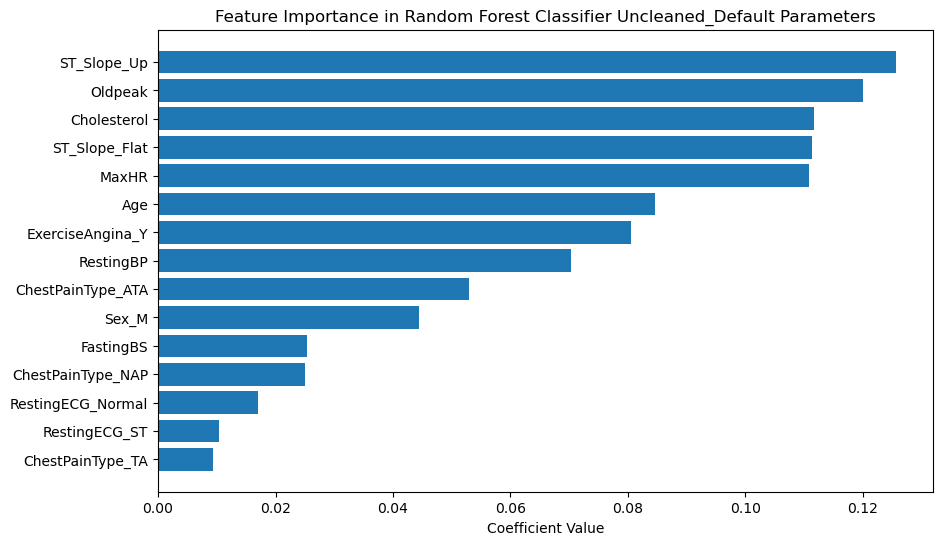

In [1223]:
features_imp1 = pd.DataFrame({'feature': x1_train.columns, 'importance': rf0.feature_importances_})
features_imp1=features_imp1.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp1['feature'], features_imp1['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Random Forest Classifier Uncleaned_Default Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1226]:
features_imp1

feature  importance
14        ST_Slope_Up        0.13
5             Oldpeak        0.12
2         Cholesterol        0.11
13      ST_Slope_Flat        0.11
4               MaxHR        0.11
0                 Age        0.08
12   ExerciseAngina_Y        0.08
1           RestingBP        0.07
7   ChestPainType_ATA        0.05
6               Sex_M        0.04
3           FastingBS        0.03
8   ChestPainType_NAP        0.03
10  RestingECG_Normal        0.02
11      RestingECG_ST        0.01
9    ChestPainType_TA        0.01

### ST_Slope_Up is most Important feature followed by OldPeak,Cholesterol,ST_slope_Flat,MaxHR

### 2) Random Forest Classifier with cleaned Data and Defalut Parameters

Scores with Random Forest Default Parameters

Train Score: 0.8720569562851443
Test Score: 0.8795180722891566
****************************************************************************************************
Train accuracy: 1.0
Test accuracy: 0.8795180722891566
****************************************************************************************************
Train f1_score: 1.0
Test f1_score: 0.8936170212765957
****************************************************************************************************
Train recall_score: 1.0
Test recall_score: 0.9130434782608695
****************************************************************************************************
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9532902467685076
****************************************************************************************************
Train Confusion Matrix with Random Forest Default Parameters
 [[332   0]
 [  0 411]]
Test Confusion Matrix with Random Forest Default Parameters
 [[31  

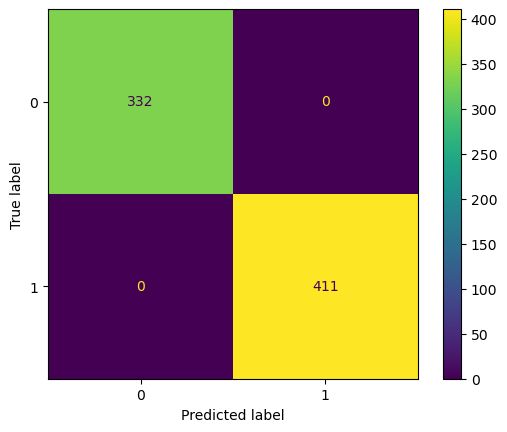

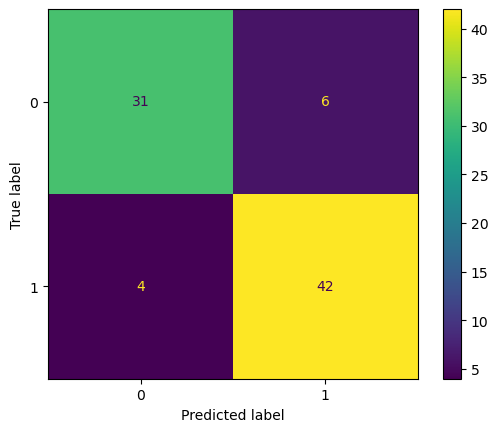

Train Classification Report with Random Forest Cleaned_Default Parameters
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       411

    accuracy                           1.00       743
   macro avg       1.00      1.00      1.00       743
weighted avg       1.00      1.00      1.00       743

Test Classification Report with Random Forest Cleaned_Default Parameters
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        37
           1       0.88      0.91      0.89        46

    accuracy                           0.88        83
   macro avg       0.88      0.88      0.88        83
weighted avg       0.88      0.88      0.88        83



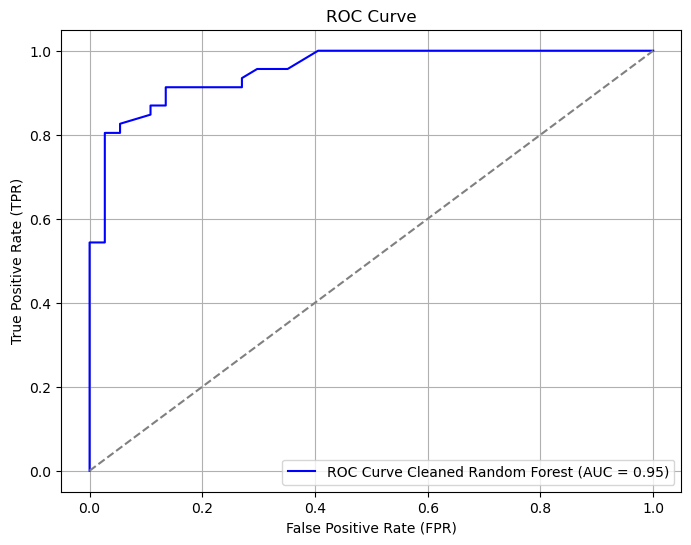

In [1230]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
rf.fit(x_train_scaled,y_train)
train_score=cross_val_score(rf,x_train_scaled,y_train,cv=5).mean()
te_y_pred_rf=rf.predict(x_test_scaled)
tr_y_pred_rf=rf.predict(x_train_scaled)
test_score=rf.score(x_test_scaled,y_test)
print("Scores with Random Forest Default Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y_train,tr_y_pred_rf))
print("Test accuracy:",accuracy_score(y_test,te_y_pred_rf))
print("*"*100)  
print("Train f1_score:",f1_score(y_train,tr_y_pred_rf))
print("Test f1_score:",f1_score(y_test,te_y_pred_rf))
print("*"*100) 
print("Train recall_score:",recall_score(y_train,tr_y_pred_rf))
print("Test recall_score:",recall_score(y_test,te_y_pred_rf))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y_train,rf.predict_proba(x_train_scaled)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y_test,rf.predict_proba(x_test_scaled)[:,1]))
print("*"*100)
y_prob_rf = (rf.predict_proba(x_test_scaled)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_prob_rf)
print("Train Confusion Matrix with Random Forest Default Parameters\n",confusion_matrix(y_train,tr_y_pred_rf))
print("Test Confusion Matrix with Random Forest Default Parameters\n",confusion_matrix(y_test,te_y_pred_rf))
print("*"*100) 
cm_tr_rf=ConfusionMatrixDisplay(confusion_matrix(y_train,tr_y_pred_rf))
cm_tr_rf.plot()
plt.show()
cm_te_rf=ConfusionMatrixDisplay(confusion_matrix(y_test,te_y_pred_rf))
cm_te_rf.plot()
plt.show()

TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_rf)).flatten()
t2_rf=FN / (FN + TP)

print("Train Classification Report with Random Forest Cleaned_Default Parameters\n",classification_report(y_train,tr_y_pred_rf))
print("Test Classification Report with Random Forest Cleaned_Default Parameters\n",classification_report(y_test,te_y_pred_rf))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve Cleaned Random Forest (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1232]:
result2=pd.DataFrame({'Train_CV':[cross_val_score(rf,x_train_scaled,y_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y_train,tr_y_pred_rf)],
                     'Test_Accuracy':[accuracy_score(y_test,te_y_pred_rf)],
                     'Train f1_score':[f1_score(y_train,tr_y_pred_rf)],
                     'Test f1_score':[f1_score(y_test,te_y_pred_rf)],
                     'Train Recall_score':[recall_score(y_train,tr_y_pred_rf)],
                     'Test Recall_score':[recall_score(y_test,te_y_pred_rf)],
                     'Train roc_auc_score':[roc_auc_score(y_train,rf.predict_proba(x_train_scaled)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y_test,rf.predict_proba(x_test_scaled)[:,1])],
                      'Type2_error':[t2_rf]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['RandomForst_Cleaned_Default_Params']
result2.index = Row_Index
result2.T

RandomForst_Cleaned_Default_Params
Train_CV                                           0.87
Train_Accuracy                                     1.00
Test_Accuracy                                      0.88
Train f1_score                                     1.00
Test f1_score                                      0.89
Train Recall_score                                 1.00
Test Recall_score                                  0.91
Train roc_auc_score                                1.00
Test roc_auc_score                                 0.95
Type2_error                                        0.09

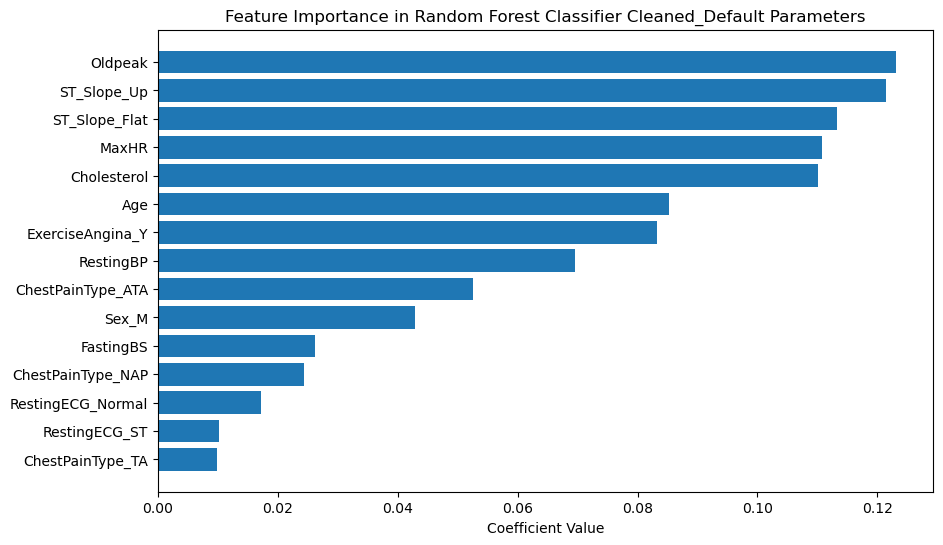

In [1234]:
features_imp2 = pd.DataFrame({'feature': x_train_scaled.columns, 'importance': rf.feature_importances_})
features_imp2=features_imp2.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp2['feature'], features_imp2['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Random Forest Classifier Cleaned_Default Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1236]:
features_imp2

feature  importance
5             Oldpeak        0.12
14        ST_Slope_Up        0.12
13      ST_Slope_Flat        0.11
4               MaxHR        0.11
2         Cholesterol        0.11
0                 Age        0.09
12   ExerciseAngina_Y        0.08
1           RestingBP        0.07
7   ChestPainType_ATA        0.05
6               Sex_M        0.04
3           FastingBS        0.03
8   ChestPainType_NAP        0.02
10  RestingECG_Normal        0.02
11      RestingECG_ST        0.01
9    ChestPainType_TA        0.01

### OldPeak and St_Slope_up are most important feature followed by MaxHR,Cholesterol and St_Slope_Flat

## 3) Random Forest Classifier with Uncleaned Data and Best Parameters Using Grid Search

### Checking for range of Max Depth for Hyperparameters

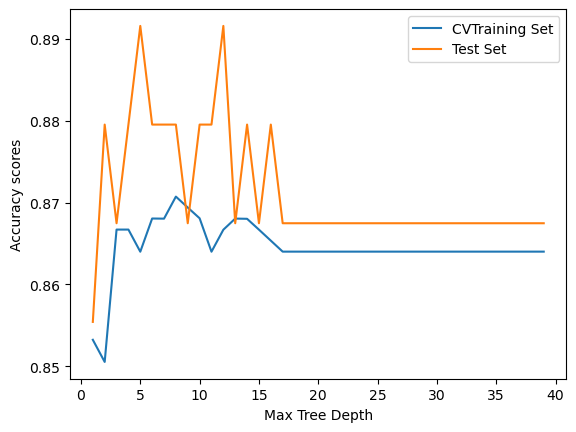

Best Test Score--> 0.891566265060241
Best Depth-Test--> 5
Best CV Train Score--> 0.8707237438781064
Best Depth-Train--> 8


In [1241]:
train_scores = []
test_scores = []
for depth in range(1,40,1):
    rf_hyper = RandomForestClassifier(max_depth = depth, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(rf_hyper,x1_train,y1_train,cv=5).mean())
    rf_hyper.fit(x1_train,y1_train)
    test_scores.append(rf_hyper.score(x1_test,y1_test))

plt.plot(range(1,40,1),train_scores, label = "CVTraining Set")
plt.plot(range(1,40,1),test_scores, label = "Test Set")
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Depth-Test-->", np.array(test_scores).argmax()+1)
print("Best CV Train Score-->", max(train_scores))
print("Best Depth-Train-->", np.array(train_scores).argmax()+1)

### CHecking for range of N Esitmators for Hyperparameters

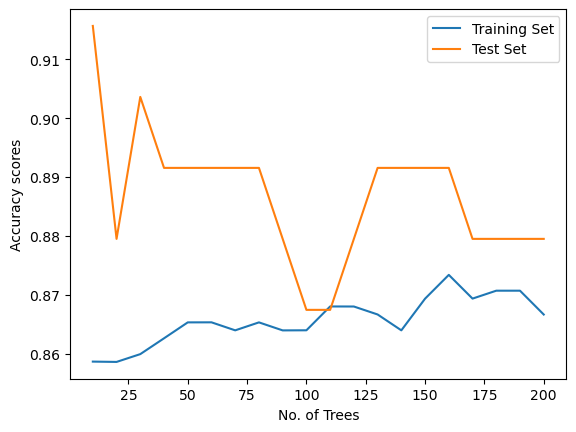

Best Test Score--> 0.9156626506024096
Best No. of Trees-Test--> 10
Best CV Train Score--> 0.8734083076364956
Best No. of Trees-Train--> 160


In [1243]:
train_scores = []
test_scores = []
for trees in range(10,201,10):
    rf_hyper = RandomForestClassifier(n_estimators = trees, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(rf_hyper,x1_train,y1_train,cv=5).mean())
    rf_hyper.fit(x1_train,y1_train)
    test_scores.append(rf_hyper.score(x1_test,y1_test))

plt.plot(range(10,201,10),train_scores, label = "Training Set")
plt.plot(range(10,201,10),test_scores, label = "Test Set")
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()
print("Best Test Score-->", max(test_scores))
print("Best No. of Trees-Test-->", (np.array(test_scores).argmax()*10+10))
print("Best CV Train Score-->", max(train_scores))
print("Best No. of Trees-Train-->", (np.array(train_scores).argmax()*10+10))

### CHecking for range of Max Features for Hyperparameters

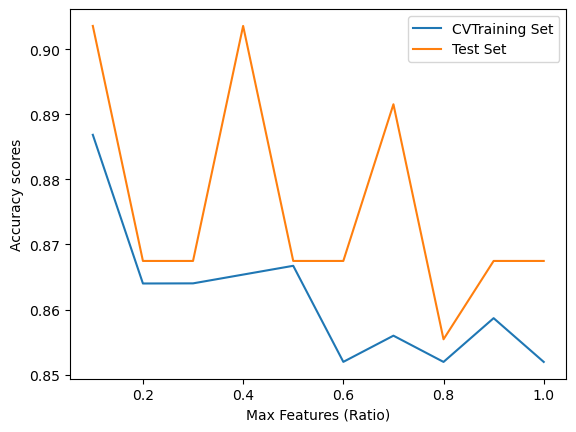

Best Test Score--> 0.9036144578313253
Best Max Features-Test--> 0.1
Best CV Train Score--> 0.8868674043170687
Best Max Feature-Train--> 0.1


In [1245]:
train_scores = []
test_scores = []
for features in np.linspace(0.1,1.0,10):
    rf_hyper = RandomForestClassifier(max_features = features, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(rf_hyper,x1_train,y1_train,cv=5).mean())
    rf_hyper.fit(x1_train,y1_train)
    test_scores.append(rf_hyper.score(x1_test, y1_test))

plt.plot(np.linspace(0.1,1.0,10),train_scores, label = "CVTraining Set")
plt.plot(np.linspace(0.1,1.0,10),test_scores, label = "Test Set")
plt.xlabel('Max Features (Ratio)')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Max Features-Test-->", (np.array(test_scores).argmax()*0.1+0.1))
print("Best CV Train Score-->", max(train_scores))
print("Best Max Feature-Train-->", (np.array(train_scores).argmax()*0.1+0.1))

In [1249]:
import time
start=time.time()
params_random = {'n_estimators': [30,70,90,150,200],
            'max_depth': [5,7,8,10,12],
            "max_features": [0.1, 0.2,0.5,0.7,0.9]
                     }
Grid_rf = GridSearchCV(RandomForestClassifier(random_state=1, n_jobs=-1), param_grid=params_random,cv=5,scoring='f1')
Grid_rf.fit(x1_train,y1_train)
print(Grid_rf.best_params_)
end=time.time()
print("Total Time Taken for Random Forest with Uncleaned Data and best Parameters:",(end-start))

{'max_depth': 12, 'max_features': 0.1, 'n_estimators': 150}
Total Time Taken for Random Forest with Uncleaned Data and best Parameters: 274.0465450286865


Scores with Random Forest Classifier Best Parameters

Train Score: 0.882840558679485
Test Score: 0.8674698795180723
****************************************************************************************************
Train accuracy: 0.9973082099596231
Test accuracy: 0.8674698795180723
****************************************************************************************************
Train f1_score: 0.9975669099756691
Test f1_score: 0.8865979381443299
****************************************************************************************************
Train recall_score: 0.9975669099756691
Test recall_score: 0.9347826086956522
****************************************************************************************************
Train roc_auc_score: 0.9999853428311787
Test roc_auc_score: 0.9594594594594595
****************************************************************************************************
Train Confusion Matrix with Random Forest Classifier Uncleaned_Best Parameters
 [[331

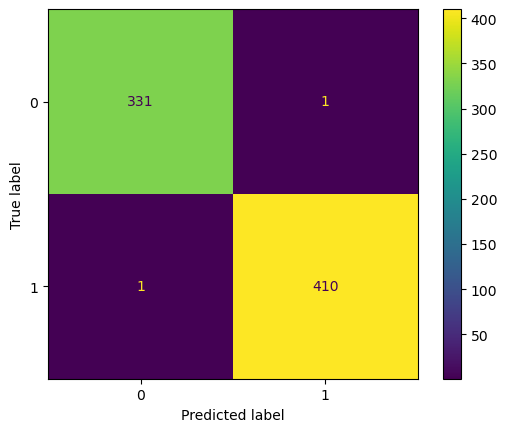

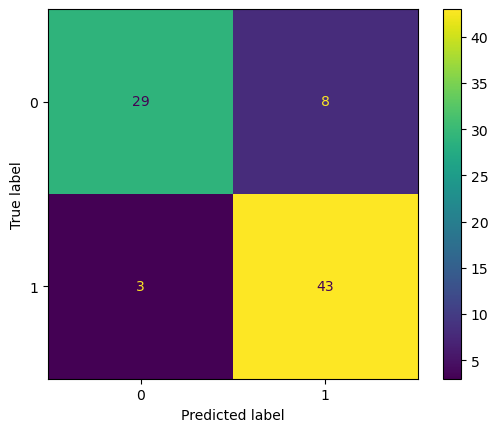

Train Classification Report with Random Forest Classifier Uncleaned_Best Parameters
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       411

    accuracy                           1.00       743
   macro avg       1.00      1.00      1.00       743
weighted avg       1.00      1.00      1.00       743

Test Classification Report with Random Forest Classifier Uncleaned_Best Parameters
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        37
           1       0.84      0.93      0.89        46

    accuracy                           0.87        83
   macro avg       0.87      0.86      0.86        83
weighted avg       0.87      0.87      0.87        83



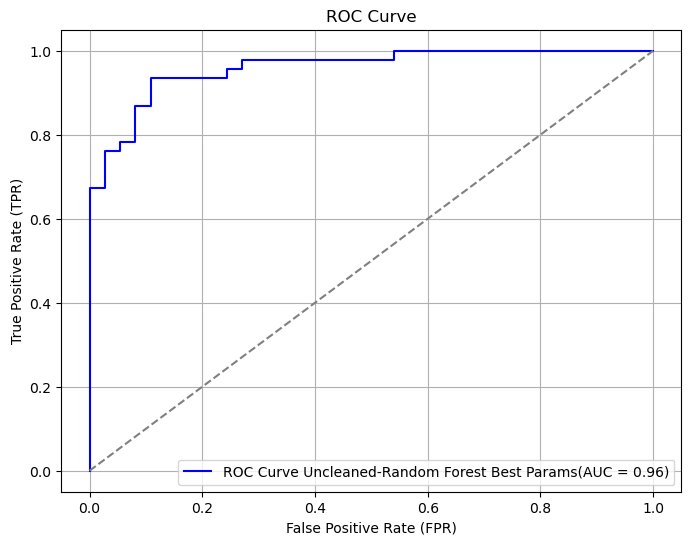

In [1251]:
rf1 = Grid_rf.best_estimator_
rf1.fit(x1_train,y1_train)
train_score=cross_val_score(rf1,x1_train,y1_train,cv=5).mean()
te_y_pred_rf1=rf1.predict(x1_test)
tr_y_pred_rf1=rf1.predict(x1_train)
test_score=rf1.score(x1_test,y1_test)
print("Scores with Random Forest Classifier Best Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y1_train,tr_y_pred_rf1))
print("Test accuracy:",accuracy_score(y1_test,te_y_pred_rf1))
print("*"*100)  
print("Train f1_score:",f1_score(y1_train,tr_y_pred_rf1))
print("Test f1_score:",f1_score(y1_test,te_y_pred_rf1))
print("*"*100) 
print("Train recall_score:",recall_score(y1_train,tr_y_pred_rf1))
print("Test recall_score:",recall_score(y1_test,te_y_pred_rf1))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y1_train,rf1.predict_proba(x1_train)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y1_test,rf1.predict_proba(x1_test)[:,1]))
print("*"*100)
y_prob_rf1 = (rf1.predict_proba(x1_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y1_test, y_prob_rf1,)
auc_score_rf1 = roc_auc_score(y1_test, y_prob_rf1)
print("Train Confusion Matrix with Random Forest Classifier Uncleaned_Best Parameters\n",confusion_matrix(y1_train,tr_y_pred_rf1))
print("Test Confusion Matrix with Random Forest Classifier Uncleaned_Best Parameters\n",confusion_matrix(y1_test,te_y_pred_rf1))
print("*"*100) 
cm_tr_rf1=ConfusionMatrixDisplay(confusion_matrix(y1_train,tr_y_pred_rf1))
cm_tr_rf1.plot()
plt.show()
cm_te_rf1=ConfusionMatrixDisplay(confusion_matrix(y1_test,te_y_pred_rf1))
cm_te_rf1.plot()
plt.show()

TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_rf1)).flatten()
t2_rf1=FN / (FN + TP)

print("Train Classification Report with Random Forest Classifier Uncleaned_Best Parameters\n",classification_report(y1_train,tr_y_pred_rf1))
print("Test Classification Report with Random Forest Classifier Uncleaned_Best Parameters\n",classification_report(y1_test,te_y_pred_rf1))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve Uncleaned-Random Forest Best Params(AUC = {auc_score_rf1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1253]:
result3=pd.DataFrame({'Train_CV':[cross_val_score(rf1,x1_train,y1_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y1_train,tr_y_pred_rf1)],
                     'Test_Accuracy':[accuracy_score(y1_test,te_y_pred_rf1)],
                     'Train f1_score':[f1_score(y1_train,tr_y_pred_rf1)],
                     'Test f1_score':[f1_score(y1_test,te_y_pred_rf1)],
                     'Train Recall_score':[recall_score(y1_train,tr_y_pred_rf1)],
                     'Test Recall_score':[recall_score(y1_test,te_y_pred_rf1)],
                     'Train roc_auc_score':[roc_auc_score(y1_train,rf1.predict_proba(x1_train)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y1_test,rf1.predict_proba(x1_test)[:,1])],
                      'Type2_error':[t2_rf1]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['RandomForst_Uncleaned_Best_Params']
result3.index = Row_Index
result3.T

RandomForst_Uncleaned_Best_Params
Train_CV                                          0.88
Train_Accuracy                                    1.00
Test_Accuracy                                     0.87
Train f1_score                                    1.00
Test f1_score                                     0.89
Train Recall_score                                1.00
Test Recall_score                                 0.93
Train roc_auc_score                               1.00
Test roc_auc_score                                0.96
Type2_error                                       0.07

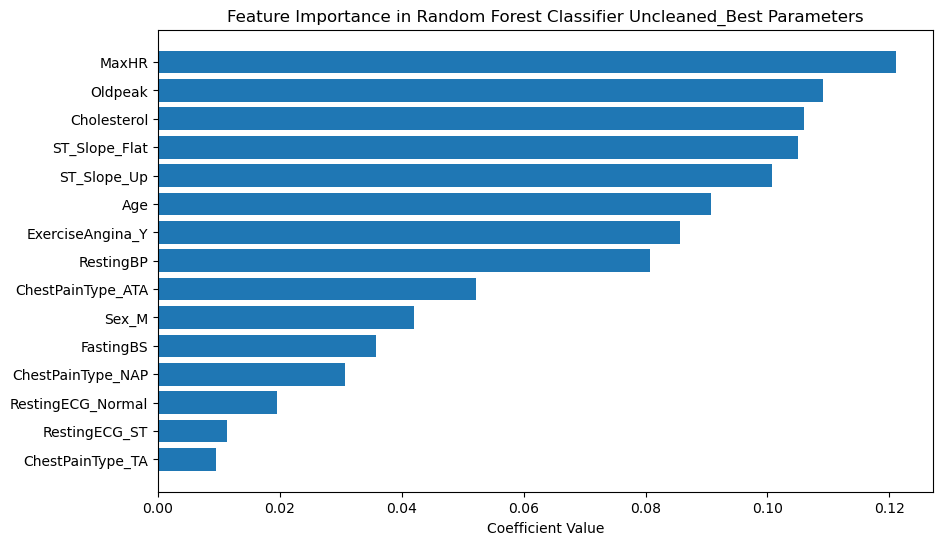

In [1255]:
features_imp3 = pd.DataFrame({'feature': x1_train.columns, 'importance': rf1.feature_importances_})
features_imp3=features_imp3.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp3['feature'], features_imp3['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Random Forest Classifier Uncleaned_Best Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1257]:
features_imp3

feature  importance
4               MaxHR        0.12
5             Oldpeak        0.11
2         Cholesterol        0.11
13      ST_Slope_Flat        0.11
14        ST_Slope_Up        0.10
0                 Age        0.09
12   ExerciseAngina_Y        0.09
1           RestingBP        0.08
7   ChestPainType_ATA        0.05
6               Sex_M        0.04
3           FastingBS        0.04
8   ChestPainType_NAP        0.03
10  RestingECG_Normal        0.02
11      RestingECG_ST        0.01
9    ChestPainType_TA        0.01

### MaxHR is most important feature followed by OldPeak,Cholesterol,ST_slope

## 4) Random Forest Classifier with cleaned Data and Best Parameters Using Grid Search

### Checking for range of Max Depth for Hyperparameters

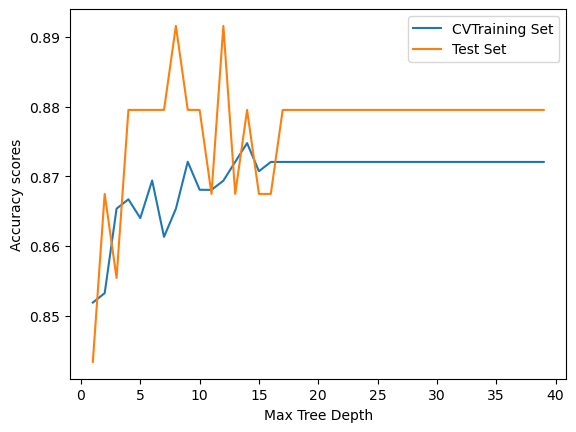

Best Test Score--> 0.891566265060241
Best Depth-Test--> 8
Best CV Train Score--> 0.8747596589878471
Best Depth-Train--> 14


In [1262]:
train_scores = []
test_scores = []
for depth in range(1,40,1):
    rf_hyper = RandomForestClassifier(max_depth = depth, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(rf_hyper,x_train_scaled,y_train,cv=5).mean())
    rf_hyper.fit(x_train_scaled,y_train)
    test_scores.append(rf_hyper.score(x_test_scaled,y_test))

plt.plot(range(1,40,1),train_scores, label = "CVTraining Set")
plt.plot(range(1,40,1),test_scores, label = "Test Set")
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Depth-Test-->", np.array(test_scores).argmax()+1)
print("Best CV Train Score-->", max(train_scores))
print("Best Depth-Train-->", np.array(train_scores).argmax()+1)

### CHecking for range of N Esitmators for Hyperparameters

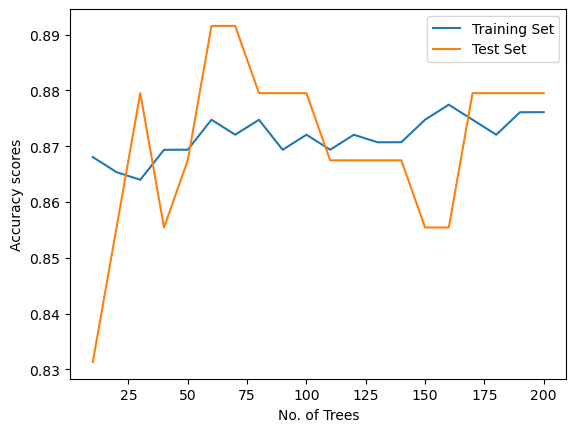

Best Test Score--> 0.891566265060241
Best No. of Trees-Test--> 60
Best CV Train Score--> 0.8774442227462362
Best No. of Trees-Train--> 160


In [1264]:
train_scores = []
test_scores = []
for trees in range(10,201,10):
    rf_hyper = RandomForestClassifier(n_estimators = trees, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(rf_hyper,x_train_scaled,y_train,cv=5).mean())
    rf_hyper.fit(x_train_scaled,y_train)
    test_scores.append(rf_hyper.score(x_test_scaled,y_test))

plt.plot(range(10,201,10),train_scores, label = "Training Set")
plt.plot(range(10,201,10),test_scores, label = "Test Set")
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()
print("Best Test Score-->", max(test_scores))
print("Best No. of Trees-Test-->", (np.array(test_scores).argmax()*10+10))
print("Best CV Train Score-->", max(train_scores))
print("Best No. of Trees-Train-->", (np.array(train_scores).argmax()*10+10))

### CHecking for range of Max Features for Hyperparameters

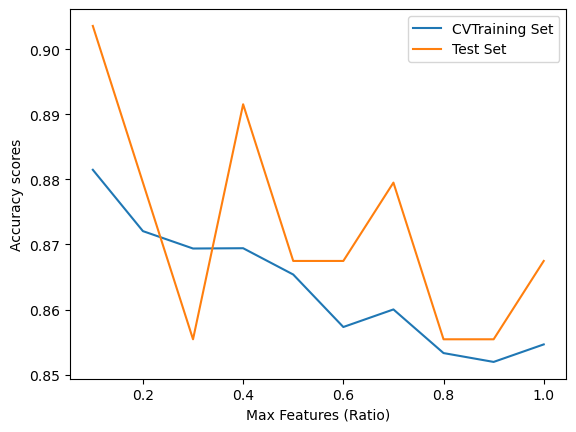

Best Test Score--> 0.9036144578313253
Best Max Features-Test--> 0.1
Best CV Train Score--> 0.8814892073281335
Best Max Feature-Train--> 0.1


In [1266]:
train_scores = []
test_scores = []
for features in np.linspace(0.1,1.0,10):
    rf_hyper = RandomForestClassifier(max_features = features, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(rf_hyper,x_train_scaled,y_train,cv=5).mean())
    rf_hyper.fit(x_train_scaled,y_train)
    test_scores.append(rf_hyper.score(x_test_scaled, y_test))

plt.plot(np.linspace(0.1,1.0,10),train_scores, label = "CVTraining Set")
plt.plot(np.linspace(0.1,1.0,10),test_scores, label = "Test Set")
plt.xlabel('Max Features (Ratio)')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Max Features-Test-->", (np.array(test_scores).argmax()*0.1+0.1))
print("Best CV Train Score-->", max(train_scores))
print("Best Max Feature-Train-->", (np.array(train_scores).argmax()*0.1+0.1))

In [1272]:
import time
start=time.time()
params_random = {'n_estimators': [30,60,120,160,190],
            'max_depth': [5,8,13,18,25],
            "max_features": [0.1, 0.2,0.5,0.7,0.9]
                     }
Grid_rf1 = GridSearchCV(RandomForestClassifier(random_state=1, n_jobs=-1), param_grid=params_random,cv=5,scoring='f1')
Grid_rf1.fit(x_train_scaled,y_train)
print(Grid_rf1.best_params_)
end=time.time()
print("Total Time Taken for Random Forest with cleaned Data and best Parameters:",(end-start))

{'max_depth': 13, 'max_features': 0.1, 'n_estimators': 190}
Total Time Taken for Random Forest with cleaned Data and best Parameters: 282.68191289901733


Scores with Random Forest Classifier Best Parameters

Train Score: 0.8841828405586796
Test Score: 0.9036144578313253
****************************************************************************************************
Train accuracy: 1.0
Test accuracy: 0.9036144578313253
****************************************************************************************************
Train f1_score: 1.0
Test f1_score: 0.9166666666666666
****************************************************************************************************
Train recall_score: 1.0
Test recall_score: 0.9565217391304348
****************************************************************************************************
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9547591069330199
****************************************************************************************************
Train Confusion Matrix with Random Forest Classifier Cleaned_Best Parameters
 [[332   0]
 [  0 411]]
Test Confusion Matrix with Random Forest Cl

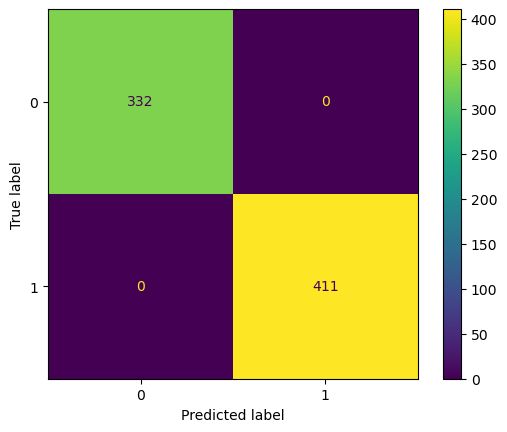

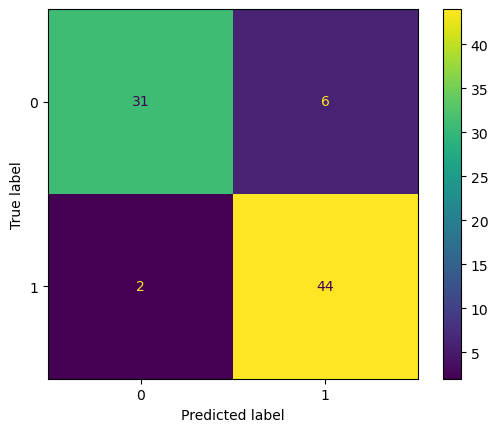

Train Classification Report with Random Forest Classifier Cleaned_Best Parameters
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       411

    accuracy                           1.00       743
   macro avg       1.00      1.00      1.00       743
weighted avg       1.00      1.00      1.00       743

Test Classification Report with Random Forest Classifier Cleaned_Best Parameters
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.88      0.96      0.92        46

    accuracy                           0.90        83
   macro avg       0.91      0.90      0.90        83
weighted avg       0.91      0.90      0.90        83



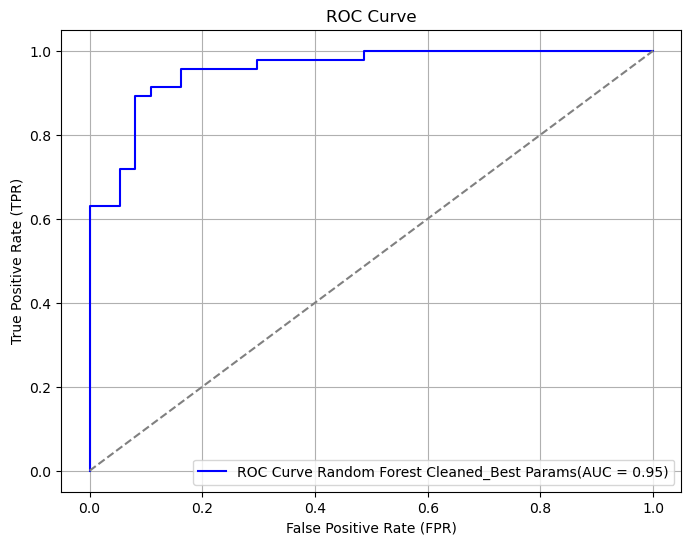

In [1274]:
rf2 = Grid_rf1.best_estimator_
rf2.fit(x_train_scaled,y_train)
train_score=cross_val_score(rf2,x_train_scaled,y_train,cv=5).mean()
te_y_pred_rf2=rf2.predict(x_test_scaled)
tr_y_pred_rf2=rf2.predict(x_train_scaled)
test_score=rf2.score(x_test_scaled,y_test)
print("Scores with Random Forest Classifier Best Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y_train,tr_y_pred_rf2))
print("Test accuracy:",accuracy_score(y_test,te_y_pred_rf2))
print("*"*100)  
print("Train f1_score:",f1_score(y_train,tr_y_pred_rf2))
print("Test f1_score:",f1_score(y_test,te_y_pred_rf2))
print("*"*100) 
print("Train recall_score:",recall_score(y_train,tr_y_pred_rf2))
print("Test recall_score:",recall_score(y_test,te_y_pred_rf2))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y_train,rf2.predict_proba(x_train_scaled)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y_test,rf2.predict_proba(x_test_scaled)[:,1]))
print("*"*100)
y_prob_rf2 = (rf2.predict_proba(x_test_scaled)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf2,)
auc_score_rf2 = roc_auc_score(y_test, y_prob_rf2)
print("Train Confusion Matrix with Random Forest Classifier Cleaned_Best Parameters\n",confusion_matrix(y_train,tr_y_pred_rf2))
print("Test Confusion Matrix with Random Forest Classifier Cleaned_Best Parameters\n",confusion_matrix(y_test,te_y_pred_rf2))
print("*"*100) 
cm_tr_rf2=ConfusionMatrixDisplay(confusion_matrix(y_train,tr_y_pred_rf2))
cm_tr_rf2.plot()
plt.show()
cm_te_rf2=ConfusionMatrixDisplay(confusion_matrix(y_test,te_y_pred_rf2))
cm_te_rf2.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_rf2)).flatten()
t2_rf2=FN / (FN + TP)
print("Train Classification Report with Random Forest Classifier Cleaned_Best Parameters\n",classification_report(y_train,tr_y_pred_rf2))
print("Test Classification Report with Random Forest Classifier Cleaned_Best Parameters\n",classification_report(y_test,te_y_pred_rf2))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve Random Forest Cleaned_Best Params(AUC = {auc_score_rf2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1276]:
result4=pd.DataFrame({'Train_CV':[cross_val_score(rf2,x_train_scaled,y_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y_train,tr_y_pred_rf2)],
                     'Test_Accuracy':[accuracy_score(y_test,te_y_pred_rf2)],
                     'Train f1_score':[f1_score(y_train,tr_y_pred_rf2)],
                     'Test f1_score':[f1_score(y_test,te_y_pred_rf2)],
                     'Train Recall_score':[recall_score(y_train,tr_y_pred_rf2)],
                     'Test Recall_score':[recall_score(y_test,te_y_pred_rf2)],
                     'Train roc_auc_score':[roc_auc_score(y_train,rf2.predict_proba(x_train_scaled)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y_test,rf2.predict_proba(x_test_scaled)[:,1])],
                      'Type2_error':[t2_rf2]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['RandomForst_Cleaned_Best_Params']
result4.index = Row_Index
result4.T

RandomForst_Cleaned_Best_Params
Train_CV                                        0.88
Train_Accuracy                                  1.00
Test_Accuracy                                   0.90
Train f1_score                                  1.00
Test f1_score                                   0.92
Train Recall_score                              1.00
Test Recall_score                               0.96
Train roc_auc_score                             1.00
Test roc_auc_score                              0.95
Type2_error                                     0.04

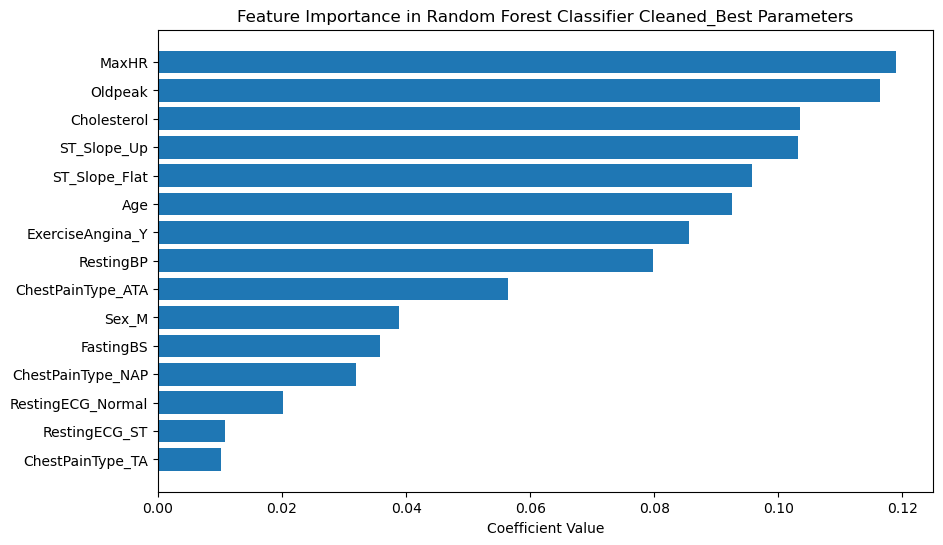

In [1277]:
features_imp4 = pd.DataFrame({'feature': x_train_scaled.columns, 'importance': rf2.feature_importances_})
features_imp4=features_imp4.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp4['feature'], features_imp4['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Random Forest Classifier Cleaned_Best Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1283]:
features_imp4

feature  importance
4               MaxHR        0.12
5             Oldpeak        0.12
2         Cholesterol        0.10
14        ST_Slope_Up        0.10
13      ST_Slope_Flat        0.10
0                 Age        0.09
12   ExerciseAngina_Y        0.09
1           RestingBP        0.08
7   ChestPainType_ATA        0.06
6               Sex_M        0.04
3           FastingBS        0.04
8   ChestPainType_NAP        0.03
10  RestingECG_Normal        0.02
11      RestingECG_ST        0.01
9    ChestPainType_TA        0.01

### MAxHR and Oldpeak are most important feature followed by St_Slope and  Cholesterol

## 5) XGboost Classifier without cleaned Data- as it is not sensitive to Outliers, Missing Values and scaling

Scores with XGboost Uncleaned Data and Default Parameters

Train Score: 0.8680119717032468
Test Score: 0.8795180722891566
****************************************************************************************************
Train accuracy: 1.0
Test accuracy: 0.8795180722891566
****************************************************************************************************
Train f1_score: 1.0
Test f1_score: 0.8913043478260869
****************************************************************************************************
Train recall_score: 1.0
Test recall_score: 0.8913043478260869
****************************************************************************************************
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9300822561692126
****************************************************************************************************
Train Confusion Matrix with XGBoost Uncleaned_Default Parameters
 [[332   0]
 [  0 411]]
Test Confusion Matrix with XGBoost  Uncleaned_Defa

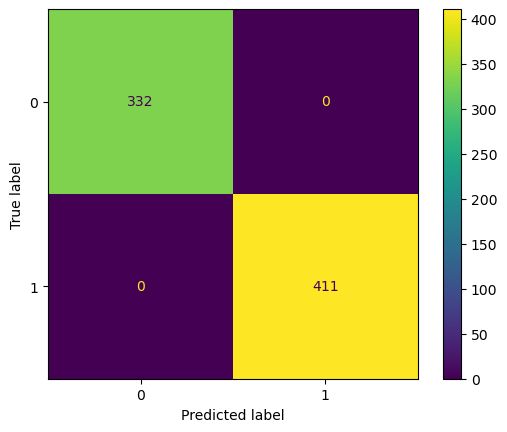

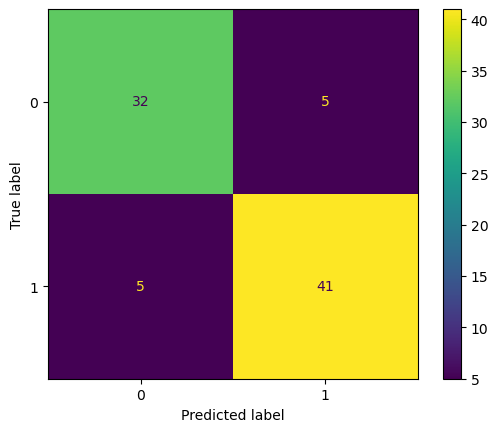

Train Classification Report with XGBoost Uncleaned_Default Parameters
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       411

    accuracy                           1.00       743
   macro avg       1.00      1.00      1.00       743
weighted avg       1.00      1.00      1.00       743

Test Classification Report with XGBoost Uncleaned_Default Parameters
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        37
           1       0.89      0.89      0.89        46

    accuracy                           0.88        83
   macro avg       0.88      0.88      0.88        83
weighted avg       0.88      0.88      0.88        83



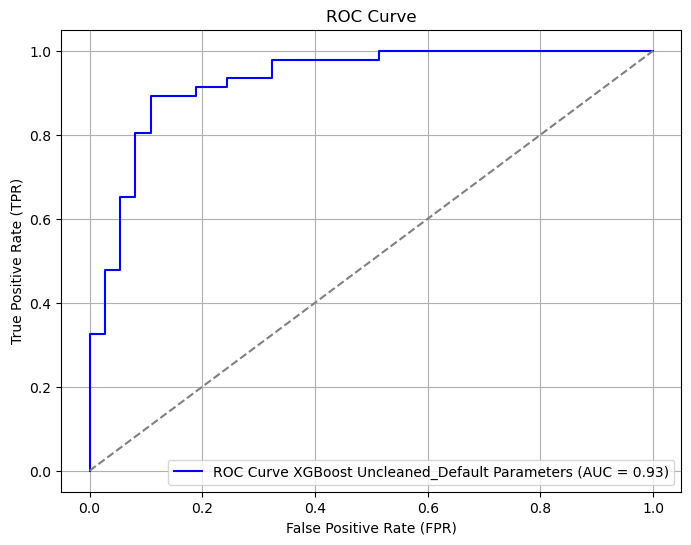

In [1287]:
xgb0 = XGBClassifier(random_state=1, n_jobs=-1)
xgb0.fit(x1_train,y1_train)
train_score=cross_val_score(xgb0,x1_train,y1_train,cv=5).mean()
te_y_pred_xgb0=xgb0.predict(x1_test)
tr_y_pred_xgb0=xgb0.predict(x1_train)
test_score=xgb0.score(x1_test,y1_test)
print("Scores with XGboost Uncleaned Data and Default Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y1_train,tr_y_pred_xgb0))
print("Test accuracy:",accuracy_score(y1_test,te_y_pred_xgb0))
print("*"*100)  
print("Train f1_score:",f1_score(y1_train,tr_y_pred_xgb0))
print("Test f1_score:",f1_score(y1_test,te_y_pred_xgb0))
print("*"*100) 
print("Train recall_score:",recall_score(y1_train,tr_y_pred_xgb0))
print("Test recall_score:",recall_score(y1_test,te_y_pred_xgb0))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y1_train,xgb0.predict_proba(x1_train)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y1_test,xgb0.predict_proba(x1_test)[:,1]))
print("*"*100)
y_prob_xgb0 = (xgb0.predict_proba(x1_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y1_test, y_prob_xgb0)
auc_score_xgb0 = roc_auc_score(y1_test, y_prob_xgb0)
print("Train Confusion Matrix with XGBoost Uncleaned_Default Parameters\n",confusion_matrix(y1_train,tr_y_pred_xgb0))
print("Test Confusion Matrix with XGBoost  Uncleaned_Default Parameters\n",confusion_matrix(y1_test,te_y_pred_xgb0))
print("*"*100) 
cm_tr_xgb0=ConfusionMatrixDisplay(confusion_matrix(y1_train,tr_y_pred_xgb0))
cm_tr_xgb0.plot()
plt.show()
cm_te_xgb0=ConfusionMatrixDisplay(confusion_matrix(y1_test,te_y_pred_xgb0))
cm_te_xgb0.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_xgb0)).flatten()
t2_xgb0=FN / (FN + TP)
print("Train Classification Report with XGBoost Uncleaned_Default Parameters\n",classification_report(y1_train,tr_y_pred_xgb0))
print("Test Classification Report with XGBoost Uncleaned_Default Parameters\n",classification_report(y1_test,te_y_pred_xgb0))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve XGBoost Uncleaned_Default Parameters (AUC = {auc_score_xgb0:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1288]:
result5=pd.DataFrame({'Train_CV':[cross_val_score(xgb0,x1_train,y1_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y1_train,tr_y_pred_xgb0)],
                     'Test_Accuracy':[accuracy_score(y1_test,te_y_pred_xgb0)],
                     'Train f1_score':[f1_score(y1_train,tr_y_pred_xgb0)],
                     'Test f1_score':[f1_score(y1_test,te_y_pred_xgb0)],
                     'Train Recall_score':[recall_score(y1_train,tr_y_pred_xgb0)],
                     'Test Recall_score':[recall_score(y1_test,te_y_pred_xgb0)],
                     'Train roc_auc_score':[roc_auc_score(y1_train,xgb0.predict_proba(x1_train)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y1_test,xgb0.predict_proba(x1_test)[:,1])],
                      'Type2_error':[t2_xgb0]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['XGBoost_Uncleaned_Default_Params']
result5.index = Row_Index
result5.T

XGBoost_Uncleaned_Default_Params
Train_CV                                         0.87
Train_Accuracy                                   1.00
Test_Accuracy                                    0.88
Train f1_score                                   1.00
Test f1_score                                    0.89
Train Recall_score                               1.00
Test Recall_score                                0.89
Train roc_auc_score                              1.00
Test roc_auc_score                               0.93
Type2_error                                      0.11

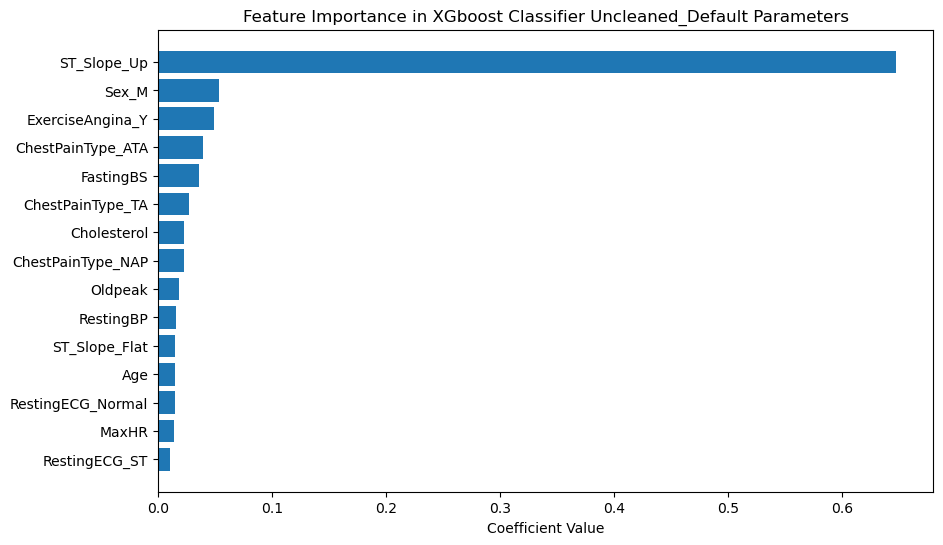

In [1290]:
features_imp5 = pd.DataFrame({'feature': x1_train.columns, 'importance': xgb0.feature_importances_})
features_imp5=features_imp5.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp5['feature'], features_imp5['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGboost Classifier Uncleaned_Default Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1292]:
features_imp5

feature  importance
14        ST_Slope_Up        0.65
6               Sex_M        0.05
12   ExerciseAngina_Y        0.05
7   ChestPainType_ATA        0.04
3           FastingBS        0.04
9    ChestPainType_TA        0.03
2         Cholesterol        0.02
8   ChestPainType_NAP        0.02
5             Oldpeak        0.02
1           RestingBP        0.02
13      ST_Slope_Flat        0.01
0                 Age        0.01
10  RestingECG_Normal        0.01
4               MaxHR        0.01
11      RestingECG_ST        0.01

### ST_Slope_up is most important feature followed by Sex and ExcersizeAngina

## 6) XGboost Classifier with cleaned Data and Default Parameters

Scores with XGboost Default Parameters

Train Score: 0.8613096317794305
Test Score: 0.8433734939759037
****************************************************************************************************
Train accuracy: 1.0
Test accuracy: 0.8433734939759037
****************************************************************************************************
Train f1_score: 1.0
Test f1_score: 0.8602150537634409
****************************************************************************************************
Train recall_score: 1.0
Test recall_score: 0.8695652173913043
****************************************************************************************************
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9242068155111633
****************************************************************************************************
Train Confusion Matrix with XGBoost cleaned_Default Parameters
 [[332   0]
 [  0 411]]
Test Confusion Matrix with XGBoost cleaned_Default Parameters
 [[30  7]

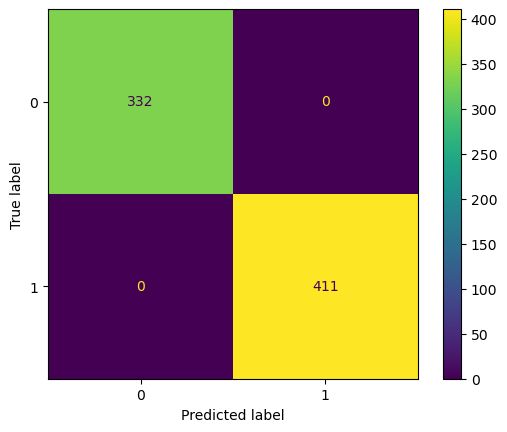

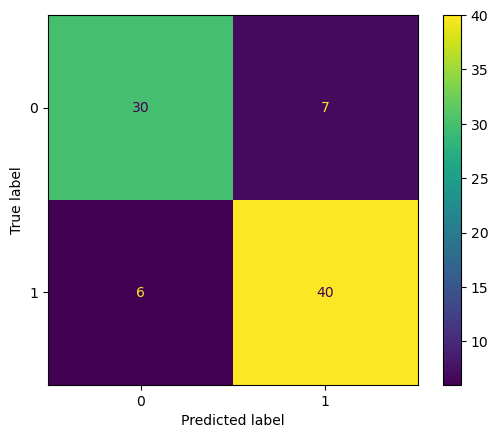

Train Classification Report with XGBoost cleaned_Default Parameters
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       411

    accuracy                           1.00       743
   macro avg       1.00      1.00      1.00       743
weighted avg       1.00      1.00      1.00       743

Test Classification Report with XGBoost cleaned_Default Parameters
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.85      0.87      0.86        46

    accuracy                           0.84        83
   macro avg       0.84      0.84      0.84        83
weighted avg       0.84      0.84      0.84        83



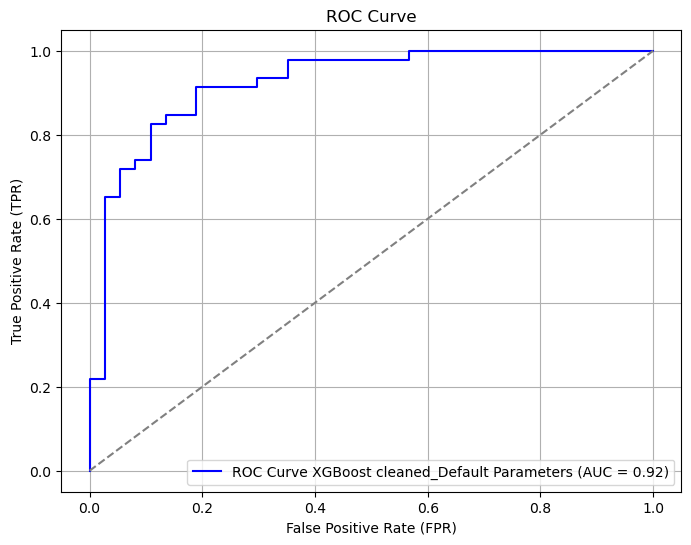

In [1297]:
xgb = XGBClassifier(random_state=1, n_jobs=-1)
xgb.fit(x_train_scaled,y_train)
train_score=cross_val_score(xgb,x_train_scaled,y_train,cv=5).mean()
te_y_pred_xgb=xgb.predict(x_test_scaled)
tr_y_pred_xgb=xgb.predict(x_train_scaled)
test_score=xgb.score(x_test_scaled,y_test)
print("Scores with XGboost Default Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y_train,tr_y_pred_xgb))
print("Test accuracy:",accuracy_score(y_test,te_y_pred_xgb))
print("*"*100)  
print("Train f1_score:",f1_score(y_train,tr_y_pred_xgb))
print("Test f1_score:",f1_score(y_test,te_y_pred_xgb))
print("*"*100) 
print("Train recall_score:",recall_score(y_train,tr_y_pred_xgb))
print("Test recall_score:",recall_score(y_test,te_y_pred_xgb))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y_train,xgb.predict_proba(x_train_scaled)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y_test,xgb.predict_proba(x_test_scaled)[:,1]))
print("*"*100)
y_prob_xgb = (xgb.predict_proba(x_test_scaled)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)
print("Train Confusion Matrix with XGBoost cleaned_Default Parameters\n",confusion_matrix(y_train,tr_y_pred_xgb))
print("Test Confusion Matrix with XGBoost cleaned_Default Parameters\n",confusion_matrix(y_test,te_y_pred_xgb))
print("*"*100) 
cm_tr_xgb=ConfusionMatrixDisplay(confusion_matrix(y_train,tr_y_pred_xgb))
cm_tr_xgb.plot()
plt.show()
cm_te_xgb=ConfusionMatrixDisplay(confusion_matrix(y_test,te_y_pred_xgb))
cm_te_xgb.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_xgb)).flatten()
t2_xgb=FN / (FN + TP)
print("Train Classification Report with XGBoost cleaned_Default Parameters\n",classification_report(y_train,tr_y_pred_xgb))
print("Test Classification Report with XGBoost cleaned_Default Parameters\n",classification_report(y_test,te_y_pred_xgb))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve XGBoost cleaned_Default Parameters (AUC = {auc_score_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1298]:
result6=pd.DataFrame({'Train_CV':[cross_val_score(xgb,x_train_scaled,y_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y_train,tr_y_pred_xgb)],
                     'Test_Accuracy':[accuracy_score(y_test,te_y_pred_xgb)],
                     'Train f1_score':[f1_score(y_train,tr_y_pred_xgb)],
                     'Test f1_score':[f1_score(y_test,te_y_pred_xgb)],
                     'Train Recall_score':[recall_score(y_train,tr_y_pred_xgb)],
                     'Test Recall_score':[recall_score(y_test,te_y_pred_xgb)],
                     'Test Recall_score':[recall_score(y_test,te_y_pred_xgb)],
                     'Train roc_auc_score':[roc_auc_score(y_train,xgb.predict_proba(x_train_scaled)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y_test,xgb.predict_proba(x_test_scaled)[:,1])],
                      'Type2_error':[t2_xgb]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['XGBoost cleaned_Default Parameters']
result6.index = Row_Index
result6.T

XGBoost cleaned_Default Parameters
Train_CV                                           0.86
Train_Accuracy                                     1.00
Test_Accuracy                                      0.84
Train f1_score                                     1.00
Test f1_score                                      0.86
Train Recall_score                                 1.00
Test Recall_score                                  0.87
Train roc_auc_score                                1.00
Test roc_auc_score                                 0.92
Type2_error                                        0.13

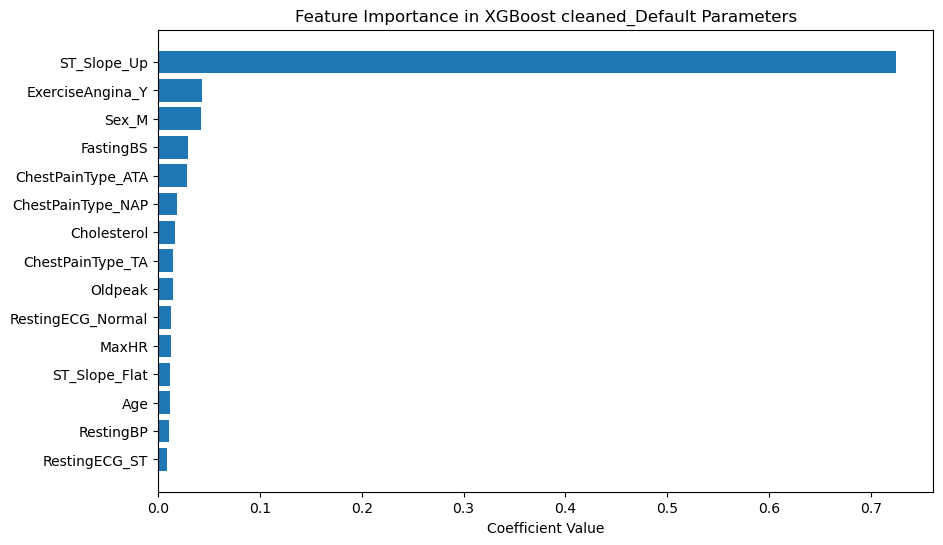

In [1299]:
features_imp6 = pd.DataFrame({'feature': x_train_scaled.columns, 'importance': xgb.feature_importances_})
features_imp6=features_imp6.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp6['feature'], features_imp6['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost cleaned_Default Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1302]:
features_imp6

feature  importance
14        ST_Slope_Up        0.72
12   ExerciseAngina_Y        0.04
6               Sex_M        0.04
3           FastingBS        0.03
7   ChestPainType_ATA        0.03
8   ChestPainType_NAP        0.02
2         Cholesterol        0.02
9    ChestPainType_TA        0.02
5             Oldpeak        0.01
10  RestingECG_Normal        0.01
4               MaxHR        0.01
13      ST_Slope_Flat        0.01
0                 Age        0.01
1           RestingBP        0.01
11      RestingECG_ST        0.01

### ST_Slope_up is most important feature 

## 7)XGBoost Classifier with Uncleaned Data and Best Parameters Using Grid Search

### Checking for range of Max Depth for Hyperparameters

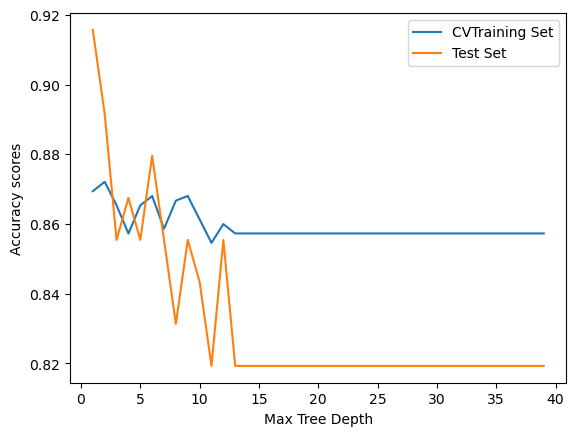

Best Test Score--> 0.9156626506024096
Best Depth-Test--> 1
Best CV Train Score--> 0.8720932341737712
Best Depth-Train--> 2


In [1308]:
train_scores = []
test_scores = []
for depth in range(1,40,1):
    xgb_hyper = XGBClassifier(max_depth = depth, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(xgb_hyper,x1_train,y1_train,cv=5).mean())
    xgb_hyper.fit(x1_train,y1_train)
    test_scores.append(xgb_hyper.score(x1_test,y1_test))

plt.plot(range(1,40,1),train_scores, label = "CVTraining Set")
plt.plot(range(1,40,1),test_scores, label = "Test Set")
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Depth-Test-->", np.array(test_scores).argmax()+1)
print("Best CV Train Score-->", max(train_scores))
print("Best Depth-Train-->", np.array(train_scores).argmax()+1)

### Checking for range of n_estimator for Hyperparameters

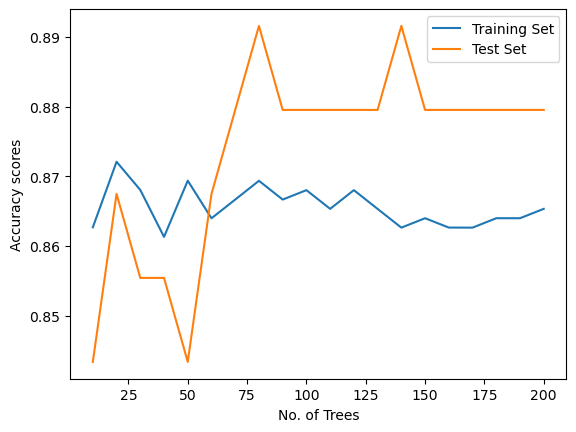

Best Test Score--> 0.891566265060241
Best No. of Trees-Test--> 80
Best CV Train Score--> 0.8720841647016144
Best No. of Trees-Train--> 20


In [1310]:
train_scores = []
test_scores = []
for trees in range(10,201,10):
    xgb_hyper = XGBClassifier(n_estimators = trees, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(xgb_hyper,x1_train,y1_train,cv=5).mean())
    xgb_hyper.fit(x1_train,y1_train)
    test_scores.append(xgb_hyper.score(x1_test,y1_test))

plt.plot(range(10,201,10),train_scores, label = "Training Set")
plt.plot(range(10,201,10),test_scores, label = "Test Set")
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()
print("Best Test Score-->", max(test_scores))
print("Best No. of Trees-Test-->", (np.array(test_scores).argmax()*10+10))
print("Best CV Train Score-->", max(train_scores))
print("Best No. of Trees-Train-->", (np.array(train_scores).argmax()*10+10))

### Checking for range of Max fetaures for Hyperparameters

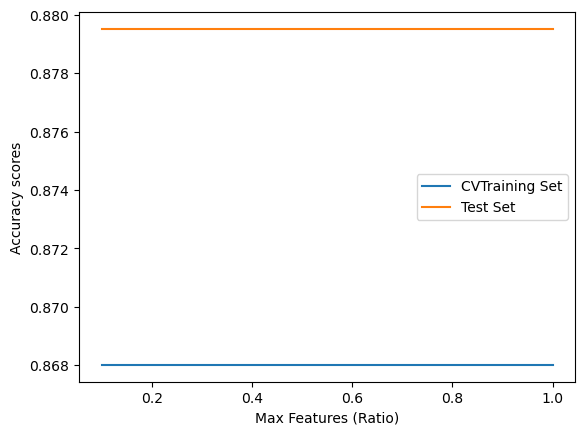

Best Test Score--> 0.8795180722891566
Best Max Features-Test--> 0.1
Best CV Train Score--> 0.8680119717032468
Best Max Feature-Train--> 0.1


In [1312]:
train_scores = []
test_scores = []
for features in np.linspace(0.1,1.0,10):
    xgb_hyper = XGBClassifier(max_features = features, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(xgb_hyper,x1_train,y1_train,cv=5).mean())
    xgb_hyper.fit(x1_train,y1_train)
    test_scores.append(xgb_hyper.score(x1_test, y1_test))

plt.plot(np.linspace(0.1,1.0,10),train_scores, label = "CVTraining Set")
plt.plot(np.linspace(0.1,1.0,10),test_scores, label = "Test Set")
plt.xlabel('Max Features (Ratio)')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Max Features-Test-->", (np.array(test_scores).argmax()*0.1+0.1))
print("Best CV Train Score-->", max(train_scores))
print("Best Max Feature-Train-->", (np.array(train_scores).argmax()*0.1+0.1))

In [1316]:
import time
start=time.time()
params_xgb = {'n_estimators': [20,50,80,130,200],
            'max_depth': [1,2,5,8,12],
            "max_features": [0.1, 0.2,0.5,0.7,0.9]
                     }
Grid_xgb = GridSearchCV(XGBClassifier(random_state=1, n_jobs=-1), param_grid=params_xgb,cv=5,scoring='f1')
Grid_xgb.fit(x1_train,y1_train)
print(Grid_xgb.best_params_)
end=time.time()
print("Total Time Taken for XGboost with Uncleaned Data and best Parameters:",(end-start))

{'max_depth': 2, 'max_features': 0.1, 'n_estimators': 50}
Total Time Taken for XGboost with Uncleaned Data and best Parameters: 89.95951080322266


Scores with XGBoost Classifier Unclened_Best Parameters

Train Score: 0.8747687284600036
Test Score: 0.9156626506024096
****************************************************************************************************
Train accuracy: 0.9192462987886945
Test accuracy: 0.9156626506024096
****************************************************************************************************
Train f1_score: 0.9280575539568345
Test f1_score: 0.9278350515463918
****************************************************************************************************
Train recall_score: 0.9416058394160584
Test recall_score: 0.9782608695652174
****************************************************************************************************
Train roc_auc_score: 0.9719828217981414
Test roc_auc_score: 0.9653349001175088
****************************************************************************************************
Train Confusion Matrix with XGBoost Classifier Unclened_Best Parameters
 [[296  3

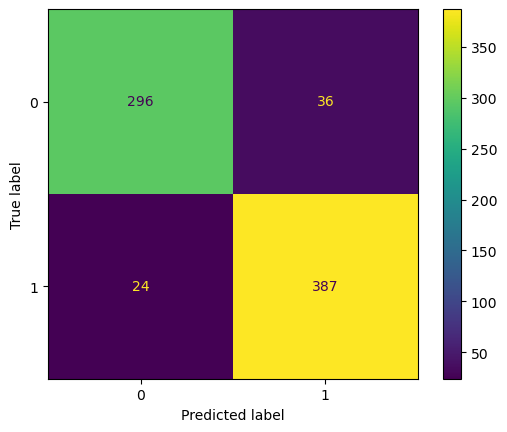

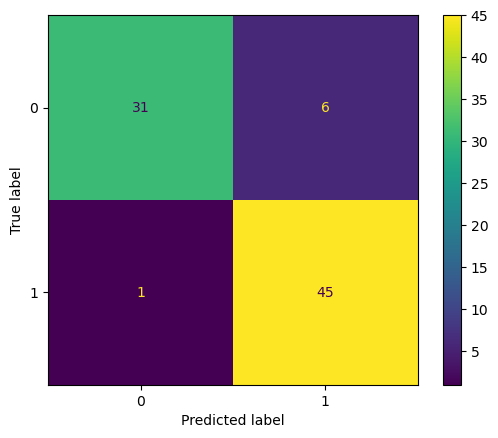

Train Classification Report with XGBoost Classifier Unclened_Best Parameters
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       332
           1       0.91      0.94      0.93       411

    accuracy                           0.92       743
   macro avg       0.92      0.92      0.92       743
weighted avg       0.92      0.92      0.92       743

Test Classification Report with XGBoost Classifier Unclened_Best Parameters
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        37
           1       0.88      0.98      0.93        46

    accuracy                           0.92        83
   macro avg       0.93      0.91      0.91        83
weighted avg       0.92      0.92      0.91        83



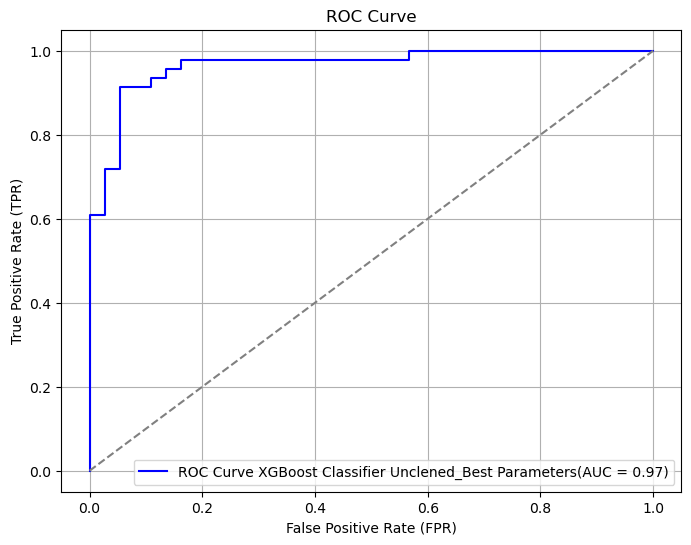

In [1318]:
xgb1 = Grid_xgb.best_estimator_
xgb1.fit(x1_train,y1_train)
train_score=cross_val_score(xgb1,x1_train,y1_train,cv=5).mean()
te_y_pred_xgb1=xgb1.predict(x1_test)
tr_y_pred_xgb1=xgb1.predict(x1_train)
test_score=xgb1.score(x1_test,y1_test)
print("Scores with XGBoost Classifier Unclened_Best Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y1_train,tr_y_pred_xgb1))
print("Test accuracy:",accuracy_score(y1_test,te_y_pred_xgb1))
print("*"*100)  
print("Train f1_score:",f1_score(y1_train,tr_y_pred_xgb1))
print("Test f1_score:",f1_score(y1_test,te_y_pred_xgb1))
print("*"*100) 
print("Train recall_score:",recall_score(y1_train,tr_y_pred_xgb1))
print("Test recall_score:",recall_score(y1_test,te_y_pred_xgb1))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y1_train,xgb1.predict_proba(x1_train)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y1_test,xgb1.predict_proba(x1_test)[:,1]))
print("*"*100)
y_prob_xgb1 = (xgb1.predict_proba(x1_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y1_test, y_prob_xgb1,)
auc_score_xgb1 = roc_auc_score(y1_test, y_prob_xgb1)
print("Train Confusion Matrix with XGBoost Classifier Unclened_Best Parameters\n",confusion_matrix(y1_train,tr_y_pred_xgb1))
print("Test Confusion Matrix with XGBoost Classifier Unclened_Best Parameters\n",confusion_matrix(y1_test,te_y_pred_xgb1))
print("*"*100) 
cm_tr_xgb1=ConfusionMatrixDisplay(confusion_matrix(y1_train,tr_y_pred_xgb1))
cm_tr_xgb1.plot()
plt.show()
cm_te_xgb1=ConfusionMatrixDisplay(confusion_matrix(y1_test,te_y_pred_xgb1))
cm_te_xgb1.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_xgb1)).flatten()
t2_xgb1=FN / (FN + TP)
print("Train Classification Report with XGBoost Classifier Unclened_Best Parameters\n",classification_report(y1_train,tr_y_pred_xgb1))
print("Test Classification Report with XGBoost Classifier Unclened_Best Parameters\n",classification_report(y1_test,te_y_pred_xgb1))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve XGBoost Classifier Unclened_Best Parameters(AUC = {auc_score_xgb1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1319]:
result7=pd.DataFrame({'Train_CV':[cross_val_score(xgb1,x1_train,y1_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y1_train,tr_y_pred_xgb1)],
                     'Test_Accuracy':[accuracy_score(y1_test,te_y_pred_xgb1)],
                     'Train f1_score':[f1_score(y1_train,tr_y_pred_xgb1)],
                     'Test f1_score':[f1_score(y1_test,te_y_pred_xgb1)],
                     'Train Recall_score':[recall_score(y1_train,tr_y_pred_xgb1)],
                     'Test Recall_score':[recall_score(y1_test,te_y_pred_xgb1)],
                     'Train roc_auc_score':[roc_auc_score(y1_train,xgb1.predict_proba(x1_train)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y1_test,xgb1.predict_proba(x1_test)[:,1])],
                      'Type2_error':[t2_xgb1]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['XGBoost Classifier Unclened_Best Parameters']
result7.index = Row_Index
result7.T

XGBoost Classifier Unclened_Best Parameters
Train_CV                                                    0.87
Train_Accuracy                                              0.92
Test_Accuracy                                               0.92
Train f1_score                                              0.93
Test f1_score                                               0.93
Train Recall_score                                          0.94
Test Recall_score                                           0.98
Train roc_auc_score                                         0.97
Test roc_auc_score                                          0.97
Type2_error                                                 0.02

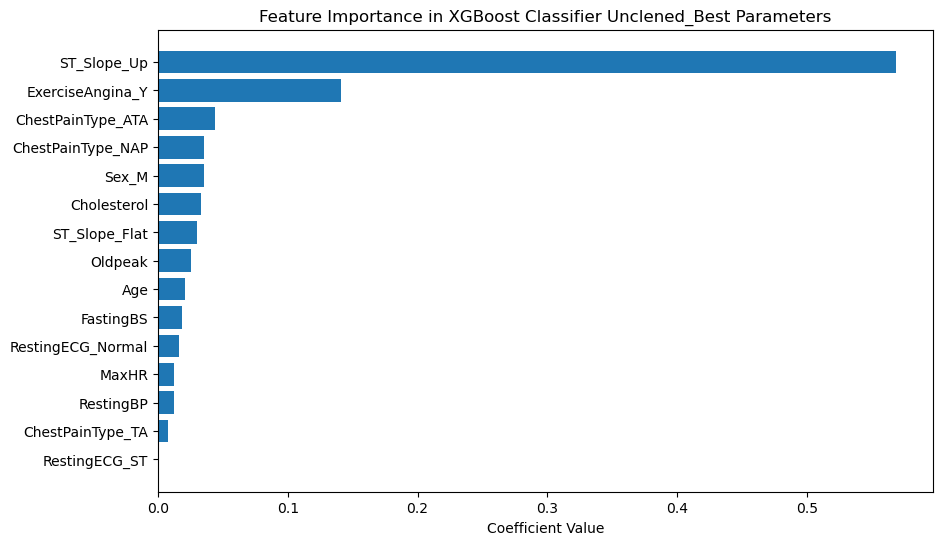

In [1321]:
features_imp7 = pd.DataFrame({'feature': x1_train.columns, 'importance': xgb1.feature_importances_})
features_imp7=features_imp7.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp7['feature'], features_imp7['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost Classifier Unclened_Best Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1324]:
features_imp7

feature  importance
14        ST_Slope_Up        0.57
12   ExerciseAngina_Y        0.14
7   ChestPainType_ATA        0.04
8   ChestPainType_NAP        0.04
6               Sex_M        0.04
2         Cholesterol        0.03
13      ST_Slope_Flat        0.03
5             Oldpeak        0.03
0                 Age        0.02
3           FastingBS        0.02
10  RestingECG_Normal        0.02
4               MaxHR        0.01
1           RestingBP        0.01
9    ChestPainType_TA        0.01
11      RestingECG_ST        0.00

### ST_Slope_up is most important feature followed by ExcersizeAngina and ChestPainType

## 8)XGBoost Classifier with cleaned Data and Best Parameters Using Grid Search

### Checking for range of Max Depth for Hyperparameters

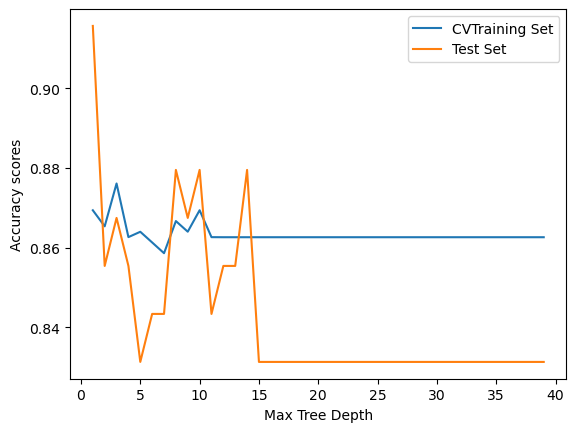

Best Test Score--> 0.9156626506024096
Best Depth-Test--> 1
Best CV Train Score--> 0.8761110103391984
Best Depth-Train--> 3


In [1329]:
train_scores = []
test_scores = []
for depth in range(1,40,1):
    xgb_hyper = XGBClassifier(max_depth = depth, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(xgb_hyper,x_train_scaled,y_train,cv=5).mean())
    xgb_hyper.fit(x_train_scaled,y_train)
    test_scores.append(xgb_hyper.score(x_test_scaled,y_test))

plt.plot(range(1,40,1),train_scores, label = "CVTraining Set")
plt.plot(range(1,40,1),test_scores, label = "Test Set")
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Depth-Test-->", np.array(test_scores).argmax()+1)
print("Best CV Train Score-->", max(train_scores))
print("Best Depth-Train-->", np.array(train_scores).argmax()+1)

### Checking for range of n_estimator for Hyperparameters

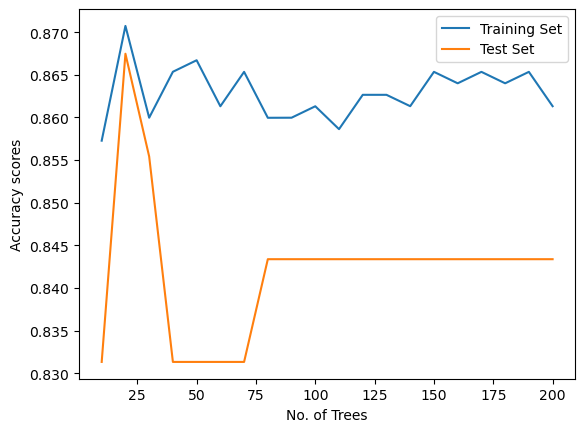

Best Test Score--> 0.8674698795180723
Best No. of Trees-Test--> 20
Best CV Train Score--> 0.870732813350263
Best No. of Trees-Train--> 20


In [1331]:
train_scores = []
test_scores = []
for trees in range(10,201,10):
    xgb_hyper = XGBClassifier(n_estimators = trees, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(xgb_hyper,x_train_scaled,y_train,cv=5).mean())
    xgb_hyper.fit(x_train_scaled,y_train)
    test_scores.append(xgb_hyper.score(x_test_scaled,y_test))

plt.plot(range(10,201,10),train_scores, label = "Training Set")
plt.plot(range(10,201,10),test_scores, label = "Test Set")
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()
print("Best Test Score-->", max(test_scores))
print("Best No. of Trees-Test-->", (np.array(test_scores).argmax()*10+10))
print("Best CV Train Score-->", max(train_scores))
print("Best No. of Trees-Train-->", (np.array(train_scores).argmax()*10+10))

### Checking for range of Max fetaures for Hyperparameters

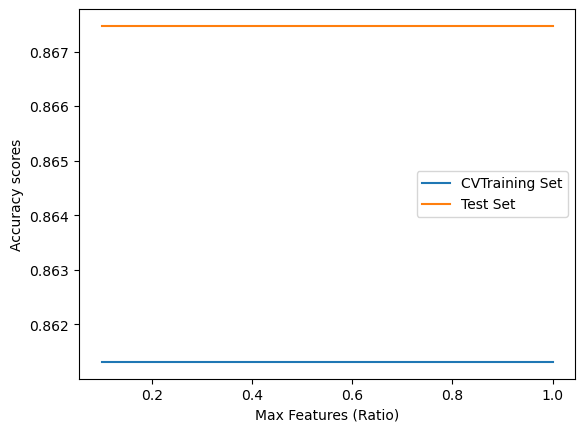

Best Test Score--> 0.8674698795180723
Best Max Features-Test--> 0.1
Best CV Train Score--> 0.8613096317794305
Best Max Feature-Train--> 0.1


In [1333]:
train_scores = []
test_scores = []
for features in np.linspace(0.1,1.0,10):
    xgb_hyper = XGBClassifier(max_features = features, random_state=1, n_jobs=-1)
    train_scores.append(cross_val_score(xgb_hyper,x_train_scaled,y_train,cv=5).mean())
    xgb_hyper.fit(x_train_scaled,y_train)
    test_scores.append(rf_hyper.score(x_test_scaled, y_test))

plt.plot(np.linspace(0.1,1.0,10),train_scores, label = "CVTraining Set")
plt.plot(np.linspace(0.1,1.0,10),test_scores, label = "Test Set")
plt.xlabel('Max Features (Ratio)')
plt.ylabel('Accuracy scores')
plt.legend()
plt.show()

print("Best Test Score-->", max(test_scores))
print("Best Max Features-Test-->", (np.array(test_scores).argmax()*0.1+0.1))
print("Best CV Train Score-->", max(train_scores))
print("Best Max Feature-Train-->", (np.array(train_scores).argmax()*0.1+0.1))

In [1337]:
import time
start=time.time()
params_xgb = {'n_estimators': [20,30,60,80,120],
            'max_depth': [1,2,5,8,12],
            "max_features": [0.1, 0.2,0.5,0.7,0.9]
                     }
Grid_xgb1 = GridSearchCV(XGBClassifier(random_state=1, n_jobs=-1), param_grid=params_xgb,cv=5,scoring='f1')
Grid_xgb1.fit(x_train_scaled,y_train)
print(Grid_xgb1.best_params_)
end=time.time()
print("Total Time Taken for XGboost with cleaned Data and best Parameters:",(end-start))

{'max_depth': 2, 'max_features': 0.1, 'n_estimators': 60}
Total Time Taken for XGboost with cleaned Data and best Parameters: 65.42549896240234


Scores with XGBoost Classifier cleaned_Best Parameters

Train Score: 0.8774714311627063
Test Score: 0.891566265060241
****************************************************************************************************
Train accuracy: 0.9205921938088829
Test accuracy: 0.891566265060241
****************************************************************************************************
Train f1_score: 0.929678188319428
Test f1_score: 0.9072164948453608
****************************************************************************************************
Train recall_score: 0.948905109489051
Test recall_score: 0.9565217391304348
****************************************************************************************************
Train roc_auc_score: 0.9750131914519391
Test roc_auc_score: 0.955346650998825
****************************************************************************************************
Train Confusion Matrix with XGBoost Classifier cleaned_Best Parameters
 [[294  38]
 [ 2

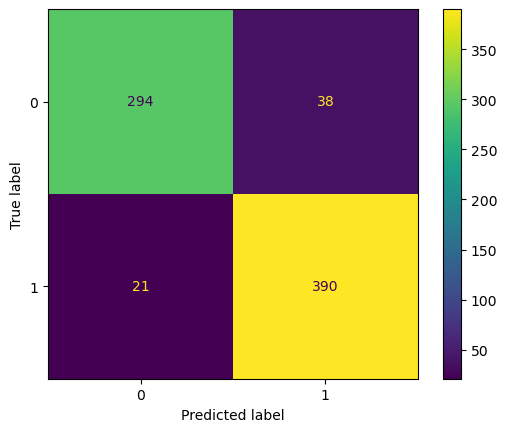

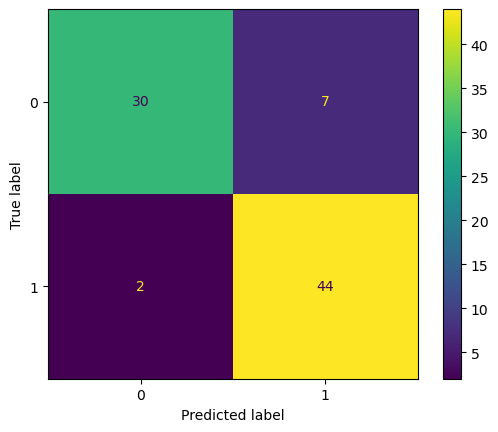

Train Classification Report with XGBoost Classifier cleaned_Best Parameters
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       332
           1       0.91      0.95      0.93       411

    accuracy                           0.92       743
   macro avg       0.92      0.92      0.92       743
weighted avg       0.92      0.92      0.92       743

Test Classification Report with XGBoost Classifier cleaned_Best Parameters
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        37
           1       0.86      0.96      0.91        46

    accuracy                           0.89        83
   macro avg       0.90      0.88      0.89        83
weighted avg       0.90      0.89      0.89        83



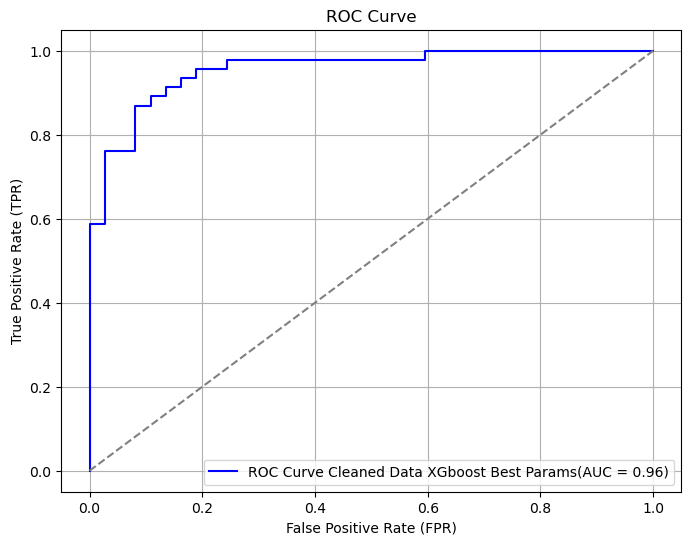

In [1339]:
xgb2 = Grid_xgb1.best_estimator_
xgb2.fit(x_train_scaled,y_train)
train_score=cross_val_score(xgb2,x_train_scaled,y_train,cv=5).mean()
te_y_pred_xgb2=xgb2.predict(x_test_scaled)
tr_y_pred_xgb2=xgb2.predict(x_train_scaled)
test_score=xgb2.score(x_test_scaled,y_test)
print("Scores with XGBoost Classifier cleaned_Best Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y_train,tr_y_pred_xgb2))
print("Test accuracy:",accuracy_score(y_test,te_y_pred_xgb2))
print("*"*100)  
print("Train f1_score:",f1_score(y_train,tr_y_pred_xgb2))
print("Test f1_score:",f1_score(y_test,te_y_pred_xgb2))
print("*"*100) 
print("Train recall_score:",recall_score(y_train,tr_y_pred_xgb2))
print("Test recall_score:",recall_score(y_test,te_y_pred_xgb2))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y_train,xgb2.predict_proba(x_train_scaled)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y_test,xgb2.predict_proba(x_test_scaled)[:,1]))
print("*"*100)
y_prob_xgb2 = (xgb2.predict_proba(x_test_scaled)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb2,)
auc_score_xgb2 = roc_auc_score(y_test, y_prob_xgb2)
print("Train Confusion Matrix with XGBoost Classifier cleaned_Best Parameters\n",confusion_matrix(y_train,tr_y_pred_xgb2))
print("Test Confusion Matrix with XGBoost Classifier cleaned_Best Parameters\n",confusion_matrix(y_test,te_y_pred_xgb2))
print("*"*100) 
cm_tr_xgb2=ConfusionMatrixDisplay(confusion_matrix(y_train,tr_y_pred_xgb2))
cm_tr_xgb2.plot()
plt.show()
cm_te_xgb2=ConfusionMatrixDisplay(confusion_matrix(y_test,te_y_pred_xgb2))
cm_te_xgb2.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_xgb2)).flatten()
t2_xgb2=FN / (FN + TP)
print("Train Classification Report with XGBoost Classifier cleaned_Best Parameters\n",classification_report(y_train,tr_y_pred_xgb2))
print("Test Classification Report with XGBoost Classifier cleaned_Best Parameters\n",classification_report(y_test,te_y_pred_xgb2))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve Cleaned Data XGboost Best Params(AUC = {auc_score_xgb2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1341]:
result8=pd.DataFrame({'Train_CV':[cross_val_score(xgb2,x_train_scaled,y_train,cv=5).mean()],
                      'Train_Accuracy':[accuracy_score(y_train,tr_y_pred_xgb2)],
                     'Test_Accuracy':[accuracy_score(y_test,te_y_pred_xgb2)],
                     'Train f1_score':[f1_score(y_train,tr_y_pred_xgb2)],
                     'Test f1_score':[f1_score(y_test,te_y_pred_xgb2)],
                     'Train Recall_score':[recall_score(y_train,tr_y_pred_xgb2)],
                     'Test Recall_score':[recall_score(y_test,te_y_pred_xgb2)],
                     'Train roc_auc_score':[roc_auc_score(y_train,xgb2.predict_proba(x_train_scaled)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y_test,xgb2.predict_proba(x_test_scaled)[:,1])],
                      'Type2_error':[t2_xgb2]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['XGboost_Cleaned_Best_Params']
result8.index = Row_Index
result8.T

XGboost_Cleaned_Best_Params
Train_CV                                    0.88
Train_Accuracy                              0.92
Test_Accuracy                               0.89
Train f1_score                              0.93
Test f1_score                               0.91
Train Recall_score                          0.95
Test Recall_score                           0.96
Train roc_auc_score                         0.98
Test roc_auc_score                          0.96
Type2_error                                 0.04

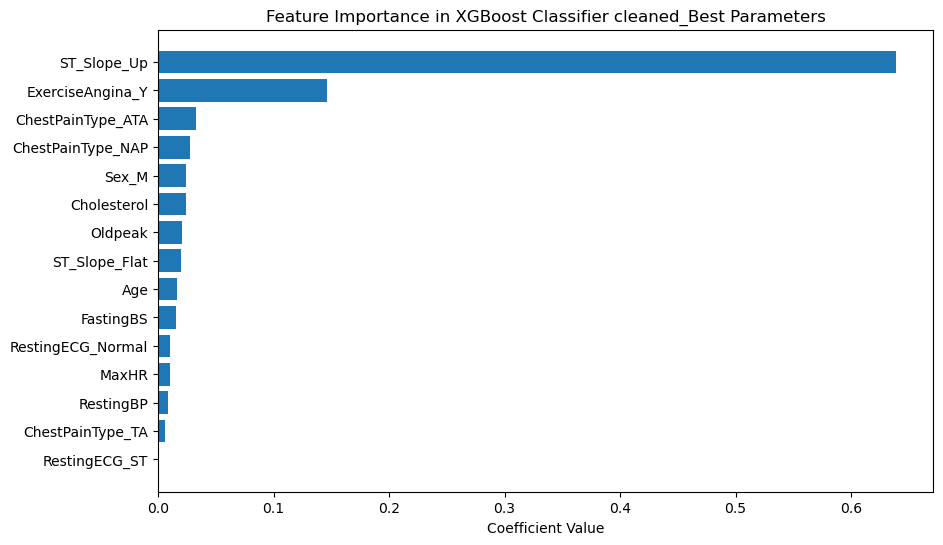

In [1343]:
features_imp8 = pd.DataFrame({'feature': x_train_scaled.columns, 'importance': xgb2.feature_importances_})
features_imp8=features_imp8.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp8['feature'], features_imp8['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost Classifier cleaned_Best Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1345]:
features_imp8

feature  importance
14        ST_Slope_Up        0.64
12   ExerciseAngina_Y        0.15
7   ChestPainType_ATA        0.03
8   ChestPainType_NAP        0.03
6               Sex_M        0.02
2         Cholesterol        0.02
5             Oldpeak        0.02
13      ST_Slope_Flat        0.02
0                 Age        0.02
3           FastingBS        0.02
10  RestingECG_Normal        0.01
4               MaxHR        0.01
1           RestingBP        0.01
9    ChestPainType_TA        0.01
11      RestingECG_ST        0.00

### ST_Slope_up is most important feature followed by ExcersizeAngina and ChestPainType

## 9) Logistics Regression with Default Parameters

Scores with Logistic Regression Default Parameters

Train Score: 0.8680029022310901
Test Score: 0.8674698795180723
****************************************************************************************************
Train accuracy: 0.8775235531628532
Test accuracy: 0.8674698795180723
****************************************************************************************************
Train f1_score: 0.8915375446960667
Test f1_score: 0.8842105263157894
****************************************************************************************************
Train recall_score: 0.9099756690997567
Test recall_score: 0.9130434782608695
****************************************************************************************************
Train roc_auc_score: 0.9313165069035265
Test roc_auc_score: 0.9576968272620447
****************************************************************************************************
Train Confusion Matrix with Logistic Regression Default Parameters
 [[278  54]
 [ 37 3

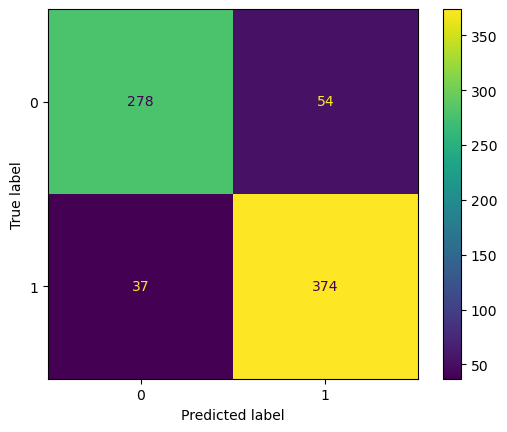

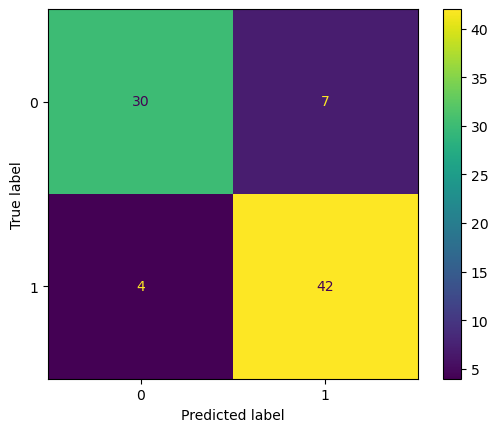

Train Classification Report with Logistic Regression Default Parameters 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       332
           1       0.87      0.91      0.89       411

    accuracy                           0.88       743
   macro avg       0.88      0.87      0.88       743
weighted avg       0.88      0.88      0.88       743

Test Classification Report with Logistic Regression Default Parameters
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.86      0.91      0.88        46

    accuracy                           0.87        83
   macro avg       0.87      0.86      0.86        83
weighted avg       0.87      0.87      0.87        83



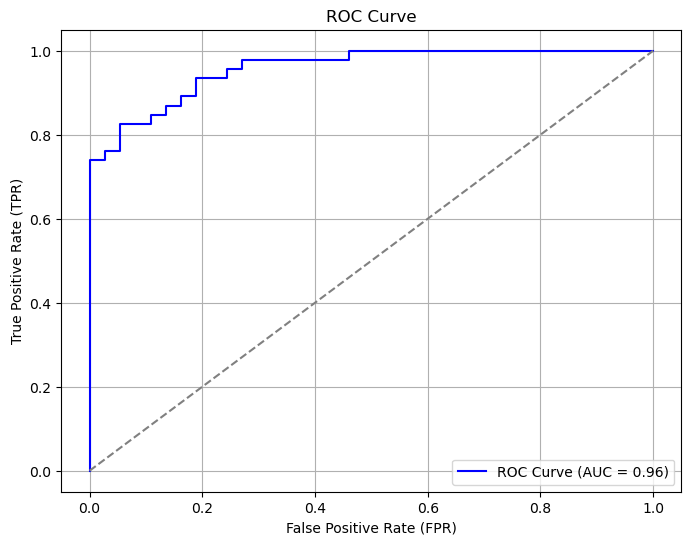

In [1349]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
lr=LogisticRegression(random_state=1)
lr.fit(x2_train_scaled,y2_train)
train_score=cross_val_score(lr,x2_train_scaled,y2_train,cv=5).mean()
te_y_pred_lr=lr.predict(x2_test_scaled)
tr_y_pred_lr=lr.predict(x2_train_scaled)
test_score=lr.score(x2_test_scaled,y2_test)
print("Scores with Logistic Regression Default Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y2_train,tr_y_pred_lr))
print("Test accuracy:",accuracy_score(y2_test,te_y_pred_lr))
print("*"*100)  
print("Train f1_score:",f1_score(y2_train,tr_y_pred_lr))
print("Test f1_score:",f1_score(y2_test,te_y_pred_lr))
print("*"*100) 
print("Train recall_score:",recall_score(y2_train,tr_y_pred_lr))
print("Test recall_score:",recall_score(y2_test,te_y_pred_lr))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y2_train,lr.predict_proba(x2_train_scaled)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y2_test,lr.predict_proba(x2_test_scaled)[:,1]))
print("*"*100)
y_prob = (lr.predict_proba(x2_test_scaled)[:, 1])
fpr, tpr, thresholds = roc_curve(y2_test, y_prob)
auc_score = roc_auc_score(y2_test, y_prob)
print("Train Confusion Matrix with Logistic Regression Default Parameters\n",confusion_matrix(y2_train,tr_y_pred_lr))
print("Test Confusion Matrix with Logistic Regression Default Parameters\n",confusion_matrix(y2_test,te_y_pred_lr))
print("*"*100) 
cm_tr=ConfusionMatrixDisplay(confusion_matrix(y2_train,tr_y_pred_lr))
cm_tr.plot()
plt.show()
cm_te=ConfusionMatrixDisplay(confusion_matrix(y2_test,te_y_pred_lr))
cm_te.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_lr)).flatten()
t2_lr=FN / (FN + TP)

print("Train Classification Report with Logistic Regression Default Parameters \n",classification_report(y2_train,tr_y_pred_lr))
print("Test Classification Report with Logistic Regression Default Parameters\n",classification_report(y2_test,te_y_pred_lr))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1351]:
result9=pd.DataFrame({'Train_CV':[cross_val_score(lr,x2_train_scaled,y2_train,cv=5).mean()],
                    'Train_Accuracy':[accuracy_score(y2_train,tr_y_pred_lr)],
                     'Test_Accuracy':[accuracy_score(y2_test,te_y_pred_lr)],
                     'Train f1_score':[f1_score(y2_train,tr_y_pred_lr)],
                     'Test f1_score':[f1_score(y2_test,te_y_pred_lr)],
                     'Train Recall_score':[recall_score(y2_train,tr_y_pred_lr)],
                     'Test Recall_score':[recall_score(y2_test,te_y_pred_lr)],
                     'Train roc_auc_score':[roc_auc_score(y2_train,lr.predict_proba(x2_train_scaled)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y2_test,lr.predict_proba(x2_test_scaled)[:,1])],
                      'Type2_error':[t2_lr]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['LogReg_Default_Params']
result9.index = Row_Index
result9.T

LogReg_Default_Params
Train_CV                              0.87
Train_Accuracy                        0.88
Test_Accuracy                         0.87
Train f1_score                        0.89
Test f1_score                         0.88
Train Recall_score                    0.91
Test Recall_score                     0.91
Train roc_auc_score                   0.93
Test roc_auc_score                    0.96
Type2_error                           0.09

In [1353]:
abs(lr.coef_)

array([[0.47875034, 0.48305316, 0.40626918, 0.53343083, 0.74788902,
        0.68988302, 0.24532411, 0.21382642, 0.09990812, 0.53870785,
        0.74940822, 0.44509411]])

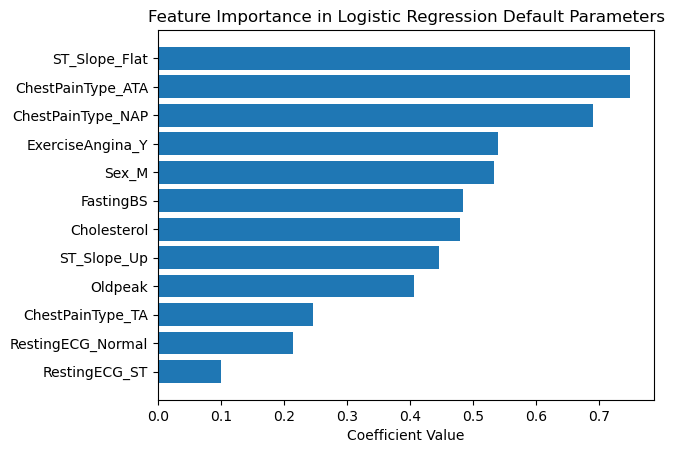

In [1355]:
coef = lr.coef_[0]  # For binary classification (single row)
feature_names = x2_train_scaled.columns  # If using pandas DataFrame

# Sort the features by absolute coefficient values
values = np.abs(coef)
features_imp9 = pd.DataFrame({'feature': x2_train_scaled.columns, 'importance': values})
features_imp9=features_imp9.sort_values(by='importance', ascending=False)
plt.barh(features_imp9['feature'], features_imp9['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression Default Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1357]:
features_imp9

feature  importance
10      ST_Slope_Flat        0.75
4   ChestPainType_ATA        0.75
5   ChestPainType_NAP        0.69
9    ExerciseAngina_Y        0.54
3               Sex_M        0.53
1           FastingBS        0.48
0         Cholesterol        0.48
11        ST_Slope_Up        0.45
2             Oldpeak        0.41
6    ChestPainType_TA        0.25
7   RestingECG_Normal        0.21
8       RestingECG_ST        0.10

### St_Slope_Fat and CHest _Pain Type are most important feature followed by Chest Pain_NAP and ExcerSize_Angina

## 10) Logistics Regression With Best Parameters Using GridSearch

In [1361]:
import time
start=time.time()
params_lr = {'solver':['lbfgs', 'liblinear', 'saga'],
             'l1_ratio':[0.0,0.5,1.0],
            'penalty':['l1','l2','elasticnet',None],
            'C':[1,0.5,1.5]
         }
grid_lr = GridSearchCV(LogisticRegression(random_state=1),param_grid=params_lr,cv=5,n_jobs=-1,scoring='f1')
grid_lr.fit(x2_train_scaled,y2_train)
print(grid_lr.best_params_)
end=time.time()
print("Time Taken for Grid Search on Logistic Regression:",(end-start))

{'C': 1, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'liblinear'}
Time Taken for Grid Search on Logistic Regression: 7.91001033782959


In [1363]:
grid_lr.best_estimator_

LogisticRegression(C=1, l1_ratio=0.0, penalty='l1', random_state=1,
                   solver='liblinear')

Scores with Logistic Regression Best Parameters

Train Score: 0.8680119717032471
Test Score: 0.8795180722891566
****************************************************************************************************
Train accuracy: 0.8748317631224765
Test accuracy: 0.8795180722891566
****************************************************************************************************
Train f1_score: 0.888622754491018
Test f1_score: 0.8958333333333334
****************************************************************************************************
Train recall_score: 0.902676399026764
Test recall_score: 0.9347826086956522
****************************************************************************************************
Train roc_auc_score: 0.9312945211502945
Test roc_auc_score: 0.9582843713278496
****************************************************************************************************
Train Confusion Matrix with Logistic Regression Best Parameters
 [[279  53]
 [ 40 371]]
Tes

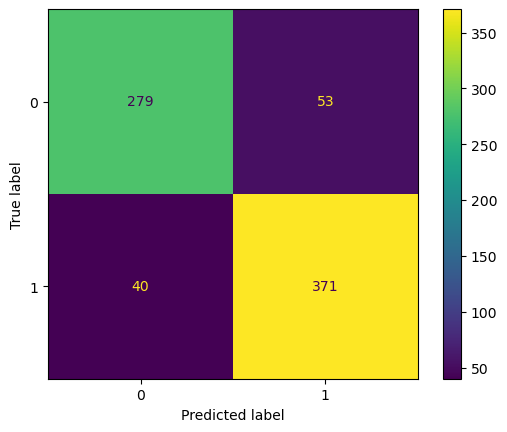

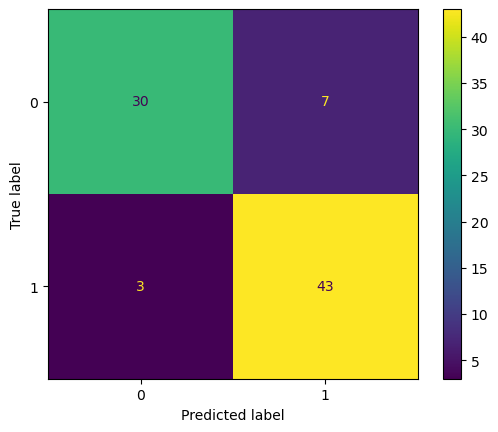

Train Classification Report with Logistic Regression Best Parameters
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       332
           1       0.88      0.90      0.89       411

    accuracy                           0.87       743
   macro avg       0.87      0.87      0.87       743
weighted avg       0.87      0.87      0.87       743

Test Classification Report with Logistic Regression Best Parameters
               precision    recall  f1-score   support

           0       0.91      0.81      0.86        37
           1       0.86      0.93      0.90        46

    accuracy                           0.88        83
   macro avg       0.88      0.87      0.88        83
weighted avg       0.88      0.88      0.88        83



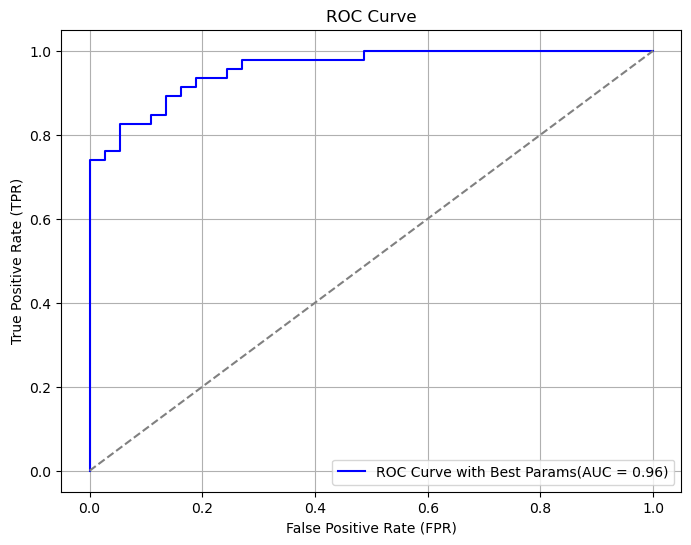

In [1365]:
lr1=grid_lr.best_estimator_
lr1.fit(x2_train_scaled,y2_train)
train_score=cross_val_score(lr1,x2_train_scaled,y2_train,cv=5).mean()
te_y_pred_lr1=lr1.predict(x2_test_scaled)
tr_y_pred_lr1=lr1.predict(x2_train_scaled)
test_score=lr1.score(x2_test_scaled,y2_test)
print("Scores with Logistic Regression Best Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y2_train,tr_y_pred_lr1))
print("Test accuracy:",accuracy_score(y2_test,te_y_pred_lr1))
print("*"*100)  
print("Train f1_score:",f1_score(y2_train,tr_y_pred_lr1))
print("Test f1_score:",f1_score(y2_test,te_y_pred_lr1))
print("*"*100) 
print("Train recall_score:",recall_score(y2_train,tr_y_pred_lr1))
print("Test recall_score:",recall_score(y2_test,te_y_pred_lr1))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y2_train,lr1.predict_proba(x2_train_scaled)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y2_test,lr1.predict_proba(x2_test_scaled)[:,1]))
print("*"*100)
y_prob_lr1 = (lr1.predict_proba(x2_test_scaled)[:, 1])
fpr, tpr, thresholds = roc_curve(y2_test, y_prob_lr1)
auc_score_lr1 = roc_auc_score(y2_test, y_prob_lr1)
print("Train Confusion Matrix with Logistic Regression Best Parameters\n",confusion_matrix(y2_train,tr_y_pred_lr1))
print("Test Confusion Matrix with Logistic Regression Best Parameters\n",confusion_matrix(y2_test,te_y_pred_lr1))
print("*"*100) 
cm_tr_lr1=ConfusionMatrixDisplay(confusion_matrix(y2_train,tr_y_pred_lr1))
cm_tr_lr1.plot()
plt.show()
cm_te_lr1=ConfusionMatrixDisplay(confusion_matrix(y2_test,te_y_pred_lr1))
cm_te_lr1.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_lr1)).flatten()
t2_lr1=FN / (FN + TP)
print("Train Classification Report with Logistic Regression Best Parameters\n",classification_report(y2_train,tr_y_pred_lr1))
print("Test Classification Report with Logistic Regression Best Parameters\n",classification_report(y2_test,te_y_pred_lr1))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve with Best Params(AUC = {auc_score_lr1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1366]:
result10=pd.DataFrame({'Train_CV':[cross_val_score(lr1,x2_train_scaled,y2_train,cv=5).mean()],
                    'Train_Accuracy':[accuracy_score(y2_train,tr_y_pred_lr1)],
                     'Test_Accuracy':[accuracy_score(y2_test,te_y_pred_lr1)],
                     'Train f1_score':[f1_score(y2_train,tr_y_pred_lr1)],
                     'Test f1_score':[f1_score(y2_test,te_y_pred_lr1)],
                     'Train Recall_score':[recall_score(y2_train,tr_y_pred_lr1)],
                     'Test Recall_score':[recall_score(y2_test,te_y_pred_lr1)],
                     'Train roc_auc_score':[roc_auc_score(y2_train,lr1.predict_proba(x2_train_scaled)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y2_test,lr1.predict_proba(x2_test_scaled)[:,1])],
                       'Type2_error':[t2_lr1]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['LogReg_Best_Params']
result10.index = Row_Index
result10.T

LogReg_Best_Params
Train_CV                           0.87
Train_Accuracy                     0.87
Test_Accuracy                      0.88
Train f1_score                     0.89
Test f1_score                      0.90
Train Recall_score                 0.90
Test Recall_score                  0.93
Train roc_auc_score                0.93
Test roc_auc_score                 0.96
Type2_error                        0.07

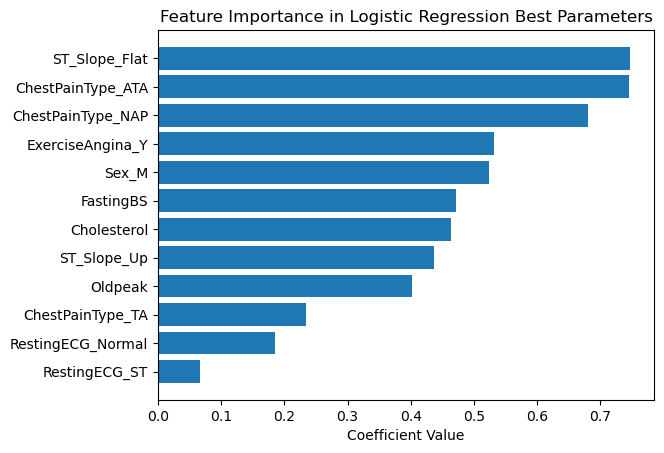

In [1369]:
coef = lr1.coef_[0]  # For binary classification (single row)
feature_names = x2_train_scaled.columns  # If using pandas DataFrame

# Sort the features by absolute coefficient values
values = np.abs(coef)
features_imp10 = pd.DataFrame({'feature': x2_train_scaled.columns, 'importance': values})
features_imp10=features_imp10.sort_values(by='importance', ascending=False)
plt.barh(features_imp10['feature'], features_imp10['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression Best Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1371]:
features_imp10

feature  importance
10      ST_Slope_Flat        0.75
4   ChestPainType_ATA        0.75
5   ChestPainType_NAP        0.68
9    ExerciseAngina_Y        0.53
3               Sex_M        0.52
1           FastingBS        0.47
0         Cholesterol        0.46
11        ST_Slope_Up        0.44
2             Oldpeak        0.40
6    ChestPainType_TA        0.23
7   RestingECG_Normal        0.19
8       RestingECG_ST        0.07

### St_Slope_Fat and ChestPainType_Ata are most important features followed by Chest Pain_NAP and ExerciseAngina

## 11) Decision Tree Classifier with Default Parameters

Scores with Decision Tree Default Parameters

Train Score: 0.7940413567930347
Test Score: 0.8313253012048193
****************************************************************************************************
Train accuracy: 0.9946164199192463
Test accuracy: 0.8313253012048193
****************************************************************************************************
Train f1_score: 0.9951100244498777
Test f1_score: 0.8444444444444444
****************************************************************************************************
Train recall_score: 0.9902676399026764
Test recall_score: 0.8260869565217391
****************************************************************************************************
Train roc_auc_score: 0.9999413713247148
Test roc_auc_score: 0.8319623971797885
****************************************************************************************************
Train Confusion Matrix with Decsion Tree Default Parameters
 [[332   0]
 [  4 407]]
Test Con

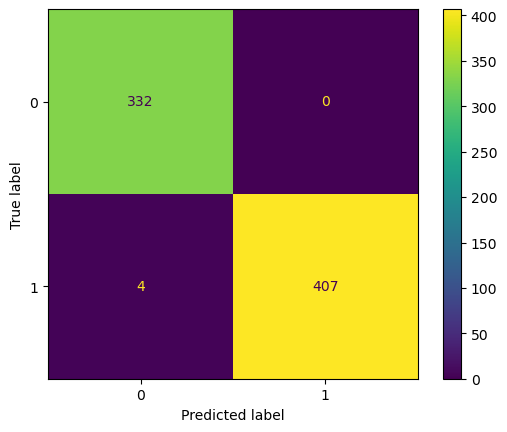

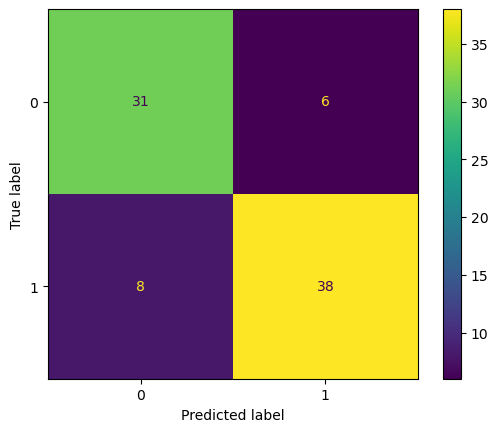

Train Classification Report with Decsion Tree Default Parameters
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       332
           1       1.00      0.99      1.00       411

    accuracy                           0.99       743
   macro avg       0.99      1.00      0.99       743
weighted avg       0.99      0.99      0.99       743

Test Classification Report with Decsion Tree Default Parameters
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.86      0.83      0.84        46

    accuracy                           0.83        83
   macro avg       0.83      0.83      0.83        83
weighted avg       0.83      0.83      0.83        83



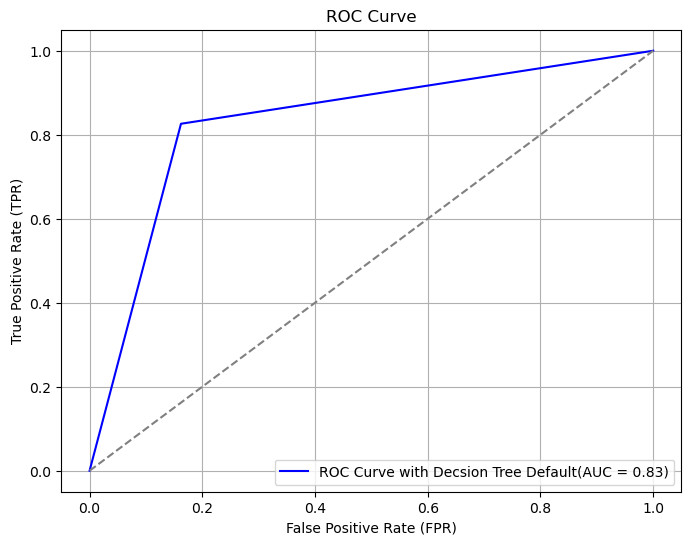

In [1375]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x2_train,y2_train)
train_score=cross_val_score(dt,x2_train,y2_train,cv=5).mean()
te_y_pred_dt=dt.predict(x2_test)
tr_y_pred_dt=dt.predict(x2_train)
test_score=dt.score(x2_test,y2_test)
print("Scores with Decision Tree Default Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y2_train,tr_y_pred_dt))
print("Test accuracy:",accuracy_score(y2_test,te_y_pred_dt))
print("*"*100)  
print("Train f1_score:",f1_score(y2_train,tr_y_pred_dt))
print("Test f1_score:",f1_score(y2_test,te_y_pred_dt))
print("*"*100) 
print("Train recall_score:",recall_score(y2_train,tr_y_pred_dt))
print("Test recall_score:",recall_score(y2_test,te_y_pred_dt))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y2_train,dt.predict_proba(x2_train)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y2_test,dt.predict_proba(x2_test)[:,1]))
print("*"*100)
y_prob_dt = (dt.predict_proba(x2_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y2_test, y_prob_dt)
auc_score_dt = roc_auc_score(y2_test, y_prob_dt)
print("Train Confusion Matrix with Decsion Tree Default Parameters\n",confusion_matrix(y2_train,tr_y_pred_dt))
print("Test Confusion Matrix with Decsion Tree Default Parameters\n",confusion_matrix(y2_test,te_y_pred_dt))
print("*"*100) 
cm_tr_dt=ConfusionMatrixDisplay(confusion_matrix(y2_train,tr_y_pred_dt))
cm_tr_dt.plot()
plt.show()
cm_te_dt=ConfusionMatrixDisplay(confusion_matrix(y2_test,te_y_pred_dt))
cm_te_dt.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_dt)).flatten()
t2_dt=FN / (FN + TP)
print("Train Classification Report with Decsion Tree Default Parameters\n",classification_report(y2_train,tr_y_pred_dt))
print("Test Classification Report with Decsion Tree Default Parameters\n",classification_report(y2_test,te_y_pred_dt))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve with Decsion Tree Default(AUC = {auc_score_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1377]:
result11=pd.DataFrame({'Train_CV':[cross_val_score(dt,x2_train,y2_train,cv=5).mean()],
                    'Train_Accuracy':[accuracy_score(y2_train,tr_y_pred_dt)],
                     'Test_Accuracy':[accuracy_score(y2_test,te_y_pred_dt)],
                     'Train f1_score':[f1_score(y2_train,tr_y_pred_dt)],
                     'Test f1_score':[f1_score(y2_test,te_y_pred_dt)],
                     'Train Recall_score':[recall_score(y2_train,tr_y_pred_dt)],
                     'Test Recall_score':[recall_score(y2_test,te_y_pred_dt)],
                     'Train roc_auc_score':[roc_auc_score(y2_train,dt.predict_proba(x2_train)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y2_test,dt.predict_proba(x2_test)[:,1])],
                       'Type2_error':[t2_dt]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['LDecisionTree_Default_Params']
result11.index = Row_Index
result11.T

LDecisionTree_Default_Params
Train_CV                                     0.79
Train_Accuracy                               0.99
Test_Accuracy                                0.83
Train f1_score                               1.00
Test f1_score                                0.84
Train Recall_score                           0.99
Test Recall_score                            0.83
Train roc_auc_score                          1.00
Test roc_auc_score                           0.83
Type2_error                                  0.17

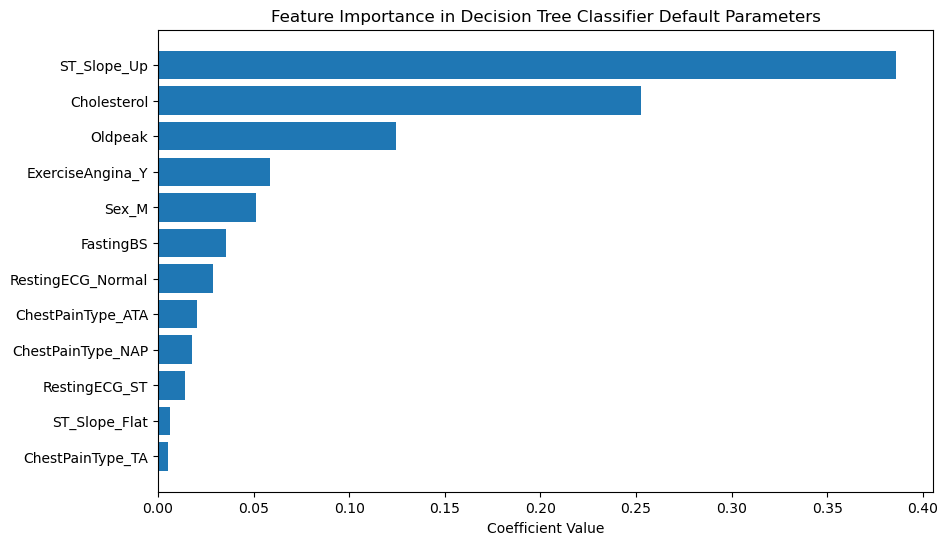

In [1379]:
features_imp11 = pd.DataFrame({'feature': x2_train.columns, 'importance': dt.feature_importances_})
features_imp11=features_imp11.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp11['feature'], features_imp11['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Decision Tree Classifier Default Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1381]:
features_imp11

feature  importance
11        ST_Slope_Up        0.39
0         Cholesterol        0.25
2             Oldpeak        0.12
9    ExerciseAngina_Y        0.06
3               Sex_M        0.05
1           FastingBS        0.04
7   RestingECG_Normal        0.03
4   ChestPainType_ATA        0.02
5   ChestPainType_NAP        0.02
8       RestingECG_ST        0.01
10      ST_Slope_Flat        0.01
6    ChestPainType_TA        0.01

### St_Slope_up is most important feature followed by Cholesterol and Oldpeak

## 12) Decision Tree Classifier with Best Parameters

Scores with Decision Tree Default Parameters

Train Score: 0.8317159441320514
Test Score: 0.9036144578313253
****************************************************************************************************
Train accuracy: 0.8748317631224765
Test accuracy: 0.9036144578313253
****************************************************************************************************
Train f1_score: 0.8909730363423212
Test f1_score: 0.9183673469387755
****************************************************************************************************
Train recall_score: 0.9245742092457421
Test recall_score: 0.9782608695652174
****************************************************************************************************
Train roc_auc_score: 0.9270549350687421
Test roc_auc_score: 0.9292009400705054
****************************************************************************************************
Train Confusion Matrix with Decsion Tree Best Parameters
 [[270  62]
 [ 31 380]]
Test Confus

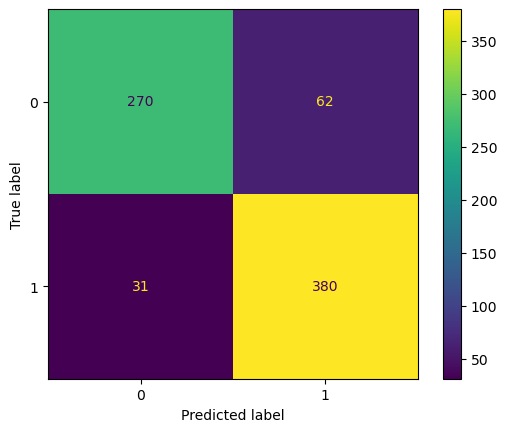

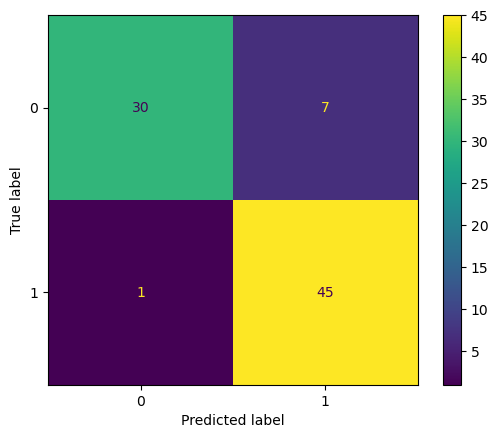

Train Classification Report with Decsion Tree Best Parameters
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       332
           1       0.86      0.92      0.89       411

    accuracy                           0.87       743
   macro avg       0.88      0.87      0.87       743
weighted avg       0.88      0.87      0.87       743

Test Classification Report with Decsion Tree Best Parameters
               precision    recall  f1-score   support

           0       0.97      0.81      0.88        37
           1       0.87      0.98      0.92        46

    accuracy                           0.90        83
   macro avg       0.92      0.89      0.90        83
weighted avg       0.91      0.90      0.90        83



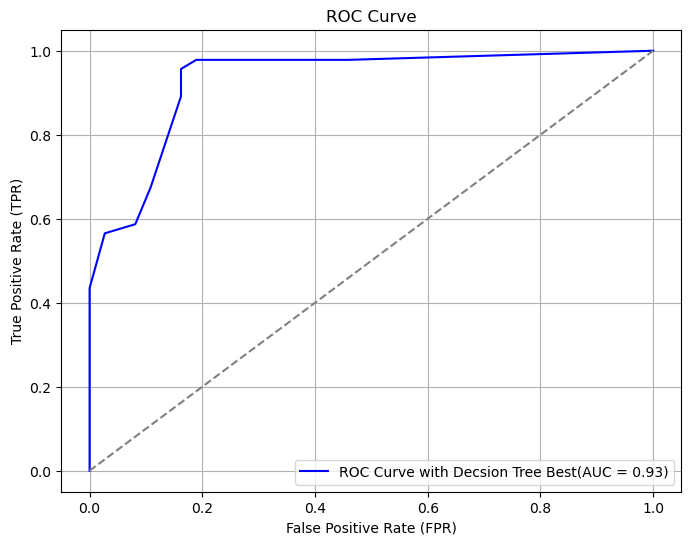

In [1385]:
dt1=DecisionTreeClassifier(max_depth=4,class_weight='balanced',random_state=1)
dt1.fit(x2_train,y2_train)
train_score=cross_val_score(dt1,x2_train,y2_train,cv=5).mean()
te_y_pred_dt1=dt1.predict(x2_test)
tr_y_pred_dt1=dt1.predict(x2_train)
test_score=dt1.score(x2_test,y2_test)
print("Scores with Decision Tree Default Parameters\n")
print("Train Score:",train_score)
print("Test Score:",test_score)
print("*"*100)

print("Train accuracy:",accuracy_score(y2_train,tr_y_pred_dt1))
print("Test accuracy:",accuracy_score(y2_test,te_y_pred_dt1))
print("*"*100)  
print("Train f1_score:",f1_score(y2_train,tr_y_pred_dt1))
print("Test f1_score:",f1_score(y2_test,te_y_pred_dt1))
print("*"*100) 
print("Train recall_score:",recall_score(y2_train,tr_y_pred_dt1))
print("Test recall_score:",recall_score(y2_test,te_y_pred_dt1))
print("*"*100) 
print("Train roc_auc_score:",roc_auc_score(y2_train,dt1.predict_proba(x2_train)[:,1]))
print("Test roc_auc_score:",roc_auc_score(y2_test,dt1.predict_proba(x2_test)[:,1]))
print("*"*100)
y_prob_dt1 = (dt1.predict_proba(x2_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y2_test, y_prob_dt1)
auc_score_dt1 = roc_auc_score(y2_test, y_prob_dt1)
print("Train Confusion Matrix with Decsion Tree Best Parameters\n",confusion_matrix(y2_train,tr_y_pred_dt1))
print("Test Confusion Matrix with Decsion Tree Best Parameters\n",confusion_matrix(y2_test,te_y_pred_dt1))
print("*"*100) 
cm_tr_dt1=ConfusionMatrixDisplay(confusion_matrix(y2_train,tr_y_pred_dt1))
cm_tr_dt1.plot()
plt.show()
cm_te_dt1=ConfusionMatrixDisplay(confusion_matrix(y2_test,te_y_pred_dt1))
cm_te_dt1.plot()
plt.show()
TN, FP, FN, TP=(confusion_matrix(y2_test,te_y_pred_dt1)).flatten()
t2_dt1=FN / (FN + TP)

print("Train Classification Report with Decsion Tree Best Parameters\n",classification_report(y2_train,tr_y_pred_dt1))
print("Test Classification Report with Decsion Tree Best Parameters\n",classification_report(y2_test,te_y_pred_dt1))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve with Decsion Tree Best(AUC = {auc_score_dt1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [1386]:
result12=pd.DataFrame({'Train_CV':[cross_val_score(dt1,x2_train,y2_train,cv=5).mean()],
                    'Train_Accuracy':[accuracy_score(y2_train,tr_y_pred_dt1)],
                     'Test_Accuracy':[accuracy_score(y2_test,te_y_pred_dt1)],
                     'Train f1_score':[f1_score(y2_train,tr_y_pred_dt1)],
                     'Test f1_score':[f1_score(y2_test,te_y_pred_dt1)],
                     'Train Recall_score':[recall_score(y2_train,tr_y_pred_dt1)],
                     'Test Recall_score':[recall_score(y2_test,te_y_pred_dt1)],
                     'Train roc_auc_score':[roc_auc_score(y2_train,dt1.predict_proba(x2_train)[:,1])],
                     'Test roc_auc_score':[roc_auc_score(y2_test,dt1.predict_proba(x2_test)[:,1])],
                       'Type2_error':[t2_dt1]
                     })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['DecisionTree_Best_Params']
result12.index = Row_Index
result12.T

DecisionTree_Best_Params
Train_CV                                 0.83
Train_Accuracy                           0.87
Test_Accuracy                            0.90
Train f1_score                           0.89
Test f1_score                            0.92
Train Recall_score                       0.92
Test Recall_score                        0.98
Train roc_auc_score                      0.93
Test roc_auc_score                       0.93
Type2_error                              0.02

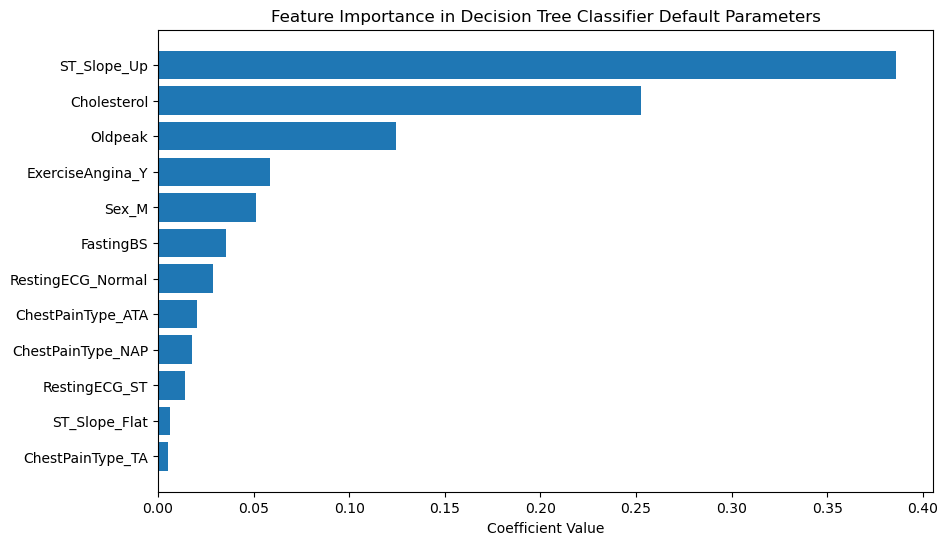

In [1387]:
features_imp12 = pd.DataFrame({'feature': x2_train.columns, 'importance': dt.feature_importances_})
features_imp12=features_imp12.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp12['feature'], features_imp12['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Decision Tree Classifier Default Parameters')
plt.gca().invert_yaxis() 
plt.show()

In [1388]:
features_imp12

feature  importance
11        ST_Slope_Up        0.39
0         Cholesterol        0.25
2             Oldpeak        0.12
9    ExerciseAngina_Y        0.06
3               Sex_M        0.05
1           FastingBS        0.04
7   RestingECG_Normal        0.03
4   ChestPainType_ATA        0.02
5   ChestPainType_NAP        0.02
8       RestingECG_ST        0.01
10      ST_Slope_Flat        0.01
6    ChestPainType_TA        0.01

### St_Slope_up is most important feature followed by Cholesterol and Oldpeak

In [1394]:
final=pd.concat([result1,result2,result3,result4,result5,result6,result7,result8,result9,result10,result11,result12],axis=0)
Row_Index=['RF_Unclean_Default','RF_clean_Default','RF_Unclean_Best','RF_clean_Best','XGB_Unclean_Default','XGB_clean_Default',
           'XGB_Unclean_Best','XGB_clean_Best','LogReg_Default','LogReg_Best','DecisonTree_Default','DecisionTree_Best']
final.index = Row_Index
final

Train_CV  Train_Accuracy  Test_Accuracy  Train f1_score  \
RF_Unclean_Default       0.86            1.00           0.87            1.00   
RF_clean_Default         0.87            1.00           0.88            1.00   
RF_Unclean_Best          0.88            1.00           0.87            1.00   
RF_clean_Best            0.88            1.00           0.90            1.00   
XGB_Unclean_Default      0.87            1.00           0.88            1.00   
XGB_clean_Default        0.86            1.00           0.84            1.00   
XGB_Unclean_Best         0.87            0.92           0.92            0.93   
XGB_clean_Best           0.88            0.92           0.89            0.93   
LogReg_Default           0.87            0.88           0.87            0.89   
LogReg_Best              0.87            0.87           0.88            0.89   
DecisonTree_Default      0.79            0.99           0.83            1.00   
DecisionTree_Best        0.83            0.87           0.90            0.89   

                     Test f1_score  Train Recall_score  Test Recall_score  \
RF_Unclean_Default            0.88                1.00               0.91   
RF_clean_Default              0.89                1.00               0.91   
RF_Unclean_Best               0.89                1.00               0.93   
RF_clean_Best                 0.92                1.00               0.96   
XGB_Unclean_Default           0.89                1.00               0.89   
XGB_clean_Default             0.86                1.00               0.87   
XGB_Unclean_Best              0.93                0.94               0.98   
XGB_clean_Best                0.91                0.95               0.96   
LogReg_Default                0.88                0.91               0.91   
LogReg_Best                   0.90                0.90               0.93   
DecisonTree_Default           0.84                0.99               0.83   
DecisionTree_Best             0.92                0.92               0.98   

                     Train roc_auc_score  Test roc_auc_score  Type2_error  
RF_Unclean_Default                  1.00                0.96         0.09  
RF_clean_Default                    1.00                0.95         0.09  
RF_Unclean_Best                     1.00                0.96         0.07  
RF_clean_Best                       1.00                0.95         0.04  
XGB_Unclean_Default                 1.00                0.93         0.11  
XGB_clean_Default                   1.00                0.92         0.13  
XGB_Unclean_Best                    0.97                0.97         0.02  
XGB_clean_Best                      0.98                0.96         0.04  
LogReg_Default                      0.93                0.96         0.09  
LogReg_Best                         0.93                0.96         0.07  
DecisonTree_Default                 1.00                0.83         0.17  
DecisionTree_Best                   0.93                0.93         0.02

## Champion Models

In [1397]:
champion=pd.concat([result7,result12,result10],axis=0)
Row_Index=['XGB_Unclean_Best','DecisionTree_Best','LogReg_Best']
champion.index = Row_Index
champion

Train_CV  Train_Accuracy  Test_Accuracy  Train f1_score  \
XGB_Unclean_Best       0.87            0.92           0.92            0.93   
DecisionTree_Best      0.83            0.87           0.90            0.89   
LogReg_Best            0.87            0.87           0.88            0.89   

                   Test f1_score  Train Recall_score  Test Recall_score  \
XGB_Unclean_Best            0.93                0.94               0.98   
DecisionTree_Best           0.92                0.92               0.98   
LogReg_Best                 0.90                0.90               0.93   

                   Train roc_auc_score  Test roc_auc_score  Type2_error  
XGB_Unclean_Best                  0.97                0.97         0.02  
DecisionTree_Best                 0.93                0.93         0.02  
LogReg_Best                       0.93                0.96         0.07

## Testing the unseen Data ( Evaluation set ) with Champion Models

Scores with XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=0.1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=-1, num_parallel_tree=None, ...)

Evaluation Score: 1.0
****************************************************************************************************
Accuracy: 1.0
****************************************************************************************************

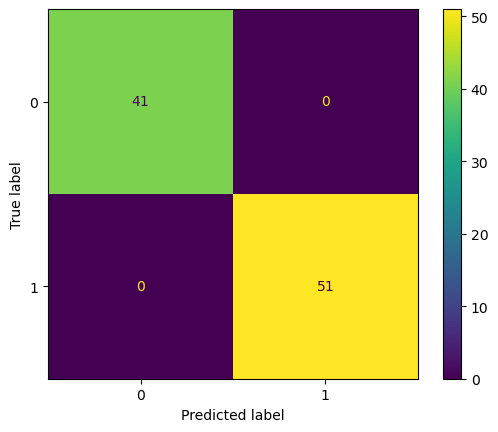

Test Classification Report with XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=0.1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=-1, num_parallel_tree=None, ...)
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        51

    accuracy                           1.00        92

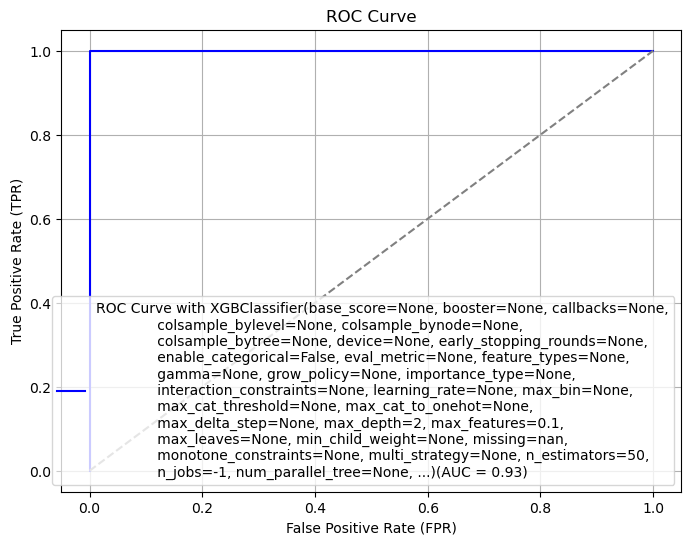

Scores with DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)

Evaluation Score: 0.8695652173913043
****************************************************************************************************
Accuracy: 0.8695652173913043
****************************************************************************************************
f1_score: 0.88
****************************************************************************************************
recall_score: 0.8627450980392157
****************************************************************************************************
roc_auc_score: 0.9241989478718317
****************************************************************************************************
Confusion Matrix with DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)
 [[36  5]
 [ 7 44]]
****************************************************************************************************


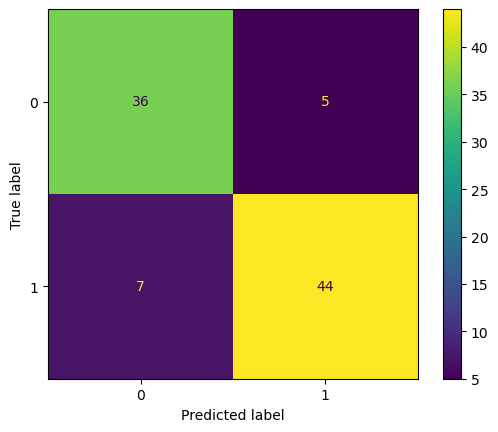

Test Classification Report with DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.90      0.86      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



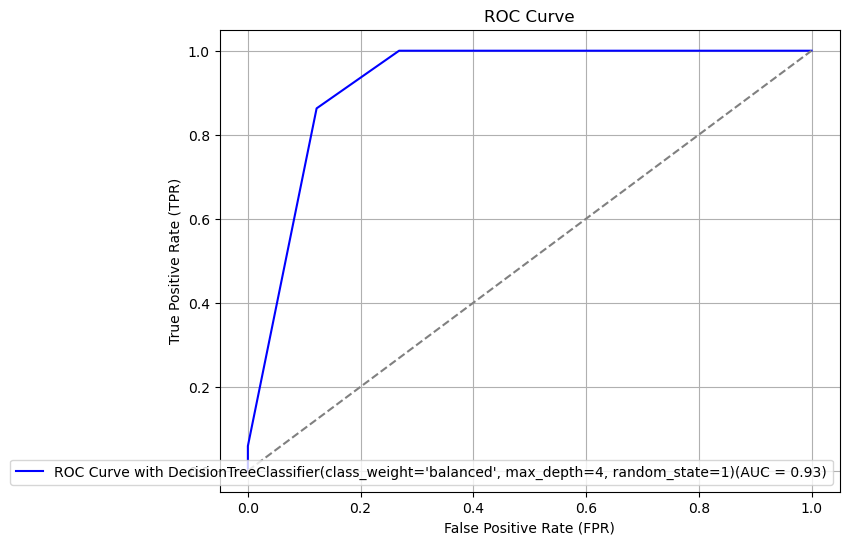

Scores with LogisticRegression(C=1, l1_ratio=0.0, penalty='l1', random_state=1,
                   solver='liblinear')

Evaluation Score: 0.8695652173913043
****************************************************************************************************
Accuracy: 0.8695652173913043
****************************************************************************************************
f1_score: 0.8846153846153846
****************************************************************************************************
recall_score: 0.9019607843137255
****************************************************************************************************
roc_auc_score: 0.912960306073649
****************************************************************************************************
Confusion Matrix with LogisticRegression(C=1, l1_ratio=0.0, penalty='l1', random_state=1,
                   solver='liblinear')
 [[34  7]
 [ 5 46]]
*****************************************************************

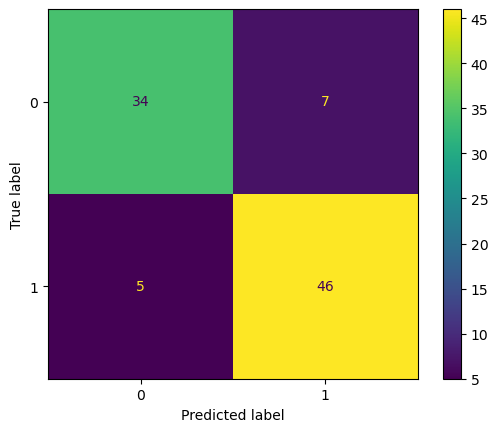

Test Classification Report with LogisticRegression(C=1, l1_ratio=0.0, penalty='l1', random_state=1,
                   solver='liblinear')
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



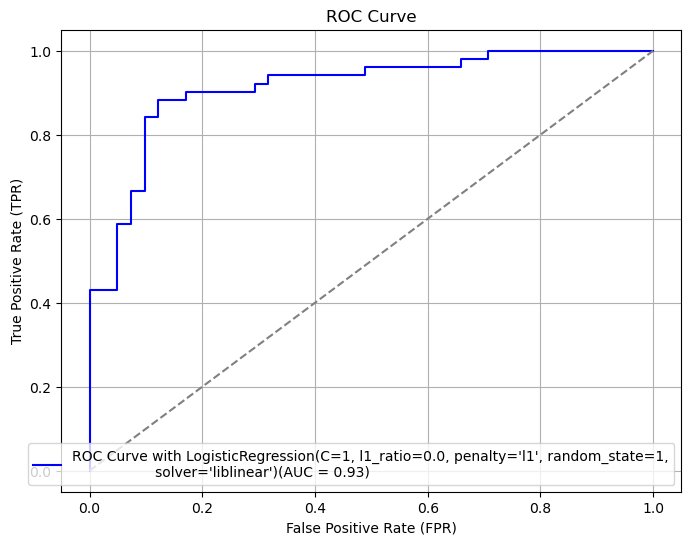

In [1400]:
best_models=[xgb1,dt1,lr1]
for model in best_models:
    model.fit(x_val,y_val)
    y_pred_val=model.predict(x_val)

    val_score=model.score(x_val,y_val)
    print(f"Scores with {model}\n")
    print("Evaluation Score:",val_score)
    print("*"*100)

    print("Accuracy:",accuracy_score(y_val,y_pred_val))
    print("*"*100)  
    print("f1_score:",f1_score(y_val,y_pred_val))
    print("*"*100) 
  
    print("recall_score:",recall_score(y_val,y_pred_val))
    print("*"*100) 
    
    print("roc_auc_score:",roc_auc_score(y_val,model.predict_proba(x_val)[:,1]))
    print("*"*100)
    y_prob_val = (model.predict_proba(x_val)[:, 1])
    fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)
    auc_score = roc_auc_score(y_val, y_prob_val)
    
    print(f"Confusion Matrix with {model}\n",confusion_matrix(y_val,y_pred_val))
    print("*"*100) 
  
    cm_val=ConfusionMatrixDisplay(confusion_matrix(y_val,y_pred_val))
    cm_val.plot()
    plt.show()
    TN, FP, FN, TP=(confusion_matrix(y_val,y_pred_val)).flatten()
    typeII_error=FN / (FN + TP)
    
    
    print(f"Test Classification Report with {model}\n",classification_report(y_val,y_pred_val))
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve with {model}(AUC = {auc_score_dt1:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [1402]:
xgb1.fit(x_val,y_val)
y_pred_valx=model.predict(x_val)
best_result1=pd.DataFrame({ 'Accuracy':[accuracy_score(y_val,y_pred_valx)],
                     'f1_score':[f1_score(y_val,y_pred_valx)],                     
                     'Test Recall_score':[recall_score(y_val,y_pred_valx)],
                     'Test roc_auc_score':[roc_auc_score(y_val,xgb1.predict_proba(x_val)[:,1])],
                      })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['XGBoost Scores']
best_result1.index = Row_Index
best_result1.T

XGBoost Scores
Accuracy                      0.87
f1_score                      0.88
Test Recall_score             0.90
Test roc_auc_score            1.00

In [1404]:
dt1.fit(x_val,y_val)
y_pred_vald=model.predict(x_val)
best_result2=pd.DataFrame({ 'Accuracy':[accuracy_score(y_val,y_pred_vald)],
                     'f1_score':[f1_score(y_val,y_pred_vald)],                     
                     'Test Recall_score':[recall_score(y_val,y_pred_vald)],
                     'Test roc_auc_score':[roc_auc_score(y_val,dt1.predict_proba(x_val)[:,1])],
                      })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['Decision Tree Scores']
best_result2.index = Row_Index
best_result2.T

Decision Tree Scores
Accuracy                            0.87
f1_score                            0.88
Test Recall_score                   0.90
Test roc_auc_score                  0.92

In [1406]:
lr1.fit(x_val,y_val)
y_pred_vall=model.predict(x_val)
best_result3=pd.DataFrame({ 'Accuracy':[accuracy_score(y_val,y_pred_vall)],
                     'f1_score':[f1_score(y_val,y_pred_vall)],                     
                     'Test Recall_score':[recall_score(y_val,y_pred_vall)],
                     'Test roc_auc_score':[roc_auc_score(y_val,lr1.predict_proba(x_val)[:,1])],
                      })

pd.options.display.float_format="{:0.2f}".format
Row_Index=['Logistics Regression Scores']
best_result3.index = Row_Index
best_result3.T

Logistics Regression Scores
Accuracy                                   0.87
f1_score                                   0.88
Test Recall_score                          0.90
Test roc_auc_score                         0.91

In [1408]:
champion_val=pd.concat([best_result1,best_result2,best_result3],axis=0)
Row_Index=['XGBoost','Decision Tree','Logistic Regression']
champion_val.index = Row_Index
champion_val

Accuracy  f1_score  Test Recall_score  Test roc_auc_score
XGBoost                  0.87      0.88               0.90                1.00
Decision Tree            0.87      0.88               0.90                0.92
Logistic Regression      0.87      0.88               0.90                0.91

## Determining important Features based on Best Model

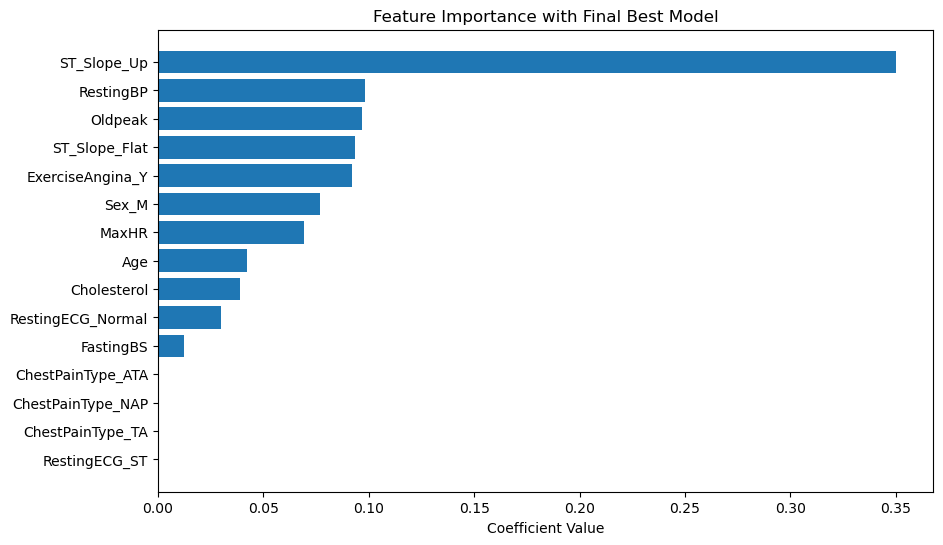

In [1411]:
features_imp_best = pd.DataFrame({'feature': x_val.columns, 'importance': xgb1.feature_importances_})
features_imp_best=features_imp_best.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(features_imp_best['feature'], features_imp_best['importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance with Final Best Model')
plt.gca().invert_yaxis() 
plt.show()

In [1413]:
features_imp_best

feature  importance
14        ST_Slope_Up        0.35
1           RestingBP        0.10
5             Oldpeak        0.10
13      ST_Slope_Flat        0.09
12   ExerciseAngina_Y        0.09
6               Sex_M        0.08
4               MaxHR        0.07
0                 Age        0.04
2         Cholesterol        0.04
10  RestingECG_Normal        0.03
3           FastingBS        0.01
7   ChestPainType_ATA        0.00
8   ChestPainType_NAP        0.00
9    ChestPainType_TA        0.00
11      RestingECG_ST        0.00

## Conclusion:
* Based on results- XGBoost with unprocessed data and HyperParameter Tuning is the best Model.
* Desicion Tree Classifier and Losgitics Regression with hyperparameter tuning grabs 2nd and 3rd Position 
* ST_Slope_up is the most important feature to determine if the person has Heart Disease or not. RestingBP, OldPeak,St_Slope_Flat and Excersize_Anjina are also the important features after ST_Slope_Up that can help to test the heart disease results